In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Sans'

from matplotlib.dates import date2num
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
from datetime import datetime
import xarray as xr
import netCDF4 as nc
import glob
import math
import subprocess
from matplotlib import colormaps
import plotly.graph_objs as go

import cartopy.crs as ccrs
import cartopy.feature as cfeature

import seaborn as sns
import csv
import pandas as pd
from scipy.optimize import curve_fit
from math import prod

import numpy as np
import matplotlib.pyplot as plt
from metpy.plots import SkewT
from metpy.units import units
from metpy.calc import dewpoint_from_relative_humidity
#from metpy.io import get_test_data

import sys, os
import requests
import pyart

import warnings
warnings.simplefilter("ignore", RuntimeWarning)
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", UserWarning)

#%matplotlib notebook

plt.style.use('default')


#import dask
#from dask.distributed import Client, progress, wait
#dask.config.config.get('distributed').get('dashboard').update({'link':'{JUPYTERHUB_SERVICE_PREFIX}/proxy/{port}/status'})
#client = Client()
#client

#dask.config.set(scheduler='threads', num_workers=2)

from dask.distributed import Client
import dask

# Dashboard config for JupyterHub (optional)
dask.config.config.get('distributed').get('dashboard').update({
    'link': '{JUPYTERHUB_SERVICE_PREFIX}/proxy/{port}/status'
})

# Start Dask client with controlled resources
client = Client(n_workers=4, threads_per_worker=2, memory_limit='20GB') # This will use 4*2=8 CPU threads
#client



## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



2025-10-02 18:31:17,053 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:38325' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {'original-open_dataset-tot_prec-2ea6ecd4809a9c5bab4cc1f6232394fd', 'original-open_dataset-tot_prec-0a28c22341ceac823f81c17661ed9924', 'original-open_dataset-tot_prec-20f487cc37cd813ba41c4c1c7796a69a'} (stimulus_id='handle-worker-cleanup-1759422677.052946')
2025-10-02 18:31:17,057 - distributed.nanny - WARNING - Restarting worker
2025-10-02 18:31:20,510 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:44821' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {('mean_agg-aggregate-101c213b3e5a8f2031d43e576a87a1f2', 43), ('mean_agg-aggregate-101c213b3e5a8f2031d43e576a87a1f2', 7), 'original-open_dataset-tot_prec-295cea4eda5bd312795f7a34be2dab97', ('concatenate-65eadfbb955a4cef8e61684cb3bc2c8b', 30, 0), 'original-open_dataset-tot_prec-45a36ef09acc

In [2]:
import numpy as np
import warnings

np.seterr(divide='ignore', invalid='ignore')
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [3]:

file_path='/work/bk1415/b382718/output' 
ds_4sip_caipeex = xr.open_mfdataset(f'{file_path}/caipeex/nested_run/icon_output/continental_ccn/latent_heat/sull_ds/4sip/caipeex_2mom/NWP_*.nc', chunks={'time': 4, 'height': 10}, parallel=True);
ds_4sip_dcmex = xr.open_mfdataset(f'{file_path}/dcmex/nested_run/icon_output/continental_ccn/latent_heat/sull_ds/4sip/dcmex_2mom/NWP_*.nc', chunks={'time': 4, 'height': 10}, parallel=True);
ds_4sip_mc3e = xr.open_mfdataset(f'{file_path}/mc3e/nested_run/icon_output/continental_ccn/latent_heat/sull_ds/4sip/mc3e_2mom/NWP_*.nc', chunks={'time': 4, 'height': 10}, parallel=True);
ds_4sip_orcestra = xr.open_mfdataset(f'{file_path}/orcestra/nested_run/icon_output/marine_ccn/latent_heat/sull_ds/4sip/orcestra_2mom/NWP*icongrid*.nc', chunks={'time': 4, 'height': 10}, parallel=True);
ds_4sip_steps = xr.open_mfdataset(f'{file_path}/steps/nested_run/icon_output/continental_ccn/latent_heat/sull_ds/4sip/steps_2mom/NWP_*.nc', chunks={'time': 4, 'height': 10}, parallel=True);


ds_nosip_caipeex = xr.open_mfdataset(f'{file_path}/caipeex/nested_run/icon_output/continental_ccn/latent_heat/sull_ds/nosip/caipeex_2mom/NWP_*.nc', chunks={'time': 4, 'height': 10}, parallel=True);
ds_nosip_dcmex = xr.open_mfdataset(f'{file_path}/dcmex/nested_run/icon_output/continental_ccn/latent_heat/sull_ds/nosip/dcmex_2mom/NWP_*.nc', chunks={'time': 4, 'height': 10}, parallel=True);
ds_nosip_mc3e = xr.open_mfdataset(f'{file_path}/mc3e/nested_run/icon_output/continental_ccn/latent_heat/sull_ds/nosip/mc3e_2mom/NWP_*.nc', chunks={'time': 4, 'height': 10}, parallel=True);
ds_nosip_orcestra = xr.open_mfdataset(f'{file_path}/orcestra/nested_run/icon_output/marine_ccn/latent_heat/sull_ds/nosip/orcestra_2mom/NWP*icongrid*.nc', chunks={'time': 4, 'height': 10}, parallel=True);
ds_nosip_steps = xr.open_mfdataset(f'{file_path}/steps/nested_run/icon_output/continental_ccn/latent_heat/sull_ds/nosip/steps_2mom/NWP_*.nc', chunks={'time': 4, 'height': 10}, parallel=True);


/home/b/b382718/own_env/lib/python3.9/site-packages/xarray/backends/plugins.py:80: RuntimeWarning: Engine 'earthkit' loading failed:
unsupported operand type(s) for |: 'type' and 'types.GenericAlias'
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)
/home/b/b382718/own_env/lib/python3.9/site-packages/xarray/backends/plugins.py:80: RuntimeWarning: Engine 'earthkit' loading failed:
unsupported operand type(s) for |: 'type' and 'types.GenericAlias'
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)
/home/b/b382718/own_env/lib/python3.9/site-packages/xarray/backends/plugins.py:80: RuntimeWarning: Engine 'earthkit' loading failed:
unsupported operand type(s) for |: 'type' and 'types.GenericAlias'
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)
/home/b/b382718/own_env/lib/python3.9/site-packages/xarray/backends/plugins.py:80: RuntimeWarning: Engine 'earthkit' loading failed:
unsupported operand type(s) for |: 'type' and

In [3]:

#ds_4sip_orcestra = xr.open_mfdataset(f'{file_path}/orcestra/nested_run/icon_output/marine_ccn/latent_heat/control/orcestra_2mom_sip/NWP*icongrid*.nc');
#ds_4sip_steps = xr.open_mfdataset(f'{file_path}/steps/nested_run/icon_output/continental_ccn/latent_heat/control/steps_2mom_sip/NWP_*.nc');


In [4]:


grid_caipeex = xr.open_dataset(f'{file_path}/caipeex/nested_run/icon_output/continental_ccn/latent_heat/sull_ds/4sip/caipeex_2mom/domain4_DOM04.nc');

clon_deg = np.degrees(grid_caipeex.clon)
clat_deg = np.degrees(grid_caipeex.clat)

print(clon_deg.min().values); print(clon_deg.max().values);
print(clat_deg.min().values); print(clat_deg.max().values);

okla_x, okla_y = np.array([75.5, 17.5])
#print(okla_x), print(okla_y)
dx_deg = 0.5; dy_deg = 0.3
left_bound = okla_x - dx_deg
right_bound = okla_x + dx_deg
top_bound = okla_y + dy_deg
bottom_bound = okla_y - dy_deg

print(left_bound), print(right_bound)
print(top_bound), print(bottom_bound)


window_cell = (
    (grid_caipeex.clat >= np.deg2rad(bottom_bound))
    & (grid_caipeex.clat <= np.deg2rad(top_bound))
    & (grid_caipeex.clon >= np.deg2rad(left_bound))
    & (grid_caipeex.clon <= np.deg2rad(right_bound))
).values

(window_cell_indices,) = np.where(window_cell)

# select cells matching with the area of interest (windows_cell_indices:: matching to that with the area sampled by the aircraft)
window_vertex_indices = (np.unique(grid_caipeex.vertex_of_cell.isel(cell=window_cell_indices).values) - 1)
print('window_vertex_indices ::',window_vertex_indices)

# select edges matching with the area of interest (corresponding to the windows_cell_indices)
window_edge_indices = (np.unique(grid_caipeex.edge_of_cell.isel(cell=window_cell_indices).values) - 1)
print('window_edge_indices ::',window_edge_indices)

selected_indices = xr.Dataset(
    {
        "cell": ("cell", window_cell_indices),
        "vertex": ("vertex", window_vertex_indices),
        "edge": ("edge", window_edge_indices),
    }
)


vars_to_renumber = {
    "cell": [
        "adjacent_cell_of_edge",
        "cells_of_vertex",
        "neighbor_cell_index",
    ],
    "vertex": ["vertex_of_cell", "edge_vertices", "vertices_of_vertex"],
    "edge": ["edge_of_cell", "edges_of_vertex"],
}

def reindex_grid(grid, indices, vars_to_renumber):
    new_grid = grid.load().isel(
        cell=indices.cell, vertex=indices.vertex, edge=indices.edge
    )
    for dim, idx in indices.coords.items():
        renumbering = np.full(grid.dims[dim], -2, dtype="int")
        renumbering[idx] = np.arange(len(idx))
        for name in vars_to_renumber[dim]:
            new_grid[name].data = renumbering[new_grid[name].data - 1] + 1
    return new_grid

new_grid_caipeex = reindex_grid(grid_caipeex, selected_indices, vars_to_renumber)

mask_caipeex=np.isin(ds_4sip_caipeex['ncells'], selected_indices.cell)



73.96231325070727
78.03733091737507
15.966592379850837
20.032768784756854
75.0
76.0
17.8
17.2
window_vertex_indices :: [ 3670  3702  3718 ... 32701 32702 32703]
window_edge_indices :: [11072 11073 11074 ... 95287 95288 95289]


In [5]:


grid_dcmex = xr.open_dataset(f'{file_path}/dcmex/nested_run/icon_output/continental_ccn/latent_heat/sull_ds/4sip/dcmex_2mom/domain4_DOM04.nc');

clon_deg = np.degrees(grid_dcmex.clon)
clat_deg = np.degrees(grid_dcmex.clat)

print(clon_deg.min().values); print(clon_deg.max().values);
print(clat_deg.min().values); print(clat_deg.max().values);

okla_x, okla_y = np.array([-107., 34.])
#print(okla_x), print(okla_y)
dx_deg = 0.5; dy_deg = 0.5
dx_deg = 0.5; dy_deg = 0.3
left_bound = okla_x - dx_deg
right_bound = okla_x + dx_deg
top_bound = okla_y + dy_deg
bottom_bound = okla_y - dy_deg

print(left_bound), print(right_bound)
print(top_bound), print(bottom_bound)


window_cell = (
    (grid_caipeex.clat >= np.deg2rad(bottom_bound))
    & (grid_caipeex.clat <= np.deg2rad(top_bound))
    & (grid_caipeex.clon >= np.deg2rad(left_bound))
    & (grid_caipeex.clon <= np.deg2rad(right_bound))
).values

(window_cell_indices,) = np.where(window_cell)

# select cells matching with the area of interest (windows_cell_indices:: matching to that with the area sampled by the aircraft)
window_vertex_indices = (np.unique(grid_dcmex.vertex_of_cell.isel(cell=window_cell_indices).values) - 1)
print('window_vertex_indices ::',window_vertex_indices)

# select edges matching with the area of interest (corresponding to the windows_cell_indices)
window_edge_indices = (np.unique(grid_dcmex.edge_of_cell.isel(cell=window_cell_indices).values) - 1)
print('window_edge_indices ::',window_edge_indices)

selected_indices = xr.Dataset(
    {
        "cell": ("cell", window_cell_indices),
        "vertex": ("vertex", window_vertex_indices),
        "edge": ("edge", window_edge_indices),
    }
)


vars_to_renumber = {
    "cell": [
        "adjacent_cell_of_edge",
        "cells_of_vertex",
        "neighbor_cell_index",
    ],
    "vertex": ["vertex_of_cell", "edge_vertices", "vertices_of_vertex"],
    "edge": ["edge_of_cell", "edges_of_vertex"],
}

def reindex_grid(grid, indices, vars_to_renumber):
    new_grid = grid.load().isel(
        cell=indices.cell, vertex=indices.vertex, edge=indices.edge
    )
    for dim, idx in indices.coords.items():
        renumbering = np.full(grid.dims[dim], -2, dtype="int")
        renumbering[idx] = np.arange(len(idx))
        for name in vars_to_renumber[dim]:
            new_grid[name].data = renumbering[new_grid[name].data - 1] + 1
    return new_grid

new_grid_dcmex = reindex_grid(grid_dcmex, selected_indices, vars_to_renumber)

mask_dcmex=np.isin(ds_4sip_dcmex['ncells'], selected_indices.cell)



-109.03369797063944
-104.96560387399306
32.96608133463784
37.035429759321914
-107.5
-106.5
34.3
33.7
window_vertex_indices :: []
window_edge_indices :: []


In [6]:

grid_mc3e = xr.open_dataset(f'{file_path}/mc3e/nested_run/icon_output/continental_ccn/latent_heat/sull_ds/4sip/mc3e_2mom/domain4_DOM04.nc');

clon_deg = np.degrees(grid_mc3e.clon)
clat_deg = np.degrees(grid_mc3e.clat)

print(clon_deg.min().values); print(clon_deg.max().values);
print(clat_deg.min().values); print(clat_deg.max().values);

okla_x, okla_y = np.array([-98., 37.])
okla_x, okla_y = np.array([-98., 37.])
#print(okla_x), print(okla_y)
dx_deg = 1.; dy_deg = 1.0
left_bound = okla_x - dx_deg
right_bound = okla_x + dx_deg
top_bound = okla_y + dy_deg
bottom_bound = okla_y - dy_deg

print(left_bound), print(right_bound)
print(top_bound), print(bottom_bound)



window_cell = (
    (grid_mc3e.clat >= np.deg2rad(bottom_bound))
    & (grid_mc3e.clat <= np.deg2rad(top_bound))
    & (grid_mc3e.clon >= np.deg2rad(left_bound))
    & (grid_mc3e.clon <= np.deg2rad(right_bound))
).values

(window_cell_indices,) = np.where(window_cell)

# select cells matching with the area of interest (windows_cell_indices:: matching to that with the area sampled by the aircraft)
window_vertex_indices = (np.unique(grid_mc3e.vertex_of_cell.isel(cell=window_cell_indices).values) - 1)
print('window_vertex_indices ::',window_vertex_indices)

# select edges matching with the area of interest (corresponding to the windows_cell_indices)
window_edge_indices = (np.unique(grid_mc3e.edge_of_cell.isel(cell=window_cell_indices).values) - 1)
print('window_edge_indices ::',window_edge_indices)

selected_indices = xr.Dataset(
    {
        "cell": ("cell", window_cell_indices),
        "vertex": ("vertex", window_vertex_indices),
        "edge": ("edge", window_edge_indices),
    }
)


vars_to_renumber = {
    "cell": [
        "adjacent_cell_of_edge",
        "cells_of_vertex",
        "neighbor_cell_index",
    ],
    "vertex": ["vertex_of_cell", "edge_vertices", "vertices_of_vertex"],
    "edge": ["edge_of_cell", "edges_of_vertex"],
}

def reindex_grid(grid, indices, vars_to_renumber):
    new_grid = grid.load().isel(
        cell=indices.cell, vertex=indices.vertex, edge=indices.edge
    )
    for dim, idx in indices.coords.items():
        renumbering = np.full(grid.dims[dim], -2, dtype="int")
        renumbering[idx] = np.arange(len(idx))
        for name in vars_to_renumber[dim]:
            new_grid[name].data = renumbering[new_grid[name].data - 1] + 1
    return new_grid

new_grid_mc3e = reindex_grid(grid_mc3e, selected_indices, vars_to_renumber)

mask_mc3e=np.isin(ds_4sip_mc3e['ncells'], selected_indices.cell)


-99.03552665544457
-94.96409774195314
32.964920475901934
37.03531286609763
-99.0
-97.0
38.0
36.0
window_vertex_indices :: [    3     6    16 ... 27924 27928 27933]
window_edge_indices :: [   12    13    14 ... 79031 79032 79033]


In [7]:


grid_orc = xr.open_mfdataset(f'{file_path}/orcestra/nested_run/icon_output/continental_ccn/latent_heat/sull_ds/4sip/orcestra_2mom/domain4_DOM04.nc');


clon_deg = np.degrees(grid_orc.clon)
clat_deg = np.degrees(grid_orc.clat)

print(clon_deg.min().values); print(clon_deg.max().values);
print(clat_deg.min().values); print(clat_deg.max().values);

okla_x, okla_y = np.array([-30., 9.])
#print(okla_x), print(okla_y)
dx_deg = 2.; dy_deg = 2.0
left_bound = okla_x - dx_deg
right_bound = okla_x + dx_deg
top_bound = okla_y + dy_deg
bottom_bound = okla_y - dy_deg

print(left_bound), print(right_bound)
print(top_bound), print(bottom_bound)


window_cell = (
    (grid_orc.clat >= np.deg2rad(bottom_bound))
    & (grid_orc.clat <= np.deg2rad(top_bound))
    & (grid_orc.clon >= np.deg2rad(left_bound))
    & (grid_orc.clon <= np.deg2rad(right_bound))
).values

(window_cell_indices,) = np.where(window_cell)


# select cells matching with the area of interest (windows_cell_indices:: matching to that with the area sampled by the aircraft)
window_vertex_indices = (np.unique(grid_orc.vertex_of_cell.isel(cell=window_cell_indices).values) - 1)
print('window_vertex_indices ::',window_vertex_indices)

# select edges matching with the area of interest (corresponding to the windows_cell_indices)
window_edge_indices = (np.unique(grid_orc.edge_of_cell.isel(cell=window_cell_indices).values) - 1)
print('window_edge_indices ::',window_edge_indices)

selected_indices = xr.Dataset(
    {
        "cell": ("cell", window_cell_indices),
        "vertex": ("vertex", window_vertex_indices),
        "edge": ("edge", window_edge_indices),
    }
)

vars_to_renumber = {
    "cell": [
        "adjacent_cell_of_edge",
        "cells_of_vertex",
        "neighbor_cell_index",
    ],
    "vertex": ["vertex_of_cell", "edge_vertices", "vertices_of_vertex"],
    "edge": ["edge_of_cell", "edges_of_vertex"],
}


def reindex_grid(grid, indices, vars_to_renumber):
    new_grid = grid.load().isel(
        cell=indices.cell, vertex=indices.vertex, edge=indices.edge
    )
    for dim, idx in indices.coords.items():
        renumbering = np.full(grid.dims[dim], -2, dtype="int")
        renumbering[idx] = np.arange(len(idx))
        for name in vars_to_renumber[dim]:
            new_grid[name].data = renumbering[new_grid[name].data - 1] + 1
    return new_grid


new_grid_orc = reindex_grid(grid_orc, selected_indices, vars_to_renumber)

mask_orc=np.isin(ds_4sip_orcestra['ncells'], selected_indices.cell)


-32.03759442634206
-27.96236307373933
6.967468001138239
11.031985309167817
-32.0
-28.0
11.0
7.0
window_vertex_indices :: [    4     7    15 ... 37370 37371 37372]
window_edge_indices :: [    63     64     65 ... 111329 111330 111331]


In [8]:


grid_steps = xr.open_dataset(f'{file_path}/steps/nested_run/icon_output/continental_ccn/latent_heat/sull_ds/4sip/steps_2mom/domain4_DOM04.nc');

clon_deg = np.degrees(grid_steps.clon)
clat_deg = np.degrees(grid_steps.clat)

print(clon_deg.min().values); print(clon_deg.max().values);
print(clat_deg.min().values); print(clat_deg.max().values);

okla_x, okla_y = np.array([-102., 40.])
#print(okla_x), print(okla_y)
dx_deg = 1.; dy_deg = 1.
left_bound = okla_x - dx_deg
right_bound = okla_x + dx_deg
top_bound = okla_y + dy_deg
bottom_bound = okla_y - dy_deg

print(left_bound), print(right_bound)
print(top_bound), print(bottom_bound)


window_cell = (
    (grid_steps.clat >= np.deg2rad(bottom_bound))
    & (grid_steps.clat <= np.deg2rad(top_bound))
    & (grid_steps.clon >= np.deg2rad(left_bound))
    & (grid_steps.clon <= np.deg2rad(right_bound))
).values

(window_cell_indices,) = np.where(window_cell)

# select cells matching with the area of interest (windows_cell_indices:: matching to that with the area sampled by the aircraft)
window_vertex_indices = (np.unique(grid_steps.vertex_of_cell.isel(cell=window_cell_indices).values) - 1)
print('window_vertex_indices ::',window_vertex_indices)

# select edges matching with the area of interest (corresponding to the windows_cell_indices)
window_edge_indices = (np.unique(grid_steps.edge_of_cell.isel(cell=window_cell_indices).values) - 1)
print('window_edge_indices ::',window_edge_indices)

selected_indices = xr.Dataset(
    {
        "cell": ("cell", window_cell_indices),
        "vertex": ("vertex", window_vertex_indices),
        "edge": ("edge", window_edge_indices),
    }
)

vars_to_renumber = {
    "cell": [
        "adjacent_cell_of_edge",
        "cells_of_vertex",
        "neighbor_cell_index",
    ],
    "vertex": ["vertex_of_cell", "edge_vertices", "vertices_of_vertex"],
    "edge": ["edge_of_cell", "edges_of_vertex"],
}

def reindex_grid(grid, indices, vars_to_renumber):
    new_grid = grid.load().isel(
        cell=indices.cell, vertex=indices.vertex, edge=indices.edge
    )
    for dim, idx in indices.coords.items():
        renumbering = np.full(grid.dims[dim], -2, dtype="int")
        renumbering[idx] = np.arange(len(idx))
        for name in vars_to_renumber[dim]:
            new_grid[name].data = renumbering[new_grid[name].data - 1] + 1
    return new_grid

new_grid_steps = reindex_grid(grid_steps, selected_indices, vars_to_renumber)

mask_steps=np.isin(ds_4sip_steps['ncells'], selected_indices.cell)


-104.03640368667047
-99.96295237559231
37.96466532654236
42.03547401194576
-103.0
-101.0
41.0
39.0
window_vertex_indices :: [ 3428  3433  3434 ... 27926 27927 27928]
window_edge_indices :: [10410 10411 10412 ... 81419 81420 81421]


In [9]:

datasets = [ds_4sip_caipeex, ds_4sip_dcmex, ds_4sip_mc3e, ds_4sip_orcestra, ds_4sip_steps]

ds_4sip_caipeex['w_vel'] = -1.*ds_4sip_caipeex.omega/(9.8*ds_4sip_caipeex.rho)
ds_4sip_caipeex['tempc'] = ds_4sip_caipeex.temp-273.16;
ds_4sip_caipeex['lwc_gperm3']  = ds_4sip_caipeex.qc*ds_4sip_caipeex.rho*1.e3 # kgperm3 to gperm3
ds_4sip_caipeex['tqi'] = ds_4sip_caipeex.qi+ds_4sip_caipeex.qs+ds_4sip_caipeex.qg+ds_4sip_caipeex.qh
ds_4sip_caipeex['tq'] = ds_4sip_caipeex.qc+ds_4sip_caipeex.qi+ds_4sip_caipeex.qs+ds_4sip_caipeex.qg+ds_4sip_caipeex.qh
ds_4sip_caipeex['ciwc_gperm3'] = ds_4sip_caipeex.qi*ds_4sip_caipeex.rho*1.e3 # kgperm3 to gperm3
ds_4sip_caipeex['tiwc_gperm3'] = (ds_4sip_caipeex.qi+ds_4sip_caipeex.qs+ds_4sip_caipeex.qg+ds_4sip_caipeex.qh)*ds_4sip_caipeex.rho*1.e3 # kgperm3 to gperm3
ds_4sip_caipeex['cdnc_percm3'] = ds_4sip_caipeex.qnc*ds_4sip_caipeex.rho*1.e-6  # perkg to percm3
ds_4sip_caipeex['inc_perl'] = (ds_4sip_caipeex.qni+ds_4sip_caipeex.qns+ds_4sip_caipeex.qng+ds_4sip_caipeex.qnh)*ds_4sip_caipeex.rho*1.e-3 # perkg to perl

ds_4sip_dcmex['w_vel'] = -1.*ds_4sip_dcmex.omega/(9.8*ds_4sip_dcmex.rho)
ds_4sip_dcmex['tempc'] = ds_4sip_dcmex.temp-273.16;
ds_4sip_dcmex['lwc_gperm3']  = ds_4sip_dcmex.qc*ds_4sip_dcmex.rho*1.e3 # kgperm3 to gperm3
ds_4sip_dcmex['tqi'] = ds_4sip_dcmex.qi+ds_4sip_dcmex.qs+ds_4sip_dcmex.qg+ds_4sip_dcmex.qh
ds_4sip_dcmex['tq'] = ds_4sip_dcmex.qc+ds_4sip_dcmex.qi+ds_4sip_dcmex.qs+ds_4sip_dcmex.qg+ds_4sip_dcmex.qh
ds_4sip_dcmex['ciwc_gperm3'] = ds_4sip_dcmex.qi*ds_4sip_dcmex.rho*1.e3 # kgperm3 to gperm3
ds_4sip_dcmex['tiwc_gperm3'] = (ds_4sip_dcmex.qi+ds_4sip_dcmex.qs+ds_4sip_dcmex.qg+ds_4sip_dcmex.qh)*ds_4sip_dcmex.rho*1.e3 # kgperm3 to gperm3
ds_4sip_dcmex['cdnc_percm3'] = ds_4sip_dcmex.qnc*ds_4sip_dcmex.rho*1.e-6  # perkg to percm3
ds_4sip_dcmex['inc_perl'] = (ds_4sip_dcmex.qni+ds_4sip_dcmex.qns+ds_4sip_dcmex.qng+ds_4sip_dcmex.qnh)*ds_4sip_dcmex.rho*1.e-3 # perkg to perl

ds_4sip_mc3e['w_vel'] = -1.*ds_4sip_mc3e.omega/(9.8*ds_4sip_mc3e.rho)
ds_4sip_mc3e['tempc'] = ds_4sip_mc3e.temp-273.16;
ds_4sip_mc3e['lwc_gperm3']  = ds_4sip_mc3e.qc*ds_4sip_mc3e.rho*1.e3 # kgperm3 to gperm3
ds_4sip_mc3e['tqi'] = ds_4sip_mc3e.qi+ds_4sip_mc3e.qs+ds_4sip_mc3e.qg+ds_4sip_mc3e.qh
ds_4sip_mc3e['tq'] = ds_4sip_mc3e.qc+ds_4sip_mc3e.qi+ds_4sip_mc3e.qs+ds_4sip_mc3e.qg+ds_4sip_mc3e.qh
ds_4sip_mc3e['ciwc_gperm3'] = ds_4sip_mc3e.qi*ds_4sip_mc3e.rho*1.e3 # kgperm3 to gperm3
ds_4sip_mc3e['tiwc_gperm3'] = (ds_4sip_mc3e.qi+ds_4sip_mc3e.qs+ds_4sip_mc3e.qg+ds_4sip_mc3e.qh)*ds_4sip_mc3e.rho*1.e3 # kgperm3 to gperm3
ds_4sip_mc3e['cdnc_percm3'] = ds_4sip_mc3e.qnc*ds_4sip_mc3e.rho*1.e-6  # perkg to percm3
ds_4sip_mc3e['inc_perl'] = (ds_4sip_mc3e.qni+ds_4sip_mc3e.qns+ds_4sip_mc3e.qng+ds_4sip_mc3e.qnh)*ds_4sip_mc3e.rho*1.e-3 # perkg to perl

ds_4sip_orcestra['w_vel'] = -1.*ds_4sip_orcestra.omega/(9.8*ds_4sip_orcestra.rho)
ds_4sip_orcestra['tempc'] = ds_4sip_orcestra.temp-273.16;
ds_4sip_orcestra['lwc_gperm3']  = ds_4sip_orcestra.qc*ds_4sip_orcestra.rho*1.e3 # kgperm3 to gperm3
ds_4sip_orcestra['tqi'] = ds_4sip_orcestra.qi+ds_4sip_orcestra.qs+ds_4sip_orcestra.qg+ds_4sip_orcestra.qh
ds_4sip_orcestra['tq'] = ds_4sip_orcestra.qc+ds_4sip_orcestra.qi+ds_4sip_orcestra.qs+ds_4sip_orcestra.qg+ds_4sip_orcestra.qh
ds_4sip_orcestra['ciwc_gperm3'] = ds_4sip_orcestra.qi*ds_4sip_orcestra.rho*1.e3 # kgperm3 to gperm3
ds_4sip_orcestra['tiwc_gperm3'] = (ds_4sip_orcestra.qi+ds_4sip_orcestra.qs+ds_4sip_orcestra.qg+ds_4sip_orcestra.qh)*ds_4sip_orcestra.rho*1.e3 # kgperm3 to gperm3
ds_4sip_orcestra['cdnc_percm3'] = ds_4sip_orcestra.qnc*ds_4sip_orcestra.rho*1.e-6  # perkg to percm3
ds_4sip_orcestra['inc_perl'] = (ds_4sip_orcestra.qni+ds_4sip_orcestra.qns+ds_4sip_orcestra.qng+ds_4sip_orcestra.qnh)*ds_4sip_orcestra.rho*1.e-3 # perkg to perl

ds_4sip_steps['w_vel'] = -1.*ds_4sip_steps.omega/(9.8*ds_4sip_steps.rho)
ds_4sip_steps['tempc'] = ds_4sip_steps.temp-273.16;
ds_4sip_steps['lwc_gperm3']  = ds_4sip_steps.qc*ds_4sip_steps.rho*1.e3 # kgperm3 to gperm3
ds_4sip_steps['tqi'] = ds_4sip_steps.qi+ds_4sip_steps.qs+ds_4sip_steps.qg+ds_4sip_steps.qh
ds_4sip_steps['tq'] = ds_4sip_steps.qc+ds_4sip_steps.qi+ds_4sip_steps.qs+ds_4sip_steps.qg+ds_4sip_steps.qh
ds_4sip_steps['ciwc_gperm3'] = ds_4sip_steps.qi*ds_4sip_steps.rho*1.e3 # kgperm3 to gperm3
ds_4sip_steps['tiwc_gperm3'] = (ds_4sip_steps.qi+ds_4sip_steps.qs+ds_4sip_steps.qg+ds_4sip_steps.qh)*ds_4sip_steps.rho*1.e3 # kgperm3 to gperm3
ds_4sip_steps['cdnc_percm3'] = ds_4sip_steps.qnc*ds_4sip_steps.rho*1.e-6  # perkg to percm3
ds_4sip_steps['inc_perl'] = (ds_4sip_steps.qni+ds_4sip_steps.qns+ds_4sip_steps.qng+ds_4sip_steps.qnh)*ds_4sip_steps.rho*1.e-3 # perkg to perl

ds_nosip_caipeex['w_vel'] = -1.*ds_nosip_caipeex.omega/(9.8*ds_nosip_caipeex.rho)
ds_nosip_caipeex['tempc'] = ds_nosip_caipeex.temp-273.16;
ds_nosip_caipeex['lwc_gperm3']  = ds_nosip_caipeex.qc*ds_nosip_caipeex.rho*1.e3 # kgperm3 to gperm3
ds_nosip_caipeex['tqi'] = ds_nosip_caipeex.qi+ds_nosip_caipeex.qs+ds_nosip_caipeex.qg+ds_nosip_caipeex.qh
ds_nosip_caipeex['tq'] = ds_nosip_caipeex.qc+ds_nosip_caipeex.qi+ds_nosip_caipeex.qs+ds_nosip_caipeex.qg+ds_nosip_caipeex.qh
ds_nosip_caipeex['ciwc_gperm3'] = ds_nosip_caipeex.qi*ds_nosip_caipeex.rho*1.e3 # kgperm3 to gperm3
ds_nosip_caipeex['tiwc_gperm3'] = (ds_nosip_caipeex.qi+ds_nosip_caipeex.qs+ds_nosip_caipeex.qg+ds_nosip_caipeex.qh)*ds_nosip_caipeex.rho*1.e3 # kgperm3 to gperm3
ds_nosip_caipeex['cdnc_percm3'] = ds_nosip_caipeex.qnc*ds_nosip_caipeex.rho*1.e-6  # perkg to percm3
ds_nosip_caipeex['inc_perl'] = (ds_nosip_caipeex.qni+ds_nosip_caipeex.qns+ds_nosip_caipeex.qng+ds_nosip_caipeex.qnh)*ds_nosip_caipeex.rho*1.e-3 # perkg to perl

ds_nosip_dcmex['w_vel'] = -1.*ds_nosip_dcmex.omega/(9.8*ds_nosip_dcmex.rho)
ds_nosip_dcmex['tempc'] = ds_nosip_dcmex.temp-273.16;
ds_nosip_dcmex['lwc_gperm3']  = ds_nosip_dcmex.qc*ds_nosip_dcmex.rho*1.e3 # kgperm3 to gperm3
ds_nosip_dcmex['tqi'] = ds_nosip_dcmex.qi+ds_nosip_dcmex.qs+ds_nosip_dcmex.qg+ds_nosip_dcmex.qh
ds_nosip_dcmex['tq'] = ds_nosip_dcmex.qc+ds_nosip_dcmex.qi+ds_nosip_dcmex.qs+ds_nosip_dcmex.qg+ds_nosip_dcmex.qh
ds_nosip_dcmex['ciwc_gperm3'] = ds_nosip_dcmex.qi*ds_nosip_dcmex.rho*1.e3 # kgperm3 to gperm3
ds_nosip_dcmex['tiwc_gperm3'] = (ds_nosip_dcmex.qi+ds_nosip_dcmex.qs+ds_nosip_dcmex.qg+ds_nosip_dcmex.qh)*ds_nosip_dcmex.rho*1.e3 # kgperm3 to gperm3
ds_nosip_dcmex['cdnc_percm3'] = ds_nosip_dcmex.qnc*ds_nosip_dcmex.rho*1.e-6  # perkg to percm3
ds_nosip_dcmex['inc_perl'] = (ds_nosip_dcmex.qni+ds_nosip_dcmex.qns+ds_nosip_dcmex.qng+ds_nosip_dcmex.qnh)*ds_nosip_dcmex.rho*1.e-3 # perkg to perl

ds_nosip_mc3e['w_vel'] = -1.*ds_nosip_mc3e.omega/(9.8*ds_nosip_mc3e.rho)
ds_nosip_mc3e['tempc'] = ds_nosip_mc3e.temp-273.16;
ds_nosip_mc3e['lwc_gperm3']  = ds_nosip_mc3e.qc*ds_nosip_mc3e.rho*1.e3 # kgperm3 to gperm3
ds_nosip_mc3e['tqi'] = ds_nosip_mc3e.qi+ds_nosip_mc3e.qs+ds_nosip_mc3e.qg+ds_nosip_mc3e.qh
ds_nosip_mc3e['tq'] = ds_nosip_mc3e.qc+ds_nosip_mc3e.qi+ds_nosip_mc3e.qs+ds_nosip_mc3e.qg+ds_nosip_mc3e.qh
ds_nosip_mc3e['ciwc_gperm3'] = ds_nosip_mc3e.qi*ds_nosip_mc3e.rho*1.e3 # kgperm3 to gperm3
ds_nosip_mc3e['tiwc_gperm3'] = (ds_nosip_mc3e.qi+ds_nosip_mc3e.qs+ds_nosip_mc3e.qg+ds_nosip_mc3e.qh)*ds_nosip_mc3e.rho*1.e3 # kgperm3 to gperm3
ds_nosip_mc3e['cdnc_percm3'] = ds_nosip_mc3e.qnc*ds_nosip_mc3e.rho*1.e-6  # perkg to percm3
ds_nosip_mc3e['inc_perl'] = (ds_nosip_mc3e.qni+ds_nosip_mc3e.qns+ds_nosip_mc3e.qng+ds_nosip_mc3e.qnh)*ds_nosip_mc3e.rho*1.e-3 # perkg to perl

ds_nosip_orcestra['w_vel'] = -1.*ds_nosip_orcestra.omega/(9.8*ds_nosip_orcestra.rho)
ds_nosip_orcestra['tempc'] = ds_nosip_orcestra.temp-273.16;
ds_nosip_orcestra['lwc_gperm3']  = ds_nosip_orcestra.qc*ds_nosip_orcestra.rho*1.e3 # kgperm3 to gperm3
ds_nosip_orcestra['tqi'] = ds_nosip_orcestra.qi+ds_nosip_orcestra.qs+ds_nosip_orcestra.qg+ds_nosip_orcestra.qh
ds_nosip_orcestra['tq'] = ds_nosip_orcestra.qc+ds_nosip_orcestra.qi+ds_nosip_orcestra.qs+ds_nosip_orcestra.qg+ds_nosip_orcestra.qh
ds_nosip_orcestra['ciwc_gperm3'] = ds_nosip_orcestra.qi*ds_nosip_orcestra.rho*1.e3 # kgperm3 to gperm3
ds_nosip_orcestra['tiwc_gperm3'] = (ds_nosip_orcestra.qi+ds_nosip_orcestra.qs+ds_nosip_orcestra.qg+ds_nosip_orcestra.qh)*ds_nosip_orcestra.rho*1.e3 # kgperm3 to gperm3
ds_nosip_orcestra['cdnc_percm3'] = ds_nosip_orcestra.qnc*ds_nosip_orcestra.rho*1.e-6  # perkg to percm3
ds_nosip_orcestra['inc_perl'] = (ds_nosip_orcestra.qni+ds_nosip_orcestra.qns+ds_nosip_orcestra.qng+ds_nosip_orcestra.qnh)*ds_nosip_orcestra.rho*1.e-3 # perkg to perl


In [10]:


mean_ht_4sip_caipeex = 1.e-3*ds_4sip_caipeex.z_mc.mean(dim=('time','ncells'))
mean_tempc_4sip_caipeex = ds_4sip_caipeex.tempc.mean(dim=('time','ncells'))

mean_ht_4sip_dcmex = 1.e-3*ds_4sip_dcmex.z_mc.mean(dim=('time','ncells'))
mean_tempc_4sip_dcmex = ds_4sip_dcmex.tempc.mean(dim=('time','ncells'))

mean_ht_4sip_mc3e = 1.e-3*ds_4sip_mc3e.z_mc.mean(dim=('time','ncells'))
mean_tempc_4sip_mc3e = ds_4sip_mc3e.tempc.mean(dim=('time','ncells'))

mean_ht_4sip_orcestra = 1.e-3*ds_4sip_orcestra.z_mc.mean(dim=('time','ncells'))
mean_tempc_4sip_orcestra = ds_4sip_orcestra.tempc.mean(dim=('time','ncells'))

mean_ht_4sip_steps = 1.e-3*ds_4sip_steps.z_mc.mean(dim=('time','ncells'))
mean_tempc_4sip_steps = ds_4sip_steps.tempc.mean(dim=('time','ncells'))

mean_ht_nosip_caipeex = 1.e-3*ds_nosip_caipeex.z_mc.mean(dim=('time','ncells'))
mean_tempc_nosip_caipeex = ds_nosip_caipeex.tempc.mean(dim=('time','ncells'))

mean_ht_nosip_dcmex = 1.e-3*ds_nosip_dcmex.z_mc.mean(dim=('time','ncells'))
mean_tempc_nosip_dcmex = ds_nosip_dcmex.tempc.mean(dim=('time','ncells'))

mean_ht_nosip_mc3e = 1.e-3*ds_nosip_mc3e.z_mc.mean(dim=('time','ncells'))
mean_tempc_nosip_mc3e = ds_nosip_mc3e.tempc.mean(dim=('time','ncells'))

mean_ht_nosip_orcestra = 1.e-3*ds_nosip_orcestra.z_mc.mean(dim=('time','ncells'))
mean_tempc_nosip_orcestra = ds_nosip_orcestra.tempc.mean(dim=('time','ncells'))

#mean_ht_nosip_steps = 1.e-3*ds_nosip_steps.z_mc.mean(dim=('time','ncells'))
#mean_tempc_nosip_steps = ds_nosip_steps.tempc.mean(dim=('time','ncells'))


In [10]:

variables = [mean_tempc_4sip_caipeex, mean_tempc_4sip_dcmex, mean_tempc_4sip_mc3e, mean_tempc_4sip_orcestra, mean_tempc_4sip_steps]
numpy_variables = [var.values for var in variables]

mean_tempc_4sip_caipeex = numpy_variables[0]
mean_tempc_4sip_dcmex = numpy_variables[1]
mean_tempc_4sip_mc3e = numpy_variables[2]
mean_tempc_4sip_orcestra = numpy_variables[3]
mean_tempc_4sip_steps = numpy_variables[4]

variables = [mean_ht_4sip_caipeex, mean_ht_4sip_dcmex, mean_ht_4sip_mc3e, mean_ht_4sip_orcestra, mean_ht_4sip_steps]
numpy_variables = [var.values for var in variables]

mean_ht_4sip_caipeex = numpy_variables[0]
mean_ht_4sip_dcmex = numpy_variables[1]
mean_ht_4sip_mc3e = numpy_variables[2]
mean_ht_4sip_orcestra = numpy_variables[3]
mean_ht_4sip_steps = numpy_variables[4]


In [11]:
mean_tempc_4sip_caipeex

array([-68.36644   , -73.75149   , -80.17651   , -79.79385   ,
       -76.05492   , -70.70124   , -64.76302   , -58.951412  ,
       -53.705746  , -48.842987  , -44.295605  , -40.088505  ,
       -36.19493   , -32.597248  , -29.198183  , -26.01746   ,
       -23.090574  , -20.389694  , -17.905039  , -15.575232  ,
       -13.411725  , -11.4172    ,  -9.583449  ,  -7.8785434 ,
        -6.268345  ,  -4.7248073 ,  -3.2332544 ,  -1.8051971 ,
        -0.45221788,   0.81807745,   2.0178957 ,   3.1614814 ,
         4.300176  ,   5.3919077 ,   6.4439917 ,   7.444805  ,
         8.39445   ,   9.356403  ,  10.307456  ,  11.240261  ,
        12.13883   ,  12.997846  ,  13.814409  ,  14.589166  ,
        15.324625  ,  16.028597  ,  16.721651  ,  17.408875  ,
        18.110546  ,  18.820274  ,  19.523405  ,  20.212439  ,
        20.853476  ,  21.475134  ,  22.029984  ,  22.565395  ,
        23.008781  ,  23.469011  ,  23.790482  ,  24.172798  ,
        24.30066   ,  24.57377   ,  24.51456   ,  24.69

## Precipitation

In [11]:


dt_hours = (ds_4sip_caipeex.time.diff('time') / np.timedelta64(1, 'h'))          # output is over 30 min

del_prec_4sip_caipeex = ds_4sip_caipeex.tot_prec.diff('time')
del_prec_4sip_dcmex = ds_4sip_dcmex.tot_prec.diff('time')
del_prec_4sip_mc3e = ds_4sip_mc3e.tot_prec.diff('time')
del_prec_4sip_orcestra = ds_4sip_orcestra.tot_prec.diff('time')
del_prec_4sip_steps = ds_4sip_steps.tot_prec.diff('time')

precip_rate_4sip_caipeex = del_prec_4sip_caipeex/dt_hours
precip_rate_4sip_dcmex = del_prec_4sip_dcmex/dt_hours
precip_rate_4sip_mc3e = del_prec_4sip_mc3e/dt_hours  
precip_rate_4sip_orcestra = del_prec_4sip_orcestra/dt_hours
precip_rate_4sip_steps = del_prec_4sip_steps/dt_hours

max_acc_precip_4sip_caipeex = np.nanmax(ds_4sip_caipeex.tot_prec.mean('ncells'))
max_acc_precip_4sip_dcmex = np.nanmax(ds_4sip_dcmex.tot_prec.mean('ncells'))
max_acc_precip_4sip_mc3e = np.nanmax(ds_4sip_mc3e.tot_prec.mean('ncells'))
max_acc_precip_4sip_orcestra = np.nanmax(ds_4sip_orcestra.tot_prec.mean('ncells'))
max_acc_precip_4sip_steps = np.nanmax(ds_4sip_steps.tot_prec.mean('ncells'))



del_prec_nosip_caipeex = ds_nosip_caipeex.tot_prec.diff('time')
del_prec_nosip_dcmex = ds_nosip_dcmex.tot_prec.diff('time')
del_prec_nosip_mc3e = ds_nosip_mc3e.tot_prec.diff('time')
del_prec_nosip_orcestra = ds_nosip_orcestra.tot_prec.diff('time')
del_prec_nosip_steps = ds_nosip_steps.tot_prec.diff('time')

precip_rate_nosip_caipeex = del_prec_nosip_caipeex/dt_hours
precip_rate_nosip_dcmex = del_prec_nosip_dcmex/dt_hours
precip_rate_nosip_mc3e = del_prec_nosip_mc3e/dt_hours            
precip_rate_nosip_orcestra = del_prec_nosip_orcestra/dt_hours
precip_rate_nosip_steps = del_prec_nosip_steps/dt_hours

max_acc_precip_nosip_caipeex = np.nanmax(ds_nosip_caipeex.tot_prec.mean('ncells'))
max_acc_precip_nosip_dcmex = np.nanmax(ds_nosip_dcmex.tot_prec.mean('ncells'))
max_acc_precip_nosip_mc3e = np.nanmax(ds_nosip_mc3e.tot_prec.mean('ncells'))
max_acc_precip_nosip_orcestra = np.nanmax(ds_nosip_orcestra.tot_prec.mean('ncells'))
max_acc_precip_nosip_steps = np.nanmax(ds_nosip_steps.tot_prec.mean('ncells'))

tot_acc_precip_caipeex_4sip = max_acc_precip_4sip_caipeex 
tot_acc_precip_dcmex_4sip = max_acc_precip_4sip_dcmex 
tot_acc_precip_mc3e_4sip = max_acc_precip_4sip_mc3e
tot_acc_precip_orcestra_4sip = max_acc_precip_4sip_orcestra

tot_acc_precip_caipeex_nosip = max_acc_precip_nosip_caipeex 
tot_acc_precip_dcmex_nosip = max_acc_precip_nosip_dcmex 
tot_acc_precip_mc3e_nosip = max_acc_precip_nosip_mc3e
tot_acc_precip_orcestra_nosip = max_acc_precip_nosip_orcestra


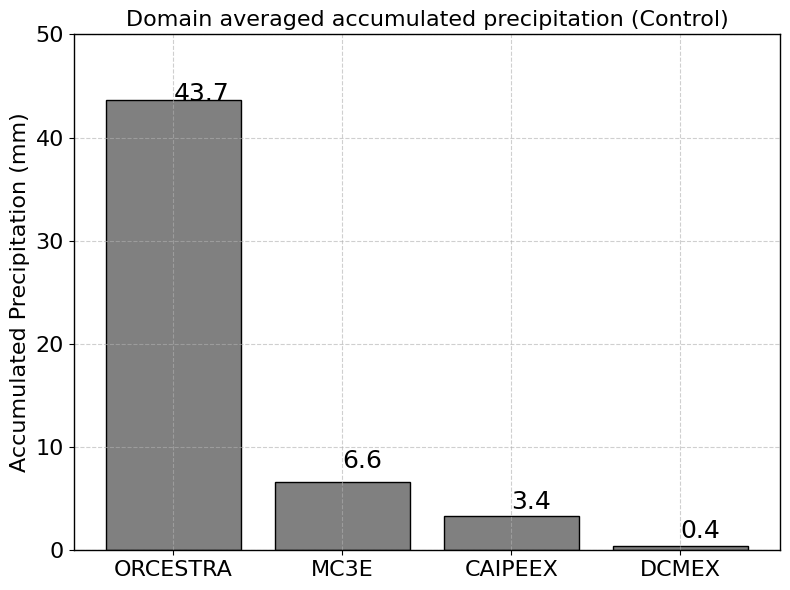

In [19]:




max_acc_precip_4sip = [max_acc_precip_4sip_caipeex, max_acc_precip_4sip_dcmex, 
                       max_acc_precip_4sip_mc3e, max_acc_precip_4sip_orcestra]#, max_acc_precip_4sip_steps]

max_acc_precip_nosip = [max_acc_precip_nosip_caipeex, max_acc_precip_nosip_dcmex, 
                       max_acc_precip_nosip_mc3e, max_acc_precip_nosip_orcestra]#, max_acc_precip_nosip_steps]


case_labels = ['CAIPEEX', 'DCMEX', 'MC3E', 'ORCESTRA', 'STEPS']

fnt=16;
ln=3;
wd=1;
alp=0.8
plt.figure(figsize=(8, 6))
plt.style.use('default')
#plt.bar(case_labels, max_acc_precip_4sip, color='grey', edgecolor='black')

plt.bar(case_labels[3], max_acc_precip_4sip[3], color='grey', edgecolor='black')
plt.bar(case_labels[2], max_acc_precip_4sip[2], color='grey', edgecolor='black')
plt.bar(case_labels[0], max_acc_precip_4sip[0], color='grey', edgecolor='black')
plt.bar(case_labels[1], max_acc_precip_4sip[1], color='grey', edgecolor='black')

plt.text(case_labels[0],4, f'{max_acc_precip_4sip_caipeex:.1f}', fontsize=fnt+2)
plt.text(case_labels[1],1.2, f'{max_acc_precip_4sip_dcmex:.1f}', fontsize=fnt+2)
plt.text(case_labels[2],8, f'{max_acc_precip_4sip_mc3e:.1f}', fontsize=fnt+2)
plt.text(case_labels[3],43.5, f'{max_acc_precip_4sip_orcestra:.1f}', fontsize=fnt+2)

plt.xticks(fontsize=fnt)
#plt.yscale('log')
plt.ylim(0,50)
plt.yticks(fontsize=fnt) 
plt.ylabel('Accumulated Precipitation (mm)', fontsize=fnt)
plt.title('Domain averaged accumulated precipitation (Control)', fontsize=fnt)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.grid(axis='y', linestyle='--', alpha=0.6)

for spine in ['top', 'bottom', 'left', 'right']:
    plt.gca().spines[spine].set_visible(True)
    plt.gca().spines[spine].set_linewidth(1)
    plt.gca().spines[spine].set_color('black')
    
plt.tight_layout()
plt.show()

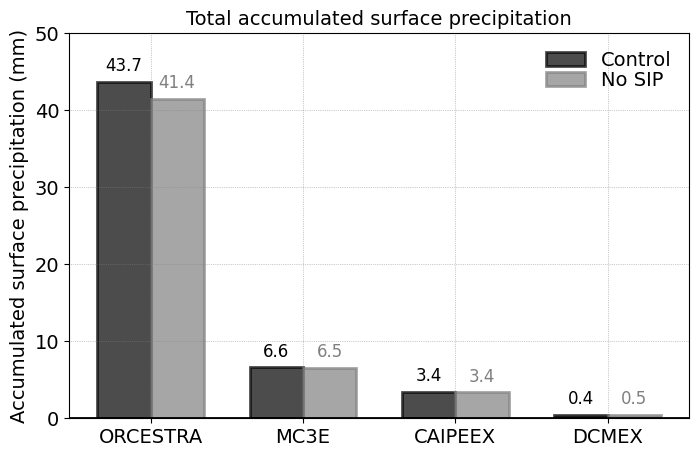

In [24]:


mean_all_precip_4sip = [tot_acc_precip_orcestra_4sip, tot_acc_precip_mc3e_4sip, tot_acc_precip_caipeex_4sip, tot_acc_precip_dcmex_4sip]
mean_all_precip_nosip = [tot_acc_precip_orcestra_nosip, tot_acc_precip_mc3e_nosip, tot_acc_precip_caipeex_nosip, tot_acc_precip_dcmex_nosip]


fnt=14;
ln=2;
alp=0.7


precip_comp_groups = ['ORCESTRA', 'MC3E', 'CAIPEEX', 'DCMEX']
x_precip = np.arange(len(precip_comp_groups))  # the label locations

width = 0.35  # width of the bars

fig, ax = plt.subplots(1, 1, figsize=(8, 5), sharey=False)
plt.style.use('default')

# ---------------------------------------------
# Subplot 1: Latent heating rate (LHR)
# ---------------------------------------------


ax.axhline(y=0, color='k', linewidth=ln, linestyle='-')

rects1 = ax.bar(x_precip - width/2, mean_all_precip_4sip, width, color='black', facecolor='k', edgecolor='k', linewidth=ln, alpha=alp, label='Control')
rects2 = ax.bar(x_precip + width/2, mean_all_precip_nosip, width, color='gray', facecolor='gray', edgecolor='gray', linewidth=ln, alpha=alp, label='No SIP')

ax.bar_label(rects1, padding=5, color='k', fontsize=fnt-2, fmt='%.1f')
ax.bar_label(rects2, padding=5, color='gray', fontsize=fnt-2, fmt='%.1f')

ax.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)

    
# Customization
ax.set_ylim(0,50)
ax.set_ylabel('Accumulated surface precipitation (mm)', fontsize=fnt)
ax.set_xticks(x_precip)
ax.set_xticklabels(precip_comp_groups, rotation=0)
ax.set_title('Total accumulated surface precipitation', fontsize=fnt)
ax.tick_params(axis='both', labelsize=fnt)

ax.legend(frameon=False, handlelength=2, labelspacing=0.05, ncols=1, fontsize=fnt, loc='best')

plt.show()

## TOA Radiative Fluxes
#### Calculating CRE
##### SW CRE = (Qcld_sw_dn - Qcld_sw_up) - (Qclear_sw_dn - Qclear_sw_up)
##### LW CRE = (Qcld_lw_dn - Qcld_lw_up) - (Qclear_lw_dn - Qclear_lw_up)
##### Net CRE = SW_CRE + LW_CRE

In [11]:

#### CAIPEEX
toa_sw_up_4sip_caipeex = ds_4sip_caipeex.swflx_up.isel(height_2=0).mean('ncells') #ds_nosip.swflx_up[:,0,:]
toa_sw_up_clr_4sip_caipeex = ds_4sip_caipeex.swflx_up_clr.isel(height_2=0).mean('ncells') #ds_nosip.swflx_up_clr[:,0,:]
toa_lw_up_4sip_caipeex = ds_4sip_caipeex.lwflx_up.isel(height_2=0).mean('ncells') #ds_nosip.lwflx_up[:,0,:]
toa_lw_up_clr_4sip_caipeex = ds_4sip_caipeex.lwflx_up_clr.isel(height_2=0).mean('ncells') #ds_nosip.lwflx_up_clr[:,0,:]

toa_sw_dn_4sip_caipeex = ds_4sip_caipeex.swflx_dn.isel(height_2=0).mean('ncells') #ds_nosip.swflx_dn[:,0,:]
toa_sw_dn_clr_4sip_caipeex = ds_4sip_caipeex.swflx_dn_clr.isel(height_2=0).mean('ncells') #ds_nosip.swflx_dn_clr[:,0,:]
toa_lw_dn_4sip_caipeex = ds_4sip_caipeex.lwflx_dn.isel(height_2=0).mean('ncells') #ds_nosip.lwflx_dn[:,0,:]
toa_lw_dn_clr_4sip_caipeex = ds_4sip_caipeex.lwflx_dn_clr.isel(height_2=0).mean('ncells') #ds_nosip.lwflx_dn_clr[:,0,:]

toa_sw_cre_4sip_caipeex = (toa_sw_dn_4sip_caipeex-toa_sw_up_4sip_caipeex) - (toa_sw_dn_clr_4sip_caipeex-toa_sw_up_clr_4sip_caipeex)
toa_lw_cre_4sip_caipeex = (toa_sw_dn_4sip_caipeex-toa_lw_up_4sip_caipeex) - (toa_sw_dn_clr_4sip_caipeex-toa_lw_up_clr_4sip_caipeex)
toa_net_cre_4sip_caipeex = toa_sw_cre_4sip_caipeex+toa_lw_cre_4sip_caipeex

ds_4sip_caipeex['toa_sw_cre_4sip'] = toa_sw_cre_4sip_caipeex
ds_4sip_caipeex['toa_lw_cre_4sip'] = toa_lw_cre_4sip_caipeex
ds_4sip_caipeex['toa_net_cre_4sip'] = toa_net_cre_4sip_caipeex


#### DCMEX
toa_sw_up_4sip_dcmex = ds_4sip_dcmex.swflx_up.isel(height_2=0).mean('ncells') #ds_nosip.swflx_up[:,0,:]
toa_sw_up_clr_4sip_dcmex = ds_4sip_dcmex.swflx_up_clr.isel(height_2=0).mean('ncells') #ds_nosip.swflx_up_clr[:,0,:]
toa_lw_up_4sip_dcmex = ds_4sip_dcmex.lwflx_up.isel(height_2=0).mean('ncells') #ds_nosip.lwflx_up[:,0,:]
toa_lw_up_clr_4sip_dcmex = ds_4sip_dcmex.lwflx_up_clr.isel(height_2=0).mean('ncells') #ds_nosip.lwflx_up_clr[:,0,:]

toa_sw_dn_4sip_dcmex = ds_4sip_dcmex.swflx_dn.isel(height_2=0).mean('ncells') #ds_nosip.swflx_dn[:,0,:]
toa_sw_dn_clr_4sip_dcmex = ds_4sip_dcmex.swflx_dn_clr.isel(height_2=0).mean('ncells') #ds_nosip.swflx_dn_clr[:,0,:]
toa_lw_dn_4sip_dcmex = ds_4sip_dcmex.lwflx_dn.isel(height_2=0).mean('ncells') #ds_nosip.lwflx_dn[:,0,:]
toa_lw_dn_clr_4sip_dcmex = ds_4sip_dcmex.lwflx_dn_clr.isel(height_2=0).mean('ncells') #ds_nosip.lwflx_dn_clr[:,0,:]

toa_sw_cre_4sip_dcmex = (toa_sw_dn_4sip_dcmex-toa_sw_up_4sip_dcmex) - (toa_sw_dn_clr_4sip_dcmex-toa_sw_up_clr_4sip_dcmex)
toa_lw_cre_4sip_dcmex = (toa_sw_dn_4sip_dcmex-toa_lw_up_4sip_dcmex) - (toa_sw_dn_clr_4sip_dcmex-toa_lw_up_clr_4sip_dcmex)
toa_net_cre_4sip_dcmex = toa_sw_cre_4sip_dcmex+toa_lw_cre_4sip_dcmex

ds_4sip_dcmex['toa_sw_cre_4sip'] = toa_sw_cre_4sip_dcmex
ds_4sip_dcmex['toa_lw_cre_4sip'] = toa_lw_cre_4sip_dcmex
ds_4sip_dcmex['toa_net_cre_4sip'] = toa_net_cre_4sip_dcmex


#### MC3E
toa_sw_up_4sip_mc3e = ds_4sip_mc3e.swflx_up.isel(height_2=0).mean('ncells') #ds_nosip.swflx_up[:,0,:]
toa_sw_up_clr_4sip_mc3e = ds_4sip_mc3e.swflx_up_clr.isel(height_2=0).mean('ncells') #ds_nosip.swflx_up_clr[:,0,:]
toa_lw_up_4sip_mc3e = ds_4sip_mc3e.lwflx_up.isel(height_2=0).mean('ncells') #ds_nosip.lwflx_up[:,0,:]
toa_lw_up_clr_4sip_mc3e = ds_4sip_mc3e.lwflx_up_clr.isel(height_2=0).mean('ncells') #ds_nosip.lwflx_up_clr[:,0,:]

toa_sw_dn_4sip_mc3e = ds_4sip_mc3e.swflx_dn.isel(height_2=0).mean('ncells') #ds_nosip.swflx_dn[:,0,:]
toa_sw_dn_clr_4sip_mc3e = ds_4sip_mc3e.swflx_dn_clr.isel(height_2=0).mean('ncells') #ds_nosip.swflx_dn_clr[:,0,:]
toa_lw_dn_4sip_mc3e = ds_4sip_mc3e.lwflx_dn.isel(height_2=0).mean('ncells') #ds_nosip.lwflx_dn[:,0,:]
toa_lw_dn_clr_4sip_mc3e = ds_4sip_mc3e.lwflx_dn_clr.isel(height_2=0).mean('ncells') #ds_nosip.lwflx_dn_clr[:,0,:]

toa_sw_cre_4sip_mc3e = (toa_sw_dn_4sip_mc3e-toa_sw_up_4sip_mc3e) - (toa_sw_dn_clr_4sip_mc3e-toa_sw_up_clr_4sip_mc3e)
toa_lw_cre_4sip_mc3e = (toa_sw_dn_4sip_mc3e-toa_lw_up_4sip_mc3e) - (toa_sw_dn_clr_4sip_mc3e-toa_lw_up_clr_4sip_mc3e)
toa_net_cre_4sip_mc3e = toa_sw_cre_4sip_mc3e+toa_lw_cre_4sip_mc3e

ds_4sip_mc3e['toa_sw_cre_4sip'] = toa_sw_cre_4sip_mc3e
ds_4sip_mc3e['toa_lw_cre_4sip'] = toa_lw_cre_4sip_mc3e
ds_4sip_mc3e['toa_net_cre_4sip'] = toa_net_cre_4sip_mc3e


#### ORCESTRA
toa_sw_up_4sip_orcestra = ds_4sip_orcestra.swflx_up.isel(height_2=0).mean('ncells') #ds_nosip.swflx_up[:,0,:]
toa_sw_up_clr_4sip_orcestra = ds_4sip_orcestra.swflx_up_clr.isel(height_2=0).mean('ncells') #ds_nosip.swflx_up_clr[:,0,:]
toa_lw_up_4sip_orcestra = ds_4sip_orcestra.lwflx_up.isel(height_2=0).mean('ncells') #ds_nosip.lwflx_up[:,0,:]
toa_lw_up_clr_4sip_orcestra = ds_4sip_orcestra.lwflx_up_clr.isel(height_2=0).mean('ncells') #ds_nosip.lwflx_up_clr[:,0,:]

toa_sw_dn_4sip_orcestra = ds_4sip_orcestra.swflx_dn.isel(height_2=0).mean('ncells') #ds_nosip.swflx_dn[:,0,:]
toa_sw_dn_clr_4sip_orcestra = ds_4sip_orcestra.swflx_dn_clr.isel(height_2=0).mean('ncells') #ds_nosip.swflx_dn_clr[:,0,:]
toa_lw_dn_4sip_orcestra = ds_4sip_orcestra.lwflx_dn.isel(height_2=0).mean('ncells') #ds_nosip.lwflx_dn[:,0,:]
toa_lw_dn_clr_4sip_orcestra = ds_4sip_orcestra.lwflx_dn_clr.isel(height_2=0).mean('ncells') #ds_nosip.lwflx_dn_clr[:,0,:]

toa_sw_cre_4sip_orcestra = (toa_sw_dn_4sip_orcestra-toa_sw_up_4sip_orcestra) - (toa_sw_dn_clr_4sip_orcestra-toa_sw_up_clr_4sip_orcestra)
toa_lw_cre_4sip_orcestra = (toa_sw_dn_4sip_orcestra-toa_lw_up_4sip_orcestra) - (toa_sw_dn_clr_4sip_orcestra-toa_lw_up_clr_4sip_orcestra)
toa_net_cre_4sip_orcestra = toa_sw_cre_4sip_orcestra+toa_lw_cre_4sip_orcestra

ds_4sip_orcestra['toa_sw_cre_4sip'] = toa_sw_cre_4sip_orcestra
ds_4sip_orcestra['toa_lw_cre_4sip'] = toa_lw_cre_4sip_orcestra
ds_4sip_orcestra['toa_net_cre_4sip'] = toa_net_cre_4sip_orcestra


#### STEPS
toa_sw_up_4sip_steps = ds_4sip_steps.swflx_up.isel(height_2=0).mean('ncells') #ds_nosip.swflx_up[:,0,:]
toa_sw_up_clr_4sip_steps = ds_4sip_steps.swflx_up_clr.isel(height_2=0).mean('ncells') #ds_nosip.swflx_up_clr[:,0,:]
toa_lw_up_4sip_steps = ds_4sip_steps.lwflx_up.isel(height_2=0).mean('ncells') #ds_nosip.lwflx_up[:,0,:]
toa_lw_up_clr_4sip_steps = ds_4sip_steps.lwflx_up_clr.isel(height_2=0).mean('ncells') #ds_nosip.lwflx_up_clr[:,0,:]

toa_sw_dn_4sip_steps = ds_4sip_steps.swflx_dn.isel(height_2=0).mean('ncells') #ds_nosip.swflx_dn[:,0,:]
toa_sw_dn_clr_4sip_steps = ds_4sip_steps.swflx_dn_clr.isel(height_2=0).mean('ncells') #ds_nosip.swflx_dn_clr[:,0,:]
toa_lw_dn_4sip_steps = ds_4sip_steps.lwflx_dn.isel(height_2=0).mean('ncells') #ds_nosip.lwflx_dn[:,0,:]
toa_lw_dn_clr_4sip_steps = ds_4sip_steps.lwflx_dn_clr.isel(height_2=0).mean('ncells') #ds_nosip.lwflx_dn_clr[:,0,:]

toa_sw_cre_4sip_steps = (toa_sw_dn_4sip_steps-toa_sw_up_4sip_steps) - (toa_sw_dn_clr_4sip_steps-toa_sw_up_clr_4sip_steps)
toa_lw_cre_4sip_steps = (toa_sw_dn_4sip_steps-toa_lw_up_4sip_steps) - (toa_sw_dn_clr_4sip_steps-toa_lw_up_clr_4sip_steps)
toa_net_cre_4sip_steps = toa_sw_cre_4sip_steps+toa_lw_cre_4sip_steps

ds_4sip_steps['toa_sw_cre_4sip'] = toa_sw_cre_4sip_steps
ds_4sip_steps['toa_lw_cre_4sip'] = toa_lw_cre_4sip_steps
ds_4sip_steps['toa_net_cre_4sip'] = toa_net_cre_4sip_steps


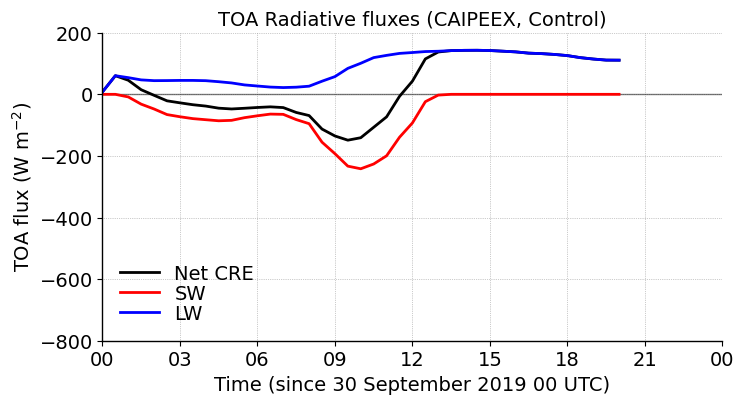

In [33]:
plt.figure(figsize=(8, 4))
plt.style.use('default')

lnwdth=2
fontsize=14

plt.axhline(y=0, color='k', linestyle='-', linewidth=1, alpha=0.5)

plt.plot(ds_4sip_caipeex.time, toa_net_cre_4sip_caipeex, 'k-', linewidth=lnwdth, label='Net CRE')
plt.plot(ds_4sip_caipeex.time, toa_sw_cre_4sip_caipeex, 'r-', linewidth=lnwdth, label='SW')
plt.plot(ds_4sip_caipeex.time, toa_lw_cre_4sip_caipeex, 'b-', linewidth=lnwdth, label='LW')


plt.xlabel('Time (since 30 September 2019 00 UTC)', fontsize=fontsize)#+4, fontweight='bold')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
start_date = datetime(2019, 9, 30, 0, 0) 
end_date = datetime(2019, 10, 1, 0, 0)

plt.xlim(start_date, end_date)
plt.xticks(fontsize=fontsize)
plt.ylim(-800,200)
plt.yticks(fontsize=fontsize)
plt.ylabel('TOA flux (W m$^{-2}$)', fontsize=fontsize)
plt.title('TOA Radiative fluxes (CAIPEEX, Control)', fontsize=fontsize)
plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='best')
plt.grid(True, linestyle=':', linewidth=0.5, color='grey',alpha=0.8)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(1)
plt.gca().spines['bottom'].set_linewidth(1)
plt.show()


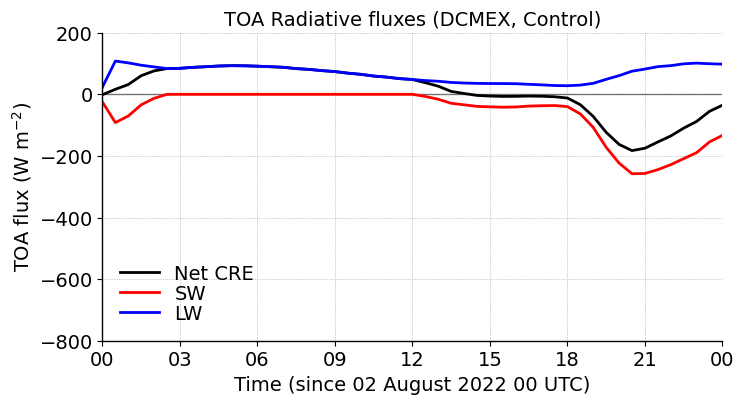

In [32]:
plt.figure(figsize=(8, 4))
plt.style.use('default')

lnwdth=2
fontsize=14

plt.axhline(y=0, color='k', linestyle='-', linewidth=1, alpha=0.5)

plt.plot(ds_4sip_dcmex.time, toa_net_cre_4sip_dcmex, 'k-', linewidth=lnwdth, label='Net CRE')
plt.plot(ds_4sip_dcmex.time, toa_sw_cre_4sip_dcmex, 'r-', linewidth=lnwdth, label='SW')
plt.plot(ds_4sip_dcmex.time, toa_lw_cre_4sip_dcmex, 'b-', linewidth=lnwdth, label='LW')


plt.xlabel('Time (since 02 August 2022 00 UTC)', fontsize=fontsize)#+4, fontweight='bold')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
start_date = datetime(2022, 8, 2, 0, 0) 
end_date = datetime(2022, 8, 3, 0, 0)

plt.xlim(start_date, end_date)
plt.xticks(fontsize=fontsize)
plt.ylim(-800,200)
plt.yticks(fontsize=fontsize)
plt.ylabel('TOA flux (W m$^{-2}$)', fontsize=fontsize)
plt.title('TOA Radiative fluxes (DCMEX, Control)', fontsize=fontsize)
plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='best')
plt.grid(True, linestyle=':', linewidth=0.5, color='grey',alpha=0.8)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(1)
plt.gca().spines['bottom'].set_linewidth(1)
plt.show()


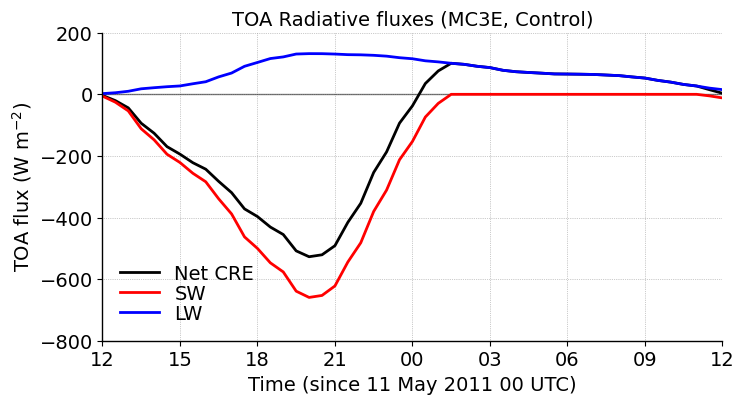

In [31]:
plt.figure(figsize=(8, 4))
plt.style.use('default')

lnwdth=2
fontsize=14

plt.axhline(y=0, color='k', linestyle='-', linewidth=1, alpha=0.5)

plt.plot(ds_4sip_mc3e.time, toa_net_cre_4sip_mc3e, 'k-', linewidth=lnwdth, label='Net CRE')
plt.plot(ds_4sip_mc3e.time, toa_sw_cre_4sip_mc3e, 'r-', linewidth=lnwdth, label='SW')
plt.plot(ds_4sip_mc3e.time, toa_lw_cre_4sip_mc3e, 'b-', linewidth=lnwdth, label='LW')


plt.xlabel('Time (since 11 May 2011 00 UTC)', fontsize=fontsize)#+4, fontweight='bold')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
start_date = datetime(2011, 5, 11, 12, 0) 
end_date = datetime(2011, 5, 12, 12, 0)

plt.xlim(start_date, end_date)
plt.xticks(fontsize=fontsize)
plt.ylim(-800,200)
plt.yticks(fontsize=fontsize)
plt.ylabel('TOA flux (W m$^{-2}$)', fontsize=fontsize)
plt.title('TOA Radiative fluxes (MC3E, Control)', fontsize=fontsize)
plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='best')
plt.grid(True, linestyle=':', linewidth=0.5, color='grey',alpha=0.8)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(1)
plt.gca().spines['bottom'].set_linewidth(1)
plt.show()


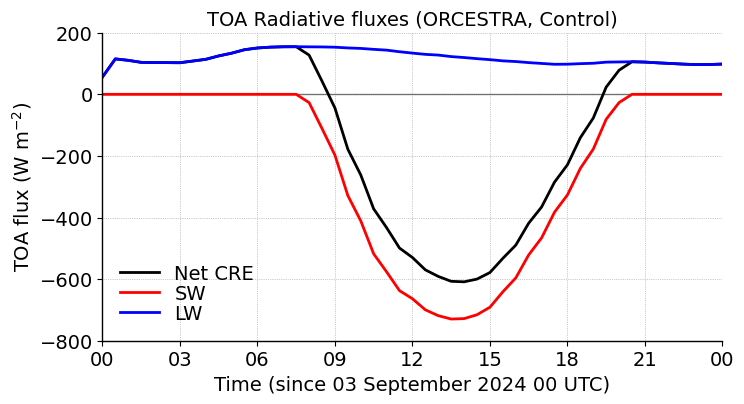

In [29]:
plt.figure(figsize=(8, 4))
plt.style.use('default')

lnwdth=2
fontsize=14

plt.axhline(y=0, color='k', linestyle='-', linewidth=1, alpha=0.5)

plt.plot(ds_4sip_orcestra.time, toa_net_cre_4sip_orcestra, 'k-', linewidth=lnwdth, label='Net CRE')
plt.plot(ds_4sip_orcestra.time, toa_sw_cre_4sip_orcestra, 'r-', linewidth=lnwdth, label='SW')
plt.plot(ds_4sip_orcestra.time, toa_lw_cre_4sip_orcestra, 'b-', linewidth=lnwdth, label='LW')


plt.xlabel('Time (since 03 September 2024 00 UTC)', fontsize=fontsize)#+4, fontweight='bold')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
start_date = datetime(2024, 9, 3, 0, 0) 
end_date = datetime(2024, 9, 4, 0, 0)

plt.xlim(start_date, end_date)
plt.xticks(fontsize=fontsize)
plt.ylim(-800,200)
plt.yticks(fontsize=fontsize)
plt.ylabel('TOA flux (W m$^{-2}$)', fontsize=fontsize)
plt.title('TOA Radiative fluxes (ORCESTRA, Control)', fontsize=fontsize)
plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='best')
plt.grid(True, linestyle=':', linewidth=0.5, color='grey',alpha=0.8)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(1)
plt.gca().spines['bottom'].set_linewidth(1)
plt.show()


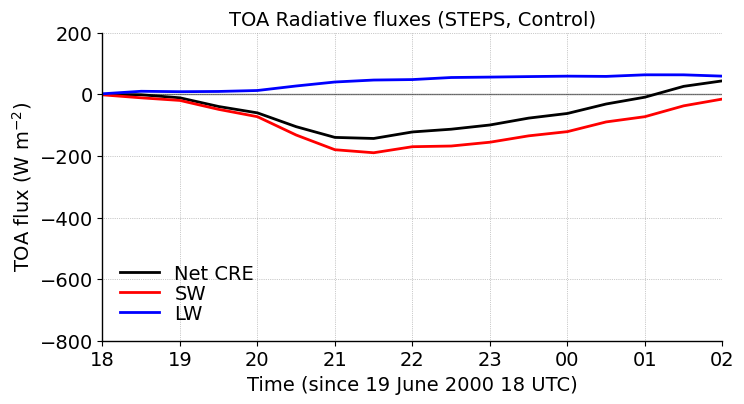

In [30]:
plt.figure(figsize=(8, 4))
plt.style.use('default')

lnwdth=2
fontsize=14

plt.axhline(y=0, color='k', linestyle='-', linewidth=1, alpha=0.5)

plt.plot(ds_4sip_steps.time, toa_net_cre_4sip_steps, 'k-', linewidth=lnwdth, label='Net CRE')
plt.plot(ds_4sip_steps.time, toa_sw_cre_4sip_steps, 'r-', linewidth=lnwdth, label='SW')
plt.plot(ds_4sip_steps.time, toa_lw_cre_4sip_steps, 'b-', linewidth=lnwdth, label='LW')


plt.xlabel('Time (since 19 June 2000 18 UTC)', fontsize=fontsize)#+4, fontweight='bold')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
start_date = datetime(2000, 6, 19, 18, 0) 
end_date = datetime(2000, 6, 20, 2, 0)

plt.xlim(start_date, end_date)
plt.xticks(fontsize=fontsize)
plt.ylim(-800,200)
plt.yticks(fontsize=fontsize)
plt.ylabel('TOA flux (W m$^{-2}$)', fontsize=fontsize)
plt.title('TOA Radiative fluxes (STEPS, Control)', fontsize=fontsize)
plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='best')
plt.grid(True, linestyle=':', linewidth=0.5, color='grey',alpha=0.8)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(1)
plt.gca().spines['bottom'].set_linewidth(1)
plt.show()


In [41]:
ds_4sip_steps

<xarray.Dataset> Size: 26GB
Dimensions:            (time: 17, ncells: 58772, vertices: 3, height: 65,
                        bnds: 2, plev: 1, plev_2: 1, plev_3: 1, height_2: 66)
Coordinates:
  * time               (time) datetime64[ns] 136B 2000-06-19T18:00:00 ... 200...
    clon               (ncells) float64 470kB dask.array<chunksize=(58772,), meta=np.ndarray>
    clat               (ncells) float64 470kB dask.array<chunksize=(58772,), meta=np.ndarray>
  * height             (height) float64 520B 1.0 2.0 3.0 4.0 ... 63.0 64.0 65.0
  * height_2           (height_2) float64 528B 1.0 2.0 3.0 ... 64.0 65.0 66.0
  * plev               (plev) float64 8B 800.0
  * plev_2             (plev_2) float64 8B 400.0
  * plev_3             (plev_3) float64 8B 0.0
Dimensions without coordinates: ncells, vertices, bnds
Data variables: (12/121)
    clon_bnds          (time, ncells, vertices) float64 24MB dask.array<chunksize=(1, 58772, 3), meta=np.ndarray>
    clat_bnds          (time, ncells, vertices) float64 24MB dask.array<chunksize=(1, 58772, 3), meta=np.ndarray>
    height_bnds        (time, height, bnds) float64 18kB dask.array<chunksize=(1, 65, 2), meta=np.ndarray>
    plev_bnds          (time, plev, bnds) float64 272B dask.array<chunksize=(1, 1, 2), meta=np.ndarray>
    plev_2_bnds        (time, plev_2, bnds) float64 272B dask.array<chunksize=(1, 1, 2), meta=np.ndarray>
    plev_3_bnds        (time, plev_3, bnds) float64 272B dask.array<chunksize=(1, 1, 2), meta=np.ndarray>
    ...                 ...
    tqi                (time, height, ncells) float32 260MB dask.array<chunksize=(1, 65, 58772), meta=np.ndarray>
    tq                 (time, height, ncells) float32 260MB dask.array<chunksize=(1, 65, 58772), meta=np.ndarray>
    ciwc_gperm3        (time, height, ncells) float32 260MB dask.array<chunksize=(1, 65, 58772), meta=np.ndarray>
    tiwc_gperm3        (time, height, ncells) float32 260MB dask.array<chunksize=(1, 65, 58772), meta=np.ndarray>
    cdnc_percm3        (time, height, ncells) float32 260MB dask.array<chunksize=(1, 65, 58772), meta=np.ndarray>
    inc_perl           (time, height, ncells) float32 260MB dask.array<chunksize=(1, 65, 58772), meta=np.ndarray>
Attributes:
    CDI:                  Climate Data Interface version 2.4.0 (https://mpime...
    Conventions:          CF-1.6
    number_of_grid_used:  99
    uuidOfHGrid:          6645ac31-09f0-20b1-4cad-bd0687ae2aa0
    uuidOfVGrid:          381a5082-bd93-d8a4-cc41-aab5c5e52a40
    institution:          Max Planck Institute for Meteorology/Deutscher Wett...
    title:                ICON simulation
    source:               version: 2024.10; revision: f3f9a5624ca4223a7fe2f0c...
    history:              /home/b/b382718/continental_cases/4sip/icon-oct2024...
    references:           see MPIM/DWD publications
    comment:              Deepak Waman (b382718) on l30656 (Linux 4.18.0-513....

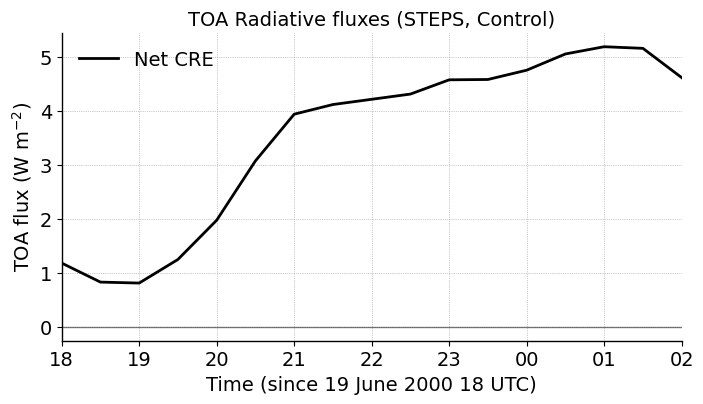

In [39]:
plt.figure(figsize=(8, 4))
plt.style.use('default')

lnwdth=2
fontsize=14

plt.axhline(y=0, color='k', linestyle='-', linewidth=1, alpha=0.5)

plt.plot(ds_4sip_steps.time, ds_4sip_steps.clc.mean(dim=('height','ncells')), 'k-', linewidth=lnwdth, label='Net CRE')

plt.xlabel('Time (since 19 June 2000 18 UTC)', fontsize=fontsize)#+4, fontweight='bold')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
start_date = datetime(2000, 6, 19, 18, 0) 
end_date = datetime(2000, 6, 20, 2, 0)

plt.xlim(start_date, end_date)
plt.xticks(fontsize=fontsize)
#plt.ylim(-800,200)
plt.yticks(fontsize=fontsize)
plt.ylabel('TOA flux (W m$^{-2}$)', fontsize=fontsize)
plt.title('TOA Radiative fluxes (STEPS, Control)', fontsize=fontsize)
plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='best')
plt.grid(True, linestyle=':', linewidth=0.5, color='grey',alpha=0.8)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(1)
plt.gca().spines['bottom'].set_linewidth(1)
plt.show()


### Correlation between latent heating and w

In [45]:
lhr_kperd_4sip_caipeex.shape

(41, 65, 68960)

In [13]:

w_thres = 2.

# CAIPEEX-LHR
dims = ds_4sip_caipeex['d_lhr'].dims
filt_lhr = xr.where((ds_4sip_caipeex.tq > 1.e-6) & (ds_4sip_caipeex.w_vel > w_thres), ds_4sip_caipeex.d_lhr, np.nan)
lhr_kpers_4sip_caipeex = (1./1800.) * np.gradient(ds_4sip_caipeex.d_lhr, axis=0) # w.r.t. time
lhr_kperd_4sip_caipeex = lhr_kpers_4sip_caipeex * 86400.
ds_4sip_caipeex['lhr_kperd'] = (dims, lhr_kperd_4sip_caipeex)
mean_lhr_kperd_4sip_caipeex = np.mean(lhr_kperd_4sip_caipeex, axis=(0,2))

# DCMEX-LHR
dims = ds_4sip_dcmex['d_lhr'].dims
filt_lhr = xr.where((ds_4sip_dcmex.tq > 1.e-6) & (ds_4sip_dcmex.w_vel > w_thres), ds_4sip_dcmex.d_lhr, np.nan)
lhr_kpers_4sip_dcmex = (1./1800.) * np.gradient(ds_4sip_dcmex.d_lhr, axis=0) # w.r.t. time
lhr_kperd_4sip_dcmex = lhr_kpers_4sip_dcmex * 86400.
ds_4sip_dcmex['lhr_kperd'] = (dims, lhr_kperd_4sip_dcmex)
mean_lhr_kperd_4sip_dcmex = np.mean(lhr_kperd_4sip_dcmex, axis=(0,2))

# MC3E-LHR
dims = ds_4sip_mc3e['d_lhr'].dims
filt_lhr = xr.where((ds_4sip_mc3e.tq > 1.e-6) & (ds_4sip_mc3e.w_vel > w_thres), ds_4sip_mc3e.d_lhr, np.nan)
lhr_kpers_4sip_mc3e = (1./1800.) * np.gradient(ds_4sip_mc3e.d_lhr, axis=0) # w.r.t. time
lhr_kperd_4sip_mc3e = lhr_kpers_4sip_mc3e * 86400.
ds_4sip_mc3e['lhr_kperd'] = (dims, lhr_kperd_4sip_mc3e)
mean_lhr_kperd_4sip_mc3e = np.mean(lhr_kperd_4sip_mc3e, axis=(0,2))

# ORCESTRA-LHR
dims = ds_4sip_orcestra['d_lhr'].dims
filt_lhr = xr.where((ds_4sip_orcestra.tq > 1.e-6) & (ds_4sip_orcestra.w_vel > w_thres), ds_4sip_orcestra.d_lhr, np.nan)
lhr_kpers_4sip_orcestra = (1./1800.) * np.gradient(ds_4sip_orcestra.d_lhr, axis=0) # w.r.t. time
lhr_kperd_4sip_orcestra = lhr_kpers_4sip_orcestra * 86400.
ds_4sip_orcestra['lhr_kperd'] = (dims, lhr_kperd_4sip_orcestra)
mean_lhr_kperd_4sip_orcestra = np.mean(lhr_kperd_4sip_orcestra, axis=(0,2))

# STEPS-LHR
dims = ds_4sip_steps['d_lhr'].dims
filt_lhr = xr.where((ds_4sip_steps.tq > 1.e-6) & (ds_4sip_steps.w_vel > w_thres), ds_4sip_steps.d_lhr, np.nan)
lhr_kpers_4sip_steps = (1./1800.) * np.gradient(ds_4sip_steps.d_lhr, axis=0) # w.r.t. time
lhr_kperd_4sip_steps = lhr_kpers_4sip_steps * 86400.
ds_4sip_steps['lhr_kperd'] = (dims, lhr_kperd_4sip_steps)
mean_lhr_kperd_4sip_steps = np.mean(lhr_kperd_4sip_steps, axis=(0,2))



In [65]:
def compute_vertical_corr(w, Q1):
    """
    Compute correlation coefficient r(z) = corr[w(z), Q1(z)] for each vertical level.

    Parameters:
        w (xarray.DataArray): Vertical velocity (dims: time, z, y, x)
        Q1 (xarray.DataArray): Latent heating (dims: time, z, y, x)

    Returns:
        r_profile (np.ndarray): Correlation coefficients at each vertical level (z)
        z_levels (np.ndarray): Corresponding height levels
    """
    # Ensure dimensions match
    assert w.shape == Q1.shape, "Shape mismatch between w and Q1"
    
    # Collapse time and space into 1D for correlation at each level
    z_dim = w.sizes['height']
    r_profile = np.empty(z_dim)

    for k in range(z_dim):
        w_slice = w.isel(height=k).values.flatten()
        Q1_slice = Q1.isel(height=k).values.flatten()
        
        # Mask NaNs if present
        mask = ~np.isnan(w_slice) & ~np.isnan(Q1_slice)
        
        if np.sum(mask) > 10:  # Avoid very sparse slices
            r = np.corrcoef(w_slice[mask], Q1_slice[mask])[0, 1]
            print('r :: ', r)
        else:
            r = np.nan

        r_profile[k] = r

    return r_profile, w.coords['height'].values


In [64]:
z_levels

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
       53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65.])

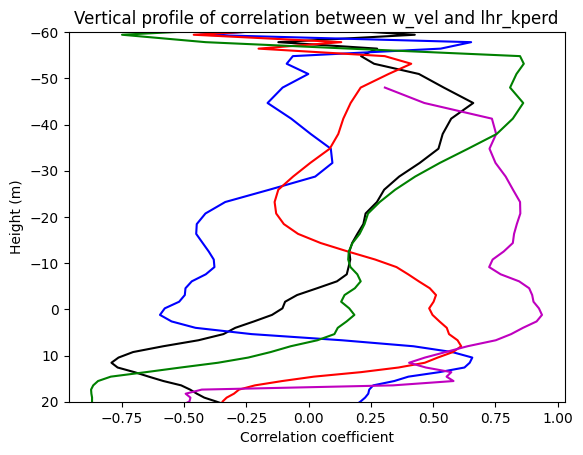

In [85]:
import numpy as np
import matplotlib.pyplot as plt

u = ds_4sip_steps['u'].mean(dim='ncells')
v = ds_4sip_steps['v'].mean(dim='ncells')
w = ds_4sip_steps['w_vel'].mean(dim='ncells')
lwc = ds_4sip_steps['lwc_gperm3'].mean(dim='ncells')
tiwc = ds_4sip_steps['tiwc_gperm3'].mean(dim='ncells')
lhr = ds_4sip_steps['lhr_kperd'].mean(dim='ncells')

# Compute correlation for each height
corrs_u_lhr = [np.corrcoef(u[:, h], lhr[:, h])[0, 1] for h in range(u.shape[1])]
corrs_v_lhr = [np.corrcoef(v[:, h], lhr[:, h])[0, 1] for h in range(v.shape[1])]
corrs_w_lhr = [np.corrcoef(w[:, h], lhr[:, h])[0, 1] for h in range(w.shape[1])]
corrs_lwc_lhr = [np.corrcoef(lwc[:, h], lhr[:, h])[0, 1] for h in range(lwc.shape[1])]
corrs_tiwc_lhr = [np.corrcoef(tiwc[:, h], lhr[:, h])[0, 1] for h in range(tiwc.shape[1])]
heights = ds_4sip_steps['height'].values

# Plot
plt.plot(corrs_u_lhr, mean_tempc_4sip_steps, 'k-')
plt.plot(corrs_v_lhr, mean_tempc_4sip_steps, 'b-')
plt.plot(corrs_w_lhr, mean_tempc_4sip_steps, 'r-')
plt.plot(corrs_lwc_lhr, mean_tempc_4sip_steps, 'm-')
plt.plot(corrs_tiwc_lhr, mean_tempc_4sip_steps, 'g-')
plt.ylim(20,-60)
plt.xlabel('Correlation coefficient')
plt.ylabel('Height (m)')
plt.title('Vertical profile of correlation between w_vel and lhr_kperd')
plt.show()


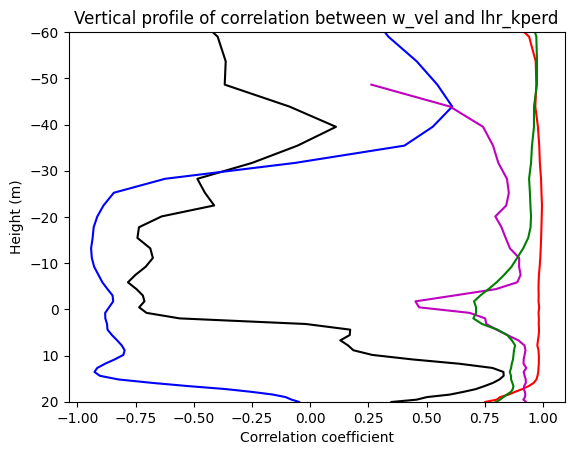

In [95]:
import numpy as np
import matplotlib.pyplot as plt

u = ds_4sip_orcestra['u'].mean(dim='ncells')
v = ds_4sip_orcestra['v'].mean(dim='ncells')
w = ds_4sip_orcestra['w_vel'].mean(dim='ncells')
lwc = ds_4sip_orcestra['lwc_gperm3'].mean(dim='ncells')
tiwc = ds_4sip_orcestra['tiwc_gperm3'].mean(dim='ncells')
lhr = ds_4sip_orcestra['lhr_kperd'].mean(dim='ncells')

# Compute correlation for each height
corrs_u_lhr = [np.corrcoef(u[:, h], lhr[:, h])[0, 1] for h in range(u.shape[1])]
corrs_v_lhr = [np.corrcoef(v[:, h], lhr[:, h])[0, 1] for h in range(v.shape[1])]
corrs_w_lhr = [np.corrcoef(w[:, h], lhr[:, h])[0, 1] for h in range(w.shape[1])]
corrs_lwc_lhr = [np.corrcoef(lwc[:, h], lhr[:, h])[0, 1] for h in range(lwc.shape[1])]
corrs_tiwc_lhr = [np.corrcoef(tiwc[:, h], lhr[:, h])[0, 1] for h in range(tiwc.shape[1])]
heights = ds_4sip_orcestra['height'].values

# Plot
plt.plot(corrs_u_lhr, mean_tempc_4sip_orcestra, 'k-')
plt.plot(corrs_v_lhr, mean_tempc_4sip_orcestra, 'b-')
plt.plot(corrs_w_lhr, mean_tempc_4sip_orcestra, 'r-')
plt.plot(corrs_lwc_lhr, mean_tempc_4sip_orcestra, 'm-')
plt.plot(corrs_tiwc_lhr, mean_tempc_4sip_orcestra, 'g-')
plt.ylim(20,-60)
plt.xlabel('Correlation coefficient')
plt.ylabel('Height (m)')
plt.title('Vertical profile of correlation between w_vel and lhr_kperd')
plt.show()


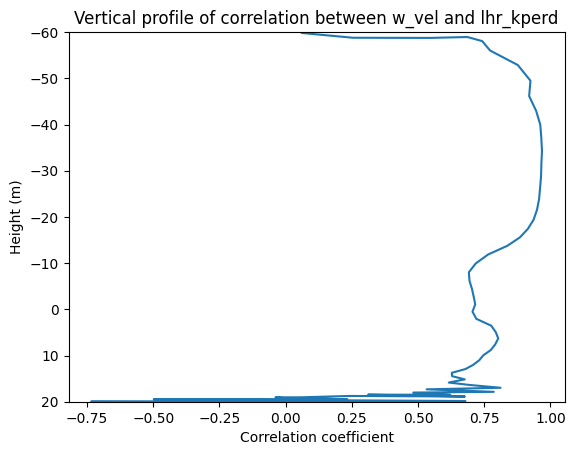

In [72]:
import numpy as np
import matplotlib.pyplot as plt

w = ds_4sip_mc3e['w_vel'].mean(dim='ncells')
lhr = ds_4sip_mc3e['lhr_kperd'].mean(dim='ncells')

# Compute correlation for each height
corrs = [np.corrcoef(w[:, h], lhr[:, h])[0, 1] for h in range(w.shape[1])]
heights = ds_4sip_mc3e['height'].values

# Plot
plt.plot(corrs, mean_tempc_4sip_mc3e)
plt.ylim(20,-60)
plt.xlabel('Correlation coefficient')
plt.ylabel('Height (m)')
plt.title('Vertical profile of correlation between w_vel and lhr_kperd')
plt.show()


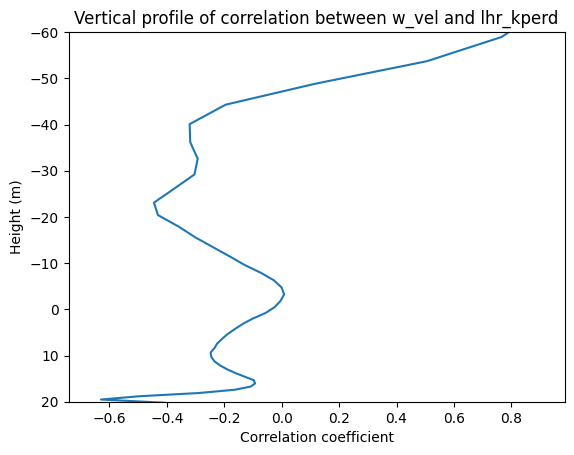

In [73]:
import numpy as np
import matplotlib.pyplot as plt

w = ds_4sip_caipeex['w_vel'].mean(dim='ncells')
lhr = ds_4sip_caipeex['lhr_kperd'].mean(dim='ncells')

# Compute correlation for each height
corrs = [np.corrcoef(w[:, h], lhr[:, h])[0, 1] for h in range(w.shape[1])]
heights = ds_4sip_caipeex['height'].values

# Plot
plt.plot(corrs, mean_tempc_4sip_caipeex)
plt.ylim(20,-60)
plt.xlabel('Correlation coefficient')
plt.ylabel('Height (m)')
plt.title('Vertical profile of correlation between w_vel and lhr_kperd')
plt.show()


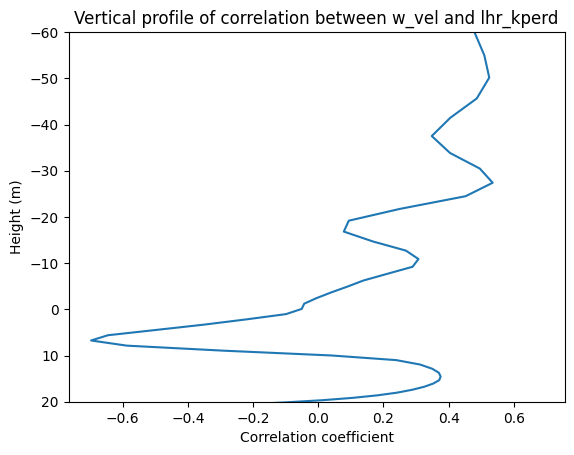

In [75]:
import numpy as np
import matplotlib.pyplot as plt

w = ds_4sip_dcmex['w_vel'].mean(dim='ncells')
lhr = ds_4sip_dcmex['lhr_kperd'].mean(dim='ncells')

# Compute correlation for each height
corrs = [np.corrcoef(w[:, h], lhr[:, h])[0, 1] for h in range(w.shape[1])]
heights = ds_4sip_dcmex['height'].values

# Plot
plt.plot(corrs, mean_tempc_4sip_dcmex)
plt.ylim(20,-60)
plt.xlabel('Correlation coefficient')
plt.ylabel('Height (m)')
plt.title('Vertical profile of correlation between w_vel and lhr_kperd')
plt.show()


In [82]:
import pandas as pd

data_orcestra = {
    #"tot_prec": ds_4sip_steps["tot_prec"].values.flatten(),
    "qc": ds_4sip_steps["qc"].values.flatten(),
    "lwc": ds_4sip_steps["lwc_gperm3"].values.flatten(),
    "iwc": ds_4sip_steps["tiwc_gperm3"].values.flatten(),
    "u": ds_4sip_steps["u"].values.flatten(),
    "v": ds_4sip_steps["v"].values.flatten(),
    "w": ds_4sip_steps["w_vel"].values.flatten(),
    "tempc": ds_4sip_steps["tempc"].values.flatten(),
    "lhr_kperd": ds_4sip_steps["lhr_kperd"].values.flatten()
}
df_orcestra = pd.DataFrame(data_orcestra)


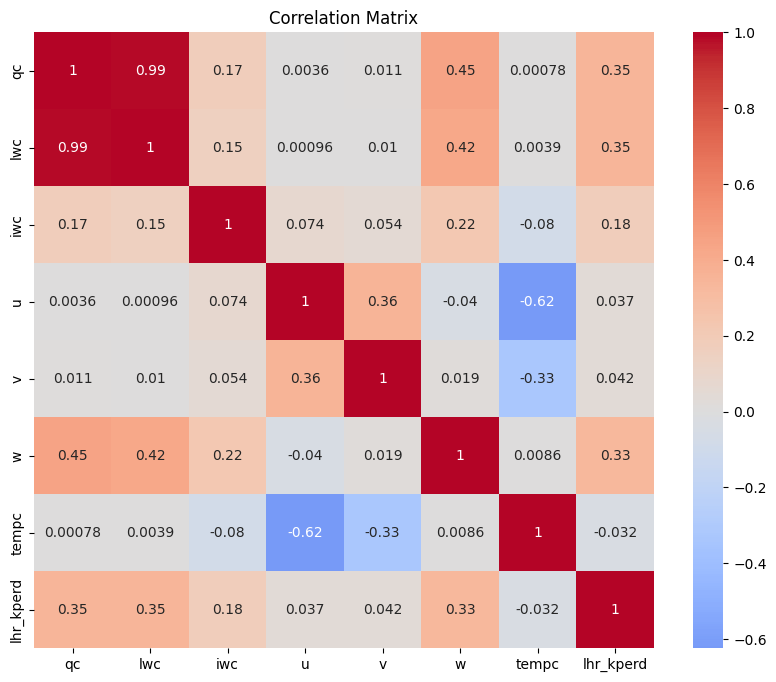

In [83]:

corr_orcestra = df_orcestra.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_orcestra, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()


## Bar plot of TOA radiative fluxes

In [12]:

## CAIPEEX
min_toa_lw_cre_4sip_caipeex = ds_4sip_caipeex.toa_lw_cre_4sip.min().values
max_toa_lw_cre_4sip_caipeex = ds_4sip_caipeex.toa_lw_cre_4sip.max().values
mean_toa_lw_cre_4sip_caipeex = ds_4sip_caipeex.toa_lw_cre_4sip.mean().values

min_toa_sw_cre_4sip_caipeex = ds_4sip_caipeex.toa_sw_cre_4sip.min().values
max_toa_sw_cre_4sip_caipeex = ds_4sip_caipeex.toa_sw_cre_4sip.max().values
mean_toa_sw_cre_4sip_caipeex = ds_4sip_caipeex.toa_sw_cre_4sip.mean().values

min_toa_net_cre_4sip_caipeex = ds_4sip_caipeex.toa_net_cre_4sip.min().values
max_toa_net_cre_4sip_caipeex = ds_4sip_caipeex.toa_net_cre_4sip.max().values
mean_toa_net_cre_4sip_caipeex = ds_4sip_caipeex.toa_net_cre_4sip.mean().values

## DCMEX
min_toa_lw_cre_4sip_dcmex = ds_4sip_dcmex.toa_lw_cre_4sip.min().values
max_toa_lw_cre_4sip_dcmex = ds_4sip_dcmex.toa_lw_cre_4sip.max().values
mean_toa_lw_cre_4sip_dcmex = ds_4sip_dcmex.toa_lw_cre_4sip.mean().values

min_toa_sw_cre_4sip_dcmex = ds_4sip_dcmex.toa_sw_cre_4sip.min().values
max_toa_sw_cre_4sip_dcmex = ds_4sip_dcmex.toa_sw_cre_4sip.max().values
mean_toa_sw_cre_4sip_dcmex = ds_4sip_dcmex.toa_sw_cre_4sip.mean().values

min_toa_net_cre_4sip_dcmex = ds_4sip_dcmex.toa_net_cre_4sip.min().values
max_toa_net_cre_4sip_dcmex = ds_4sip_dcmex.toa_net_cre_4sip.max().values
mean_toa_net_cre_4sip_dcmex = ds_4sip_dcmex.toa_net_cre_4sip.mean().values

## MC3E
min_toa_lw_cre_4sip_mc3e = ds_4sip_mc3e.toa_lw_cre_4sip.min().values
max_toa_lw_cre_4sip_mc3e = ds_4sip_mc3e.toa_lw_cre_4sip.max().values
mean_toa_lw_cre_4sip_mc3e = ds_4sip_mc3e.toa_lw_cre_4sip.mean().values

min_toa_sw_cre_4sip_mc3e = ds_4sip_mc3e.toa_sw_cre_4sip.min().values
max_toa_sw_cre_4sip_mc3e = ds_4sip_mc3e.toa_sw_cre_4sip.max().values
mean_toa_sw_cre_4sip_mc3e = ds_4sip_mc3e.toa_sw_cre_4sip.mean().values

min_toa_net_cre_4sip_mc3e = ds_4sip_mc3e.toa_net_cre_4sip.min().values
max_toa_net_cre_4sip_mc3e = ds_4sip_mc3e.toa_net_cre_4sip.max().values
mean_toa_net_cre_4sip_mc3e = ds_4sip_mc3e.toa_net_cre_4sip.mean().values

## ORCESTRA
min_toa_lw_cre_4sip_orcestra = ds_4sip_orcestra.toa_lw_cre_4sip.min().values
max_toa_lw_cre_4sip_orcestra = ds_4sip_orcestra.toa_lw_cre_4sip.max().values
mean_toa_lw_cre_4sip_orcestra = ds_4sip_orcestra.toa_lw_cre_4sip.mean().values

min_toa_sw_cre_4sip_orcestra = ds_4sip_orcestra.toa_sw_cre_4sip.min().values
max_toa_sw_cre_4sip_orcestra = ds_4sip_orcestra.toa_sw_cre_4sip.max().values
mean_toa_sw_cre_4sip_orcestra = ds_4sip_orcestra.toa_sw_cre_4sip.mean().values

min_toa_net_cre_4sip_orcestra = ds_4sip_orcestra.toa_net_cre_4sip.min().values
max_toa_net_cre_4sip_orcestra = ds_4sip_orcestra.toa_net_cre_4sip.max().values
mean_toa_net_cre_4sip_orcestra = ds_4sip_orcestra.toa_net_cre_4sip.mean().values

## STEPS
min_toa_lw_cre_4sip_steps = ds_4sip_steps.toa_lw_cre_4sip.min().values
max_toa_lw_cre_4sip_steps = ds_4sip_steps.toa_lw_cre_4sip.max().values
mean_toa_lw_cre_4sip_steps = ds_4sip_steps.toa_lw_cre_4sip.mean().values

min_toa_sw_cre_4sip_steps = ds_4sip_steps.toa_sw_cre_4sip.min().values
max_toa_sw_cre_4sip_steps = ds_4sip_steps.toa_sw_cre_4sip.max().values
mean_toa_sw_cre_4sip_steps = ds_4sip_steps.toa_sw_cre_4sip.mean().values

min_toa_net_cre_4sip_steps = ds_4sip_steps.toa_net_cre_4sip.min().values
max_toa_net_cre_4sip_steps = ds_4sip_steps.toa_net_cre_4sip.max().values
mean_toa_net_cre_4sip_steps = ds_4sip_steps.toa_net_cre_4sip.mean().values


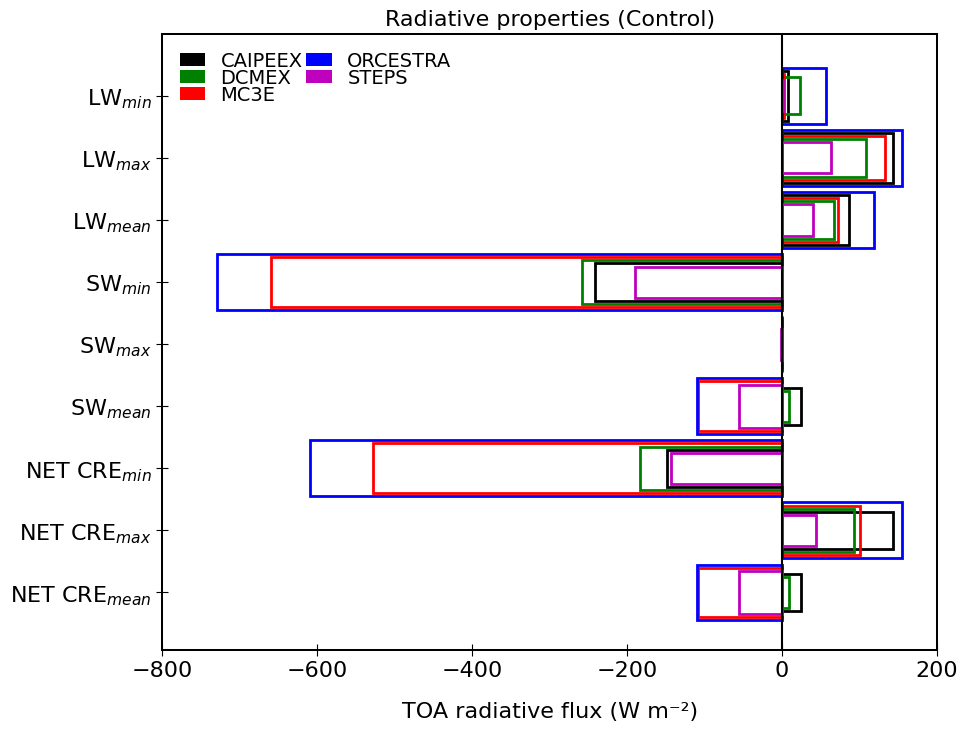

In [41]:
import matplotlib.pyplot as plt
import numpy as np

fontsize = 16.0
ln=2;
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
#w1, w2, w3, w4, w5 = 0.9, 0.6, 0.7, 0.6, 0.5
w1, w2, w3, w4, w5 = 0.9, 0.8, 0.7, 0.6, 0.5

# Data for bars (assuming they are defined elsewhere in your code)
# Q_glc_lif_acm, Q_mix_lif_acm, Q_ice_lif_acm, etc.

#plt.figure('AIE CLOUDS', figsize=(12, 12))

# Plotting
#plt.figure('AIE CLOUDS')
plt.figure(figsize=(10,8))
plt.style.use('default')

plt.gca().tick_params(axis='both', which='major', labelsize=fontsize)
plt.gca().tick_params(axis='both', which='minor', labelsize=fontsize)
plt.gca().tick_params(axis='both', direction='inout')
plt.gca().tick_params(axis='both', length=8)


#plt.barh(x[0], 0., height=w3, color='g', edgecolor='black')
#plt.barh(x[0], 0., height=w4, color='b', edgecolor='black')
#plt.barh(x[0], 0., height=w5, color='m', edgecolor='black')
#plt.barh(x[0], 0., height=w5, color='g', edgecolor='black')
#plt.barh(x[0], 0., height=w5, color='c', edgecolor='black')

# Total CLOUD AIE
# LW flux
plt.barh(x[0], min_toa_lw_cre_4sip_caipeex, height=w2, color='k', linewidth=ln, facecolor='none', edgecolor='k')
plt.barh(x[0], min_toa_lw_cre_4sip_dcmex, height=w4, color='g', linewidth=ln, facecolor='none', edgecolor='g')
plt.barh(x[0], min_toa_lw_cre_4sip_mc3e, height=w3, color='r', linewidth=ln, facecolor='none', edgecolor='r')
plt.barh(x[0], min_toa_lw_cre_4sip_orcestra, height=w1, color='b', linewidth=ln, facecolor='none', edgecolor='b')
plt.barh(x[0], min_toa_lw_cre_4sip_steps, height=w5, color='m', linewidth=ln, facecolor='none', edgecolor='m')

# Total GLACIATED AIE

plt.barh(x[1], max_toa_lw_cre_4sip_caipeex, height=w2, color='k', linewidth=ln, facecolor='none', edgecolor='k')
plt.barh(x[1], max_toa_lw_cre_4sip_dcmex, height=w4, color='g', linewidth=ln, facecolor='none', edgecolor='g')
plt.barh(x[1], max_toa_lw_cre_4sip_mc3e, height=w3, color='r', linewidth=ln, facecolor='none', edgecolor='r')
plt.barh(x[1], max_toa_lw_cre_4sip_orcestra, height=w1, color='b', linewidth=ln, facecolor='none', edgecolor='b')
plt.barh(x[1], max_toa_lw_cre_4sip_steps, height=w5, color='m', linewidth=ln, facecolor='none', edgecolor='m')


# Albedo-Emissivity AIE

plt.barh(x[2], mean_toa_lw_cre_4sip_caipeex, height=w2, color='k', linewidth=ln, facecolor='none', edgecolor='k')
plt.barh(x[2], mean_toa_lw_cre_4sip_dcmex, height=w4, color='g', linewidth=ln, facecolor='none', edgecolor='g')
plt.barh(x[2], mean_toa_lw_cre_4sip_mc3e, height=w3, color='r', linewidth=ln, facecolor='none', edgecolor='r')
plt.barh(x[2], mean_toa_lw_cre_4sip_orcestra, height=w1, color='b', linewidth=ln, facecolor='none', edgecolor='b')
plt.barh(x[2], mean_toa_lw_cre_4sip_steps, height=w5, color='m', linewidth=ln, facecolor='none', edgecolor='m')

# Lifetime AIE

plt.barh(x[3], min_toa_sw_cre_4sip_caipeex, height=w4, color='k', linewidth=ln, facecolor='none', edgecolor='k')
plt.barh(x[3], min_toa_sw_cre_4sip_dcmex, height=w3, color='g', linewidth=ln, facecolor='none', edgecolor='g')
plt.barh(x[3], min_toa_sw_cre_4sip_mc3e, height=w2, color='r', linewidth=ln, facecolor='none', edgecolor='r')
plt.barh(x[3], min_toa_sw_cre_4sip_orcestra, height=w1, color='b', linewidth=ln, facecolor='none', edgecolor='b')
plt.barh(x[3], min_toa_sw_cre_4sip_steps, height=w5, color='m', linewidth=ln, facecolor='none', edgecolor='m')

plt.barh(x[4], max_toa_sw_cre_4sip_caipeex, height=w4, color='k', linewidth=ln, facecolor='none', edgecolor='k')
plt.barh(x[4], max_toa_sw_cre_4sip_dcmex, height=w3, color='g', linewidth=ln, facecolor='none', edgecolor='g')
plt.barh(x[4], max_toa_sw_cre_4sip_mc3e, height=w2, color='r', linewidth=ln, facecolor='none', edgecolor='r')
plt.barh(x[4], max_toa_sw_cre_4sip_orcestra, height=w1, color='b', linewidth=ln, facecolor='none', edgecolor='b')
plt.barh(x[4], max_toa_sw_cre_4sip_steps, height=w5, color='m', linewidth=ln, facecolor='none', edgecolor='m')

plt.barh(x[5], mean_toa_net_cre_4sip_caipeex, height=w4, color='k', linewidth=ln, facecolor='none', edgecolor='k')
plt.barh(x[5], mean_toa_net_cre_4sip_dcmex, height=w5, color='g', linewidth=ln, facecolor='none', edgecolor='g')
plt.barh(x[5], mean_toa_net_cre_4sip_mc3e, height=w2, color='r', linewidth=ln, facecolor='none', edgecolor='r')
plt.barh(x[5], mean_toa_net_cre_4sip_orcestra, height=w1, color='b', linewidth=ln, facecolor='none', edgecolor='b')
plt.barh(x[5], mean_toa_net_cre_4sip_steps, height=w3, color='m', linewidth=ln, facecolor='none', edgecolor='m')

plt.barh(x[6], min_toa_net_cre_4sip_caipeex, height=w4, color='k', linewidth=ln, facecolor='none', edgecolor='k')
plt.barh(x[6], min_toa_net_cre_4sip_dcmex, height=w3, color='g', linewidth=ln, facecolor='none', edgecolor='g')
plt.barh(x[6], min_toa_net_cre_4sip_mc3e, height=w2, color='r', linewidth=ln, facecolor='none', edgecolor='r')
plt.barh(x[6], min_toa_net_cre_4sip_orcestra, height=w1, color='b', linewidth=ln, facecolor='none', edgecolor='b')
plt.barh(x[6], min_toa_net_cre_4sip_steps, height=w5, color='m', linewidth=ln, facecolor='none', edgecolor='m')

plt.barh(x[7], max_toa_net_cre_4sip_caipeex, height=w4, color='k', linewidth=ln, facecolor='none', edgecolor='k')
plt.barh(x[7], max_toa_net_cre_4sip_dcmex, height=w3, color='g', linewidth=ln, facecolor='none', edgecolor='g')
plt.barh(x[7], max_toa_net_cre_4sip_mc3e, height=w2, color='r', linewidth=ln, facecolor='none', edgecolor='r')
plt.barh(x[7], max_toa_net_cre_4sip_orcestra, height=w1, color='b', linewidth=ln, facecolor='none', edgecolor='b')
plt.barh(x[7], max_toa_net_cre_4sip_steps, height=w5, color='m', linewidth=ln, facecolor='none', edgecolor='m')

plt.barh(x[8], mean_toa_net_cre_4sip_caipeex, height=w4, color='k', linewidth=ln, facecolor='none', edgecolor='k')
plt.barh(x[8], mean_toa_net_cre_4sip_dcmex, height=w5, color='g', linewidth=ln, facecolor='none', edgecolor='g')
plt.barh(x[8], mean_toa_net_cre_4sip_mc3e, height=w2, color='r', linewidth=ln, facecolor='none', edgecolor='r')
plt.barh(x[8], mean_toa_net_cre_4sip_orcestra, height=w1, color='b', linewidth=ln, facecolor='none', edgecolor='b')
plt.barh(x[8], mean_toa_net_cre_4sip_steps, height=w3, color='m', linewidth=ln, facecolor='none', edgecolor='m')

plt.axvline(x=0, color='k', linestyle='-')

plt.xlim([-800.0, 200.0])
plt.yticks(x,['LW$_{min}$', 'LW$_{max}$', 'LW$_{mean}$', 'SW$_{min}$', 'SW$_{max}$', 'SW$_{mean}$', 'NET CRE$_{min}$', 
              'NET CRE$_{max}$', 'NET CRE$_{mean}$'], fontsize=fontsize, rotation=0.)
plt.xlabel('TOA radiative flux (W m⁻²)', fontsize=fontsize, labelpad=15)
plt.gca().invert_yaxis()

colors = ['k', 'g', 'r', 'b', 'm']
#labels = ['Total clouds', 'Glaciated clouds', 'Liquid-only clouds', 'Mixed-phase clouds', 'Ice-only clouds']
labels = ['CAIPEEX', 'DCMEX', 'MC3E', 'ORCESTRA', 'STEPS']
hBLG = [plt.bar([0, 0], [0, 0], color=colors[i]) for i in range(len(colors))]
plt.legend(hBLG, labels, loc='best', fontsize=14.0, ncol=2, frameon=False, handlelength=1.3, labelspacing=-0.1,columnspacing=0.2)
#plt.tight_layout(pad=-1.0)

plt.title('Radiative properties (Control)', fontsize=fontsize)
plt.grid(False)
plt.gca().spines['top'].set_linewidth(1.45)
plt.gca().spines['right'].set_linewidth(1.45)
plt.gca().spines['bottom'].set_linewidth(1.45)
plt.gca().spines['left'].set_linewidth(1.45)

plt.show()


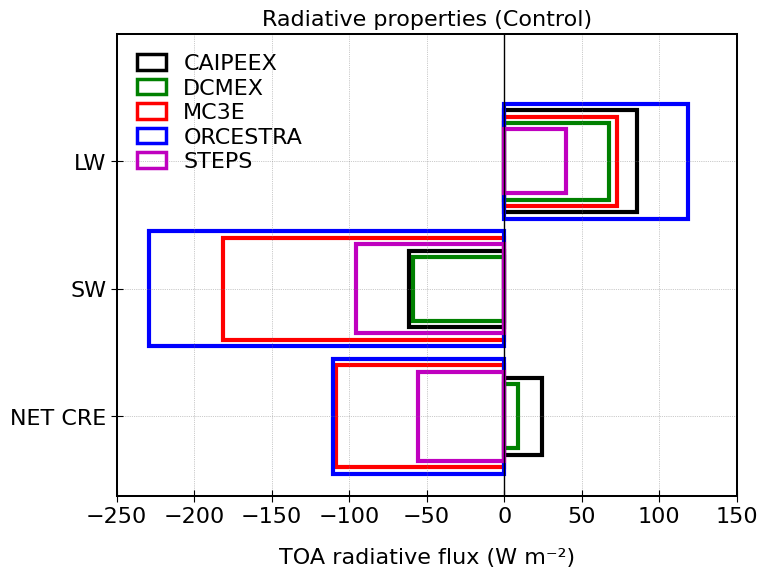

In [75]:
import matplotlib.pyplot as plt
import numpy as np

fnt = 16.0
ln=3;
x = np.array([1, 2, 3])
#w1, w2, w3, w4, w5 = 0.9, 0.6, 0.7, 0.6, 0.5
w1, w2, w3, w4, w5 = 0.9, 0.8, 0.7, 0.6, 0.5

# Data for bars (assuming they are defined elsewhere in your code)
# Q_glc_lif_acm, Q_mix_lif_acm, Q_ice_lif_acm, etc.

#plt.figure('AIE CLOUDS', figsize=(12, 12))

# Plotting
#plt.figure('AIE CLOUDS')
plt.figure(figsize=(8,6))
plt.style.use('default')

plt.gca().tick_params(axis='both', which='major', labelsize=fnt)
plt.gca().tick_params(axis='both', which='minor', labelsize=fnt)
plt.gca().tick_params(axis='both', direction='inout')
plt.gca().tick_params(axis='both', length=8)


#plt.barh(x[0], 0., height=w3, color='g', edgecolor='black')
#plt.barh(x[0], 0., height=w4, color='b', edgecolor='black')
#plt.barh(x[0], 0., height=w5, color='m', edgecolor='black')
#plt.barh(x[0], 0., height=w5, color='g', edgecolor='black')
#plt.barh(x[0], 0., height=w5, color='c', edgecolor='black')

# Total CLOUD AIE

plt.barh(x[0], mean_toa_lw_cre_4sip_caipeex, height=w2, color='k', linewidth=ln, facecolor='none', edgecolor='k')
plt.barh(x[0], mean_toa_lw_cre_4sip_dcmex, height=w4, color='g', linewidth=ln, facecolor='none', edgecolor='g')
plt.barh(x[0], mean_toa_lw_cre_4sip_mc3e, height=w3, color='r', linewidth=ln, facecolor='none', edgecolor='r')
plt.barh(x[0], mean_toa_lw_cre_4sip_orcestra, height=w1, color='b', linewidth=ln, facecolor='none', edgecolor='b')
plt.barh(x[0], mean_toa_lw_cre_4sip_steps, height=w5, color='m', linewidth=ln, facecolor='none', edgecolor='m')


plt.barh(x[1], mean_toa_sw_cre_4sip_caipeex, height=w4, color='k', linewidth=ln, facecolor='none', edgecolor='k')
plt.barh(x[1], mean_toa_sw_cre_4sip_dcmex, height=w5, color='g', linewidth=ln, facecolor='none', edgecolor='g')
plt.barh(x[1], mean_toa_sw_cre_4sip_mc3e, height=w2, color='r', linewidth=ln, facecolor='none', edgecolor='r')
plt.barh(x[1], mean_toa_sw_cre_4sip_orcestra, height=w1, color='b', linewidth=ln, facecolor='none', edgecolor='b')
plt.barh(x[1], mean_toa_sw_cre_4sip_steps, height=w3, color='m', linewidth=ln, facecolor='none', edgecolor='m')


plt.barh(x[2], mean_toa_net_cre_4sip_caipeex, height=w4, color='k', linewidth=ln, facecolor='none', edgecolor='k')
plt.barh(x[2], mean_toa_net_cre_4sip_dcmex, height=w5, color='g', linewidth=ln, facecolor='none', edgecolor='g')
plt.barh(x[2], mean_toa_net_cre_4sip_mc3e, height=w2, color='r', linewidth=ln, facecolor='none', edgecolor='r')
plt.barh(x[2], mean_toa_net_cre_4sip_orcestra, height=w1, color='b', linewidth=ln, facecolor='none', edgecolor='b')
plt.barh(x[2], mean_toa_net_cre_4sip_steps, height=w3, color='m', linewidth=ln, facecolor='none', edgecolor='m')

plt.axvline(x=0, color='k', linewidth=ln-2, linestyle='-')
plt.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)

plt.xlim([-250.0, 150.0])
plt.yticks(x,['LW', 'SW', 'NET CRE'], fontsize=fnt, rotation=0.)
plt.xlabel('TOA radiative flux (W m⁻²)', fontsize=fnt, labelpad=15)
plt.gca().invert_yaxis()

colors = ['k', 'g', 'r', 'b', 'm']
#labels = ['Total clouds', 'Glaciated clouds', 'Liquid-only clouds', 'Mixed-phase clouds', 'Ice-only clouds']
labels = ['CAIPEEX', 'DCMEX', 'MC3E', 'ORCESTRA', 'STEPS']
hBLG = [plt.bar([0, 0], [0, 0], color=colors[i]) for i in range(len(colors))]
legend=plt.legend(hBLG, labels, loc='best', fontsize=fnt, ncol=1, frameon=False, facecolor='none', 
                  handlelength=1.3, labelspacing=0.2, columnspacing=0.2)
for patch, color in zip(legend.get_patches(), colors):
    patch.set_facecolor('none')      # Transparent fill
    patch.set_edgecolor(color)       # Colored edge
    patch.set_linewidth(ln-0.5) 
    
#plt.tight_layout(pad=-1.0)

plt.title('Radiative properties (Control)', fontsize=fnt)
#plt.grid(False)
plt.gca().spines['top'].set_linewidth(1.45)
plt.gca().spines['right'].set_linewidth(1.45)
plt.gca().spines['bottom'].set_linewidth(1.45)
plt.gca().spines['left'].set_linewidth(1.45)

plt.show()


## Principal component analysis (PCA) of radiative regimes 

In [41]:
import xarray as xr
import numpy as np
import pandas as pd

# List of storm datasets and a standard prefix map
storm_datasets = {
    'caipeex': ds_4sip_caipeex,
    'dcmex': ds_4sip_dcmex,
    'mc3e': ds_4sip_mc3e,
    'orcestra': ds_4sip_orcestra,
    'steps': ds_4sip_steps
}

def extract_features(ds, prefix):
    def safe_stat(var, func):
        return func(ds[var].values[np.isfinite(ds[var].values)])
    
    return {
        'SW$_{min}$': safe_stat(f'toa_sw_cre_4sip', np.min),
        'SW$_{max}$': safe_stat(f'toa_sw_cre_4sip', np.max),
        'SW$_{mean}$': safe_stat(f'toa_sw_cre_4sip', np.mean),
        'LW$_{min}$': safe_stat(f'toa_lw_cre_4sip', np.min),
        'LW$_{max}$': safe_stat(f'toa_lw_cre_4sip', np.max),
        'LW$_{mean}$': safe_stat(f'toa_lw_cre_4sip', np.mean),
        'NET CRE$_{min}$': safe_stat(f'toa_net_cre_4sip', np.min),
        'NET CRE$_{mean}$': safe_stat(f'toa_net_cre_4sip', np.mean)#,
        #'PEAK_SW_time': np.nanargmin(ds[f'toa_sw_cre_4sip'].values),
        #'PEAK_LW_time': np.nanargmax(ds[f'toa_lw_cre_4sip'].values)
    }

features = []
labels = []

for name, ds in storm_datasets.items():
    feats = extract_features(ds, name)
    features.append(feats)
    labels.append(name.upper())

df = pd.DataFrame(features, index=labels)


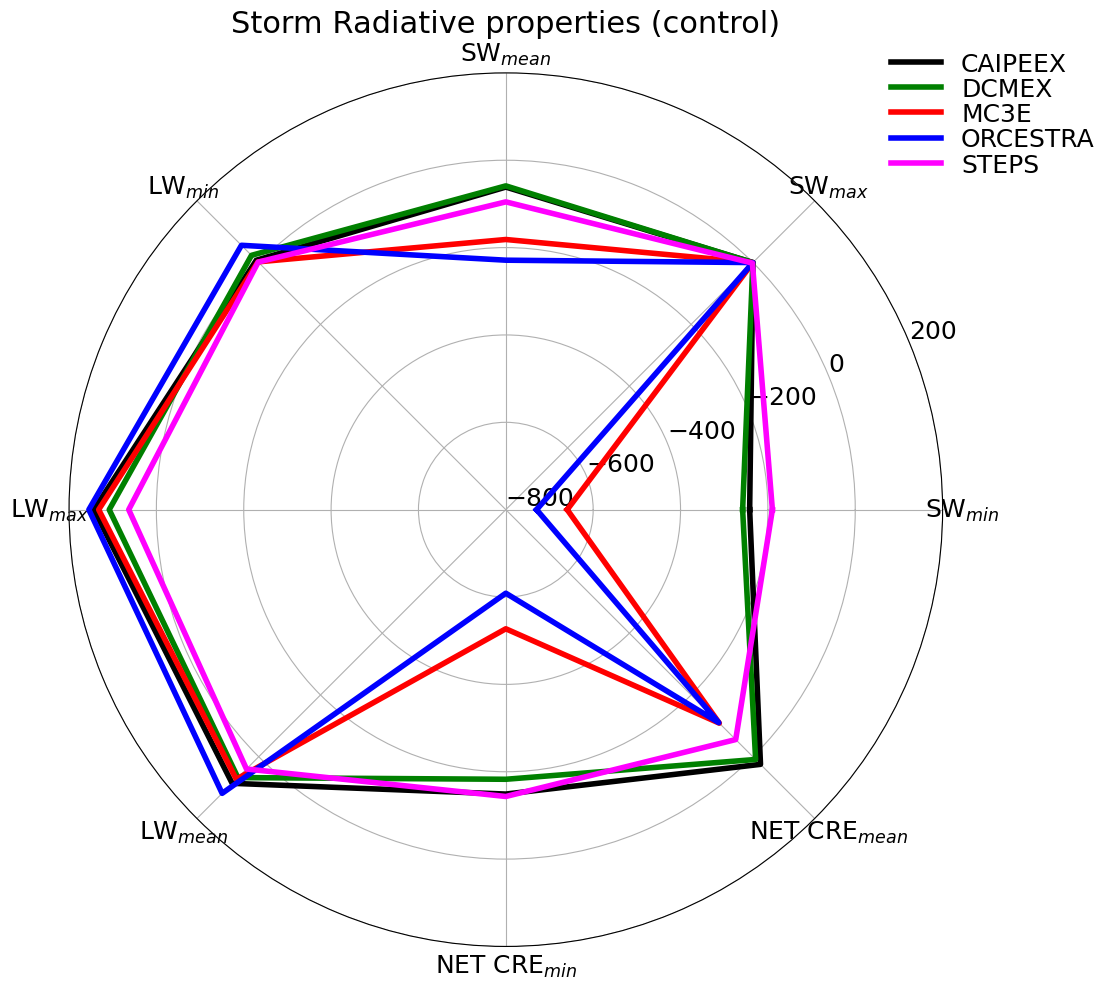

In [42]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi

fnt=18;
ln=4;
def multi_radar_plot(df):#, title="Storm Radiative properties"):
    labels = df.columns
    num_vars = len(labels)

    # Compute angles
    angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
    angles += [angles[0]]  # to close the loop

    fig, ax = plt.subplots(figsize=(16, 10), subplot_kw=dict(polar=True))
    plt.style.use('default')
    # Plot each storm
    #colors = plt.cm.tab10.colors  # 10 distinct colors
    custom_colors = {
    "CAIPEEX": "black",
    "DCMEX": "green",
    "MC3E": "red",
    "ORCESTRA": "blue",
    "STEPS": "magenta"
    }
    for i, (storm_name, row) in enumerate(df.iterrows()):
        values = row.values
        values = np.concatenate([values, [values[0]]])
        color = custom_colors.get(storm_name, "gray")
        #ax.plot(angles, values, label=storm_name, color=colors[i % len(colors)], linewidth=ln)
        #ax.fill(angles, values, alpha=0.0, color=colors[i % len(colors)])
        ax.plot(angles, values, label=storm_name, color=color, linewidth=ln)
        ax.fill(angles, values, alpha=0.0, color=color)

    # Axis settings
    ax.set_xticks(angles[:-1])
    ax.tick_params(axis='y', labelsize=fnt)
    #ax.set_rgrids(fontsize=fnt)
    ax.set_xticklabels(labels, fontsize=fnt)
    ax.set_ylim(-800, 200)
    ax.set_yticks([-800, -600, -400, -200, 0, 200])
    #ax.set_yticklabels(fontsize=fnt)
    #ax.set_ylim(200, -800)
    #ax.set_yticks([200, 0, -200, -400, -600, -800])
    #ax.set_yticklabels(['-600', '-400', '-200', '0'], fontsize=fnt)
    ax.set_title('Storm Radiative properties (control)', fontsize=fnt+4)
    ax.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fnt, bbox_to_anchor=(1.2, 1.05), loc='best')#frameon=False, loc='best', ncols=1, fontsize=fnt, bbox_to_anchor=(1.2, 1.05))
    plt.tight_layout()
    plt.show()


multi_radar_plot(df)

In [141]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'], index=labels)


In [142]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust k if needed
clusters = kmeans.fit_predict(X_scaled)

df_pca['Cluster'] = clusters


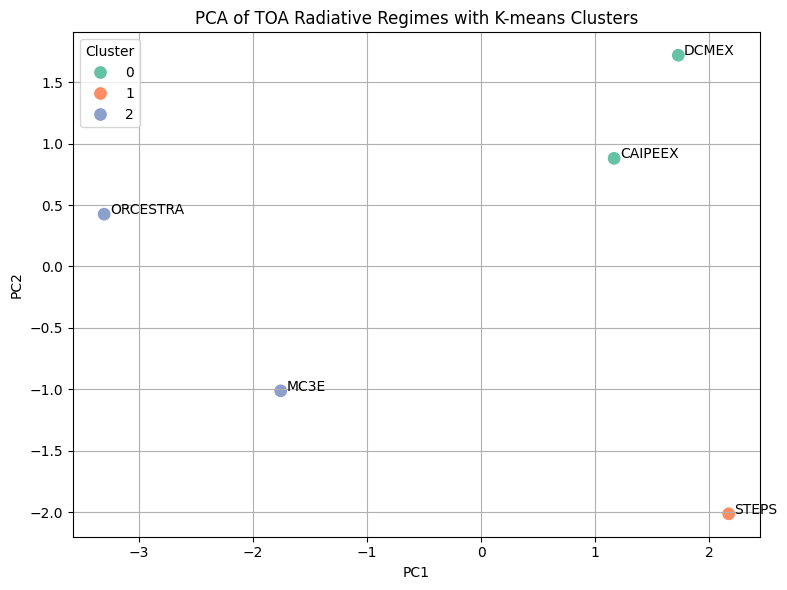

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=100)

for name, row in df_pca.iterrows():
    plt.text(row['PC1'] + 0.05, row['PC2'], name, fontsize=10)

plt.title("PCA of TOA Radiative Regimes with K-means Clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.tight_layout()
plt.show()


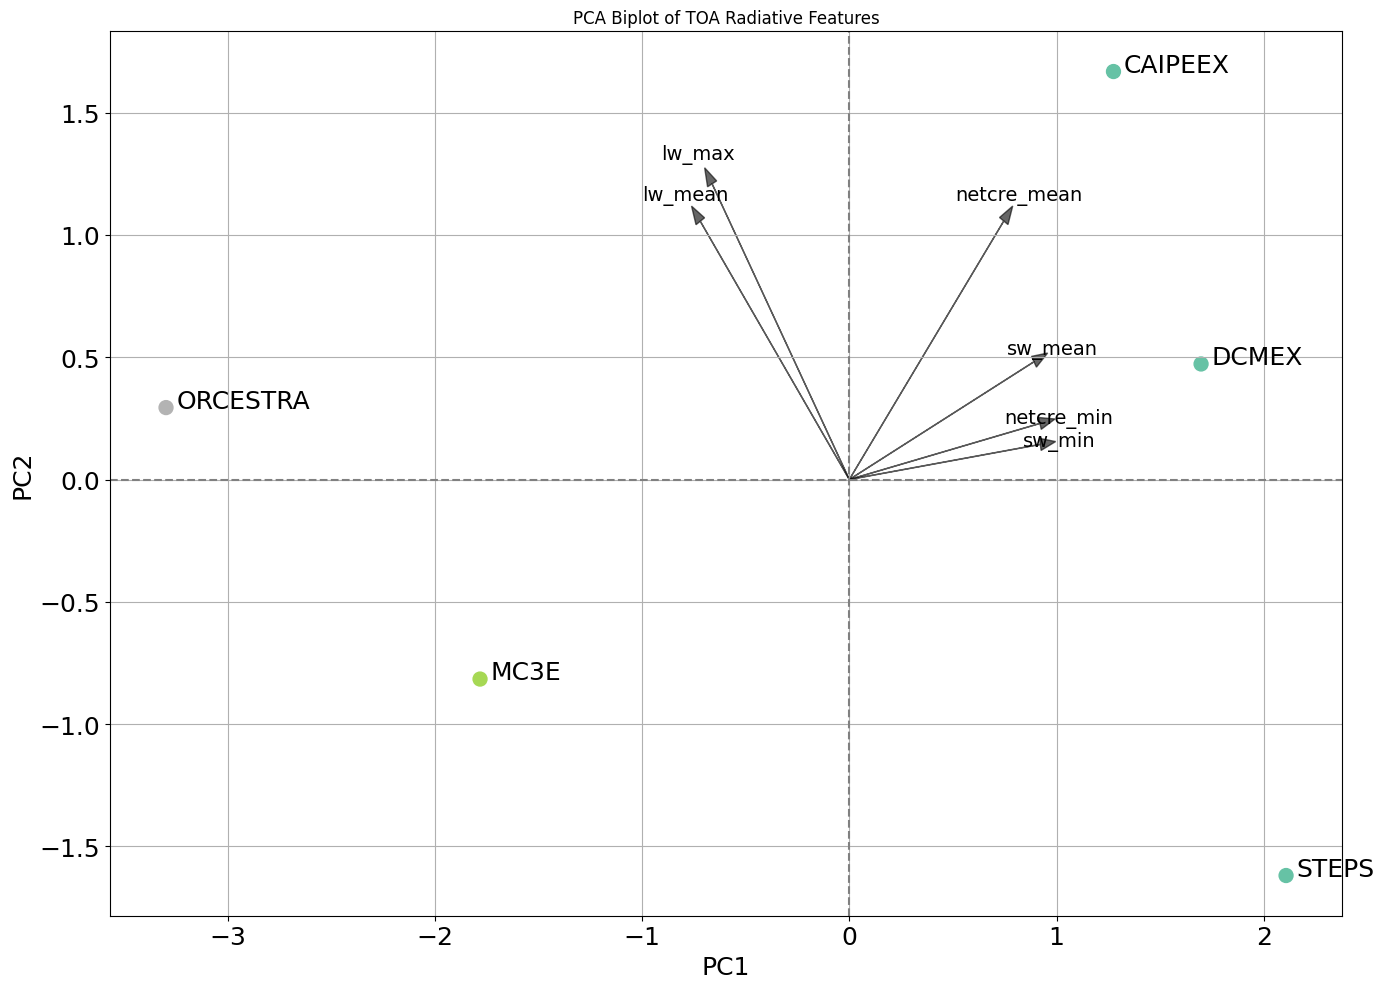

In [130]:
import matplotlib.pyplot as plt

# Extract loadings and variable names
loadings = pca.components_.T
feature_names = df.columns

fnt=18;
ln=2;
plt.figure(figsize=(14, 10))

# Plot storm scores (PCA points)
plt.scatter(df_pca['PC1'], df_pca['PC2'], s=100, c=df_pca['Cluster'], cmap='Set2')
for name in df_pca.index:
    plt.text(df_pca.loc[name, 'PC1'] + 0.05, df_pca.loc[name, 'PC2'], name, fontsize=fnt)

# Plot feature vectors (loadings)
for i in range(len(feature_names)):
    plt.arrow(0, 0, loadings[i, 0]*2, loadings[i, 1]*2,
              color='black', alpha=0.6, head_width=0.05)
    plt.text(loadings[i, 0]*2.2, loadings[i, 1]*2.2, feature_names[i],
             color='black', ha='center', va='center', fontsize=fnt-4)

plt.xlabel("PC1", fontsize=fnt)
plt.ylabel("PC2", fontsize=fnt)
plt.title("PCA Biplot of TOA Radiative Features")
plt.grid(True)
plt.xticks(fontsize=fnt)
plt.yticks(fontsize=fnt)
plt.axhline(0, linestyle='--', color='gray')
plt.axvline(0, linestyle='--', color='gray')
plt.tight_layout()
plt.show()


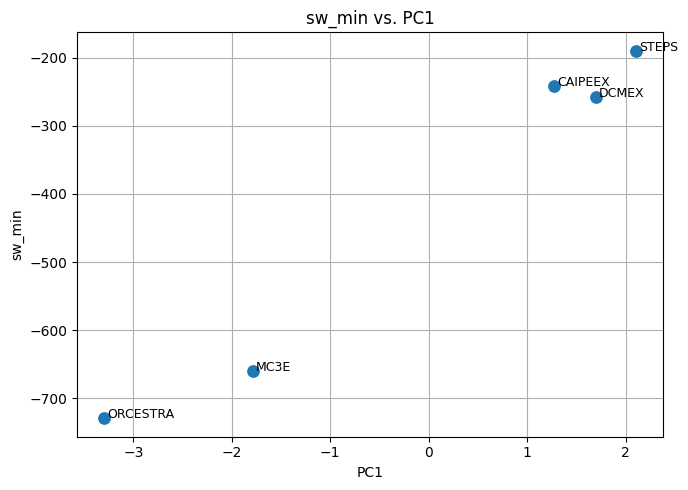

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_vs_pca(df_original, df_pca, feature, pc='PC1'):
    plt.figure(figsize=(7, 5))
    sns.scatterplot(x=df_pca[pc], y=df_original[feature], s=100)

    for name in df_pca.index:
        plt.text(df_pca.loc[name, pc] + 0.03, df_original.loc[name, feature], name, fontsize=9)

    plt.xlabel(pc)
    plt.ylabel(feature)
    plt.title(f"{feature} vs. {pc}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example: how sw_min relates to PC1
plot_feature_vs_pca(df, df_pca, 'sw_min', pc='PC1')


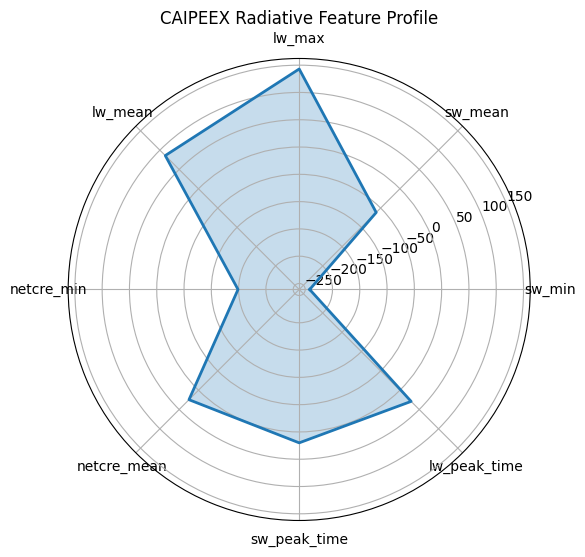

In [144]:
from math import pi

def plot_radar(data_row, title):
    labels = df.columns
    values = data_row.values
    values = np.concatenate([values, [values[0]]])  # close the loop

    angles = [n / float(len(labels)) * 2 * pi for n in range(len(labels))]
    angles += [angles[0]]  # complete loop

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.plot(angles, values, linewidth=2)
    ax.fill(angles, values, alpha=0.25)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=10)
    ax.set_title(title)
    plt.show()

# Example: plot for CAIPEEX
plot_radar(df.loc["CAIPEEX"], "CAIPEEX Radiative Feature Profile")
#plot_radar(df.loc["DCMEX"], "DCMEX Radiative Feature Profile")
#plot_radar(df.loc["MC3E"], "MC3E Radiative Feature Profile")
#plot_radar(df.loc["ORCESTRA"], "ORCESTRA Radiative Feature Profile")
#plot_radar(df.loc["STEPS"], "STEPS Radiative Feature Profile")


## Maximum updraft

In [15]:

thres_q = 1.e-6
max_w_up_caipeex = ds_4sip_caipeex.w.max(dim=('time','ncells'))
max_w_up_dcmex = ds_4sip_dcmex.w.max(dim=('time','ncells'))
max_w_up_mc3e = ds_4sip_mc3e.w.max(dim=('time','ncells'))
max_w_up_orcestra = ds_4sip_orcestra.w.max(dim=('time','ncells'))
max_w_up_steps = ds_4sip_steps.w.max(dim=('time','ncells'))


max_w_dn_caipeex = ds_4sip_caipeex.w.min(dim=('time','ncells'))
max_w_dn_dcmex = ds_4sip_dcmex.w.min(dim=('time','ncells'))
max_w_dn_mc3e = ds_4sip_mc3e.w.min(dim=('time','ncells'))
max_w_dn_orcestra = ds_4sip_orcestra.w.min(dim=('time','ncells'))
max_w_dn_steps = ds_4sip_steps.w.min(dim=('time','ncells'))

variables = [max_w_up_caipeex, max_w_up_dcmex, max_w_up_mc3e, max_w_up_orcestra, max_w_up_steps]
numpy_variables = [var.values for var in variables]

max_w_up_caipeex = numpy_variables[0]
max_w_up_dcmex = numpy_variables[1]
max_w_up_mc3e = numpy_variables[2]
max_w_up_orcestra = numpy_variables[3]
max_w_up_steps = numpy_variables[4]

variables = [max_w_dn_caipeex, max_w_dn_dcmex, max_w_dn_mc3e, max_w_dn_orcestra, max_w_dn_steps]
numpy_variables = [var.values for var in variables]

max_w_dn_caipeex = numpy_variables[0]
max_w_dn_dcmex = numpy_variables[1]
max_w_dn_mc3e = numpy_variables[2]
max_w_dn_orcestra = numpy_variables[3]
max_w_dn_steps = numpy_variables[4]


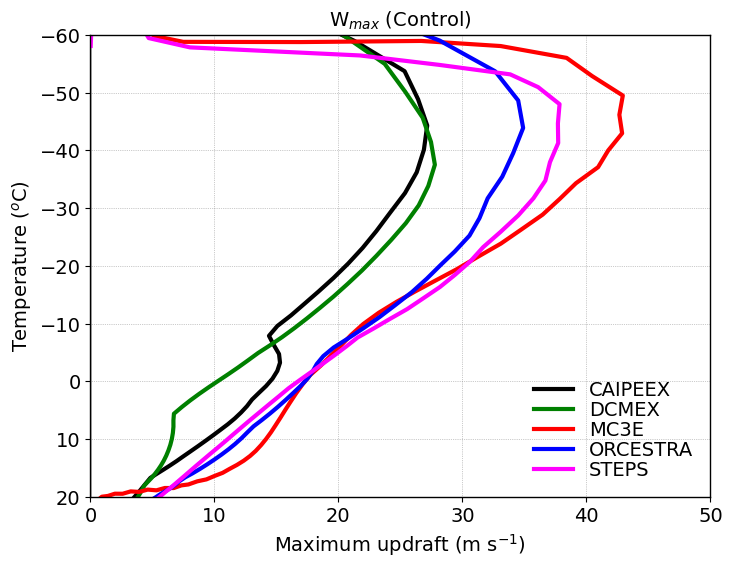

In [27]:

fontsize=14;
lnwdth=3;
alpha=0.6;

plt.figure(figsize=(8,6))
plt.style.use('default')

fact = 1.

plt.axvline(x=0, color='grey', linestyle='-', linewidth=2, alpha=0.6)
plt.plot(max_w_up_caipeex[:-1]*fact, mean_tempc_4sip_caipeex, '-', color='black', linewidth=lnwdth, label='CAIPEEX')
plt.plot(max_w_up_dcmex[:-1]*fact, mean_tempc_4sip_dcmex, '-', color='green', linewidth=lnwdth, label='DCMEX')
plt.plot(max_w_up_mc3e[:-1]*fact, mean_tempc_4sip_mc3e, '-', color='red', linewidth=lnwdth, label='MC3E')
plt.plot(max_w_up_orcestra[:-1]*fact, mean_tempc_4sip_orcestra, '-', color='blue', linewidth=lnwdth, label='ORCESTRA')
plt.plot(max_w_up_steps[:-1]*fact, mean_tempc_4sip_steps, '-', color='magenta', linewidth=lnwdth, label='STEPS')

#plt.plot(max_w_dn_caipeex[:-1]*fact, mean_tempc_4sip_caipeex, '-', color='black', linewidth=lnwdth)#, label='CAIPEEX')
#plt.plot(max_w_dn_dcmex[:-1]*fact, mean_tempc_4sip_dcmex, '-', color='green', linewidth=lnwdth)#, label='DCMEX')
#plt.plot(max_w_dn_mc3e[:-1]*fact, mean_tempc_4sip_mc3e, '-', color='red', linewidth=lnwdth)#, label='MC3E')
#plt.plot(max_w_dn_orcestra[:-1]*fact, mean_tempc_4sip_orcestra, '-', color='blue', linewidth=lnwdth)#, label='ORCESTRA')
#plt.plot(max_w_dn_steps[:-1]*fact, mean_tempc_4sip_steps, '-', color='magenta', linewidth=lnwdth)#, label='STEPS')
plt.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)

#plt.xscale('log')
plt.xlim(0, 50)
plt.ylim(20, -60)

#plt.xticks([1.e-4, 1.e-2, 1.e0, 1.e2, 1.e4, 1.e6])
plt.yticks([20, 10, 0, -10, -20, -30, -40, -50, -60])

plt.tick_params(axis='x', labelsize=fontsize)
plt.tick_params(axis='y', labelsize=fontsize)

plt.xlabel('Maximum updraft (m s$^{-1}$)', fontsize=fontsize)#, fontweight='bold')
plt.ylabel('Temperature ($^{o}$C)', fontsize=fontsize)#, fontweight='bold')

plt.tick_params(axis='x', labelsize=fontsize)
plt.tick_params(axis='y', labelsize=fontsize)


plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='best')

plt.title('W$_{max}$ (Control)', fontsize=fontsize)#, fontweight='bold')

for spine in ['top', 'bottom', 'left', 'right']:
    plt.gca().spines[spine].set_visible(True)
    plt.gca().spines[spine].set_linewidth(1)
    plt.gca().spines[spine].set_color('black')

plt.show()

## Cloud droplet number concentration

In [23]:

thres_w = 2.
mean_cdnc_up_caipeex = ds_4sip_caipeex.cdnc_percm3.where(ds_4sip_caipeex.w_vel > thres_w).mean(dim=('time','ncells'))
mean_cdnc_up_dcmex = ds_4sip_dcmex.cdnc_percm3.where(ds_4sip_dcmex.w_vel > thres_w).mean(dim=('time','ncells'))
mean_cdnc_up_mc3e = ds_4sip_mc3e.cdnc_percm3.where(ds_4sip_mc3e.w_vel > thres_w).mean(dim=('time','ncells'))
mean_cdnc_up_orcestra = ds_4sip_orcestra.cdnc_percm3.where(ds_4sip_orcestra.w_vel > thres_w).mean(dim=('time','ncells'))
mean_cdnc_up_steps = ds_4sip_steps.cdnc_percm3.where(ds_4sip_steps.w_vel > thres_w).mean(dim=('time','ncells'))

variables = [mean_cdnc_up_caipeex, mean_cdnc_up_dcmex, mean_cdnc_up_mc3e, mean_cdnc_up_orcestra, mean_cdnc_up_steps]
numpy_variables = [var.values for var in variables]

mean_cdnc_up_caipeex = numpy_variables[0]
mean_cdnc_up_dcmex = numpy_variables[1]
mean_cdnc_up_mc3e = numpy_variables[2]
mean_cdnc_up_orcestra = numpy_variables[3]
mean_cdnc_up_steps = numpy_variables[4]


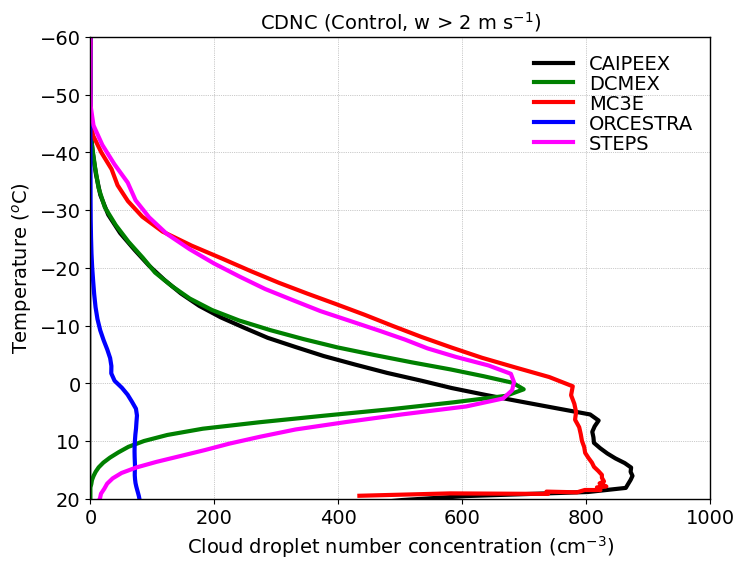

In [25]:

fontsize=14;
lnwdth=3;
alpha=0.6;

plt.figure(figsize=(8, 6))
plt.style.use('default')

fact = 1.

plt.axvline(x=0, color='grey', linestyle='-', linewidth=2, alpha=0.6)
plt.plot(mean_cdnc_up_caipeex*fact, mean_tempc_4sip_caipeex, '-', color='black', linewidth=lnwdth, label='CAIPEEX')
plt.plot(mean_cdnc_up_dcmex*fact, mean_tempc_4sip_dcmex, '-', color='green', linewidth=lnwdth, label='DCMEX')
plt.plot(mean_cdnc_up_mc3e*fact, mean_tempc_4sip_mc3e, '-', color='red', linewidth=lnwdth, label='MC3E')
plt.plot(mean_cdnc_up_orcestra*fact, mean_tempc_4sip_orcestra, '-', color='blue', linewidth=lnwdth, label='ORCESTRA')
plt.plot(mean_cdnc_up_steps*fact, mean_tempc_4sip_steps, '-', color='magenta', linewidth=lnwdth, label='STEPS')
plt.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)

#plt.xscale('log')
plt.xlim(1.e0, 1.e3)
plt.ylim(20, -60)

plt.xticks([0, 200, 400, 600, 800, 1000])
plt.yticks([20, 10, 0, -10, -20, -30, -40, -50, -60])

plt.tick_params(axis='x', labelsize=fontsize)
plt.tick_params(axis='y', labelsize=fontsize)

plt.xlabel('Cloud droplet number concentration (cm$^{-3}$)', fontsize=fontsize)#, fontweight='bold')
plt.ylabel('Temperature ($^{o}$C)', fontsize=fontsize)#, fontweight='bold')

plt.tick_params(axis='x', labelsize=fontsize)
plt.tick_params(axis='y', labelsize=fontsize)


plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='best')

plt.title('CDNC (Control, w > 2 m s$^{-1}$)', fontsize=fontsize)#, fontweight='bold')

for spine in ['top', 'bottom', 'left', 'right']:
    plt.gca().spines[spine].set_visible(True)
    plt.gca().spines[spine].set_linewidth(1)
    plt.gca().spines[spine].set_color('black')

plt.show()

## Total ice particle number concentration

In [28]:


thres_w = 2.
mean_tot_inc_up_caipeex = ds_4sip_caipeex.inc_perl.where(ds_4sip_caipeex.w_vel > thres_w).mean(dim=('time','ncells'))
mean_tot_inc_up_dcmex = ds_4sip_dcmex.inc_perl.where(ds_4sip_dcmex.w_vel > thres_w).mean(dim=('time','ncells'))
mean_tot_inc_up_mc3e = ds_4sip_mc3e.inc_perl.where(ds_4sip_mc3e.w_vel > thres_w).mean(dim=('time','ncells'))
mean_tot_inc_up_orcestra = ds_4sip_orcestra.inc_perl.where(ds_4sip_orcestra.w_vel > thres_w).mean(dim=('time','ncells'))
mean_tot_inc_up_steps = ds_4sip_steps.inc_perl.where(ds_4sip_steps.w_vel > thres_w).mean(dim=('time','ncells'))

mean_tot_inc_dn_caipeex = ds_4sip_caipeex.inc_perl.where(ds_4sip_caipeex.w_vel < -1*thres_w).mean(dim=('time','ncells'))
mean_tot_inc_dn_dcmex = ds_4sip_dcmex.inc_perl.where(ds_4sip_dcmex.w_vel < -1*thres_w).mean(dim=('time','ncells'))
mean_tot_inc_dn_mc3e = ds_4sip_mc3e.inc_perl.where(ds_4sip_mc3e.w_vel < -1*thres_w).mean(dim=('time','ncells'))
mean_tot_inc_dn_orcestra = ds_4sip_orcestra.inc_perl.where(ds_4sip_orcestra.w_vel < -1*thres_w).mean(dim=('time','ncells'))
mean_tot_inc_dn_steps = ds_4sip_steps.inc_perl.where(ds_4sip_steps.w_vel < -1*thres_w).mean(dim=('time','ncells'))


In [29]:
variables = [mean_tot_inc_up_caipeex, mean_tot_inc_up_dcmex, mean_tot_inc_up_mc3e, mean_tot_inc_up_orcestra, mean_tot_inc_up_steps]
numpy_variables = [var.values for var in variables]

mean_tot_inc_up_caipeex = numpy_variables[0]
mean_tot_inc_up_dcmex = numpy_variables[1]
mean_tot_inc_up_mc3e = numpy_variables[2]
mean_tot_inc_up_orcestra = numpy_variables[3]
mean_tot_inc_up_steps = numpy_variables[4]

variables = [mean_tot_inc_dn_caipeex, mean_tot_inc_dn_dcmex, mean_tot_inc_dn_mc3e, mean_tot_inc_dn_orcestra, mean_tot_inc_dn_steps]
numpy_variables = [var.values for var in variables]

mean_tot_inc_dn_caipeex = numpy_variables[0]
mean_tot_inc_dn_dcmex = numpy_variables[1]
mean_tot_inc_dn_mc3e = numpy_variables[2]
mean_tot_inc_dn_orcestra = numpy_variables[3]
mean_tot_inc_dn_steps = numpy_variables[4]


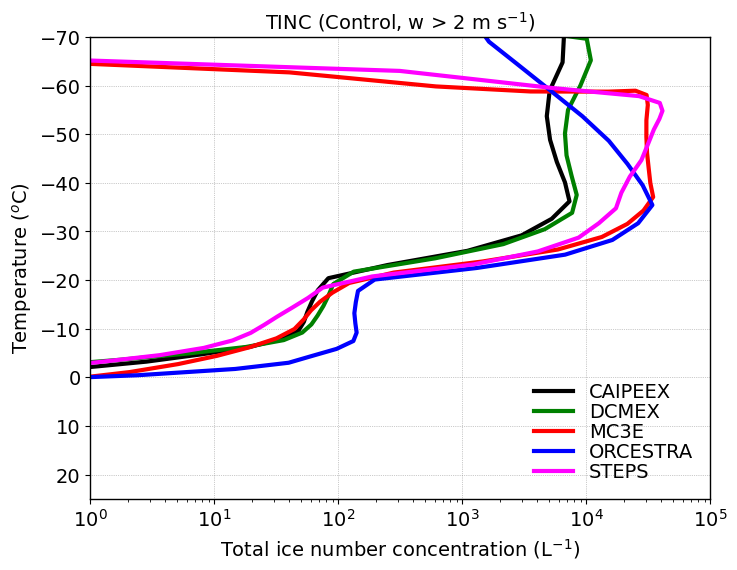

In [37]:
fontsize=14;
lnwdth=3;
alpha=0.6;

plt.figure(figsize=(8, 6))
plt.style.use('default')

plt1=plt.gca()
#plt2=plt1.twinx()

fact = 1.
plt1.axvline(x=0, color='grey', linestyle='-', linewidth=2, alpha=0.6)
plt1.plot(mean_tot_inc_up_caipeex*fact, mean_tempc_4sip_caipeex, '-', color='black', linewidth=lnwdth, label='CAIPEEX')
plt1.plot(mean_tot_inc_up_dcmex*fact, mean_tempc_4sip_dcmex, '-', color='green', linewidth=lnwdth, label='DCMEX')
plt1.plot(mean_tot_inc_up_mc3e*fact, mean_tempc_4sip_mc3e, '-', color='red', linewidth=lnwdth, label='MC3E')
plt1.plot(mean_tot_inc_up_orcestra*fact, mean_tempc_4sip_orcestra, '-', color='blue', linewidth=lnwdth, label='ORCESTRA')
plt1.plot(mean_tot_inc_up_steps*fact, mean_tempc_4sip_steps, '-', color='magenta', linewidth=lnwdth, label='STEPS')

#plt2.plot(mean_tot_inc_up_caipeex*fact, mean_ht_4sip_caipeex, '-', color='none', linewidth=lnwdth)#, label='No SB')
#plt2.plot(mean_tot_inc_up_dcmex*fact, mean_ht_4sip_dcmex, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_tot_inc_up_mc3e*fact, mean_ht_4sip_mc3e, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_tot_inc_up_orcestra*fact, mean_ht_4sip_orcestra, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_tot_inc_up_steps*fact, mean_ht_4sip_steps, '-', color='none', linewidth=lnwdth)

plt1.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)
#plt2.grid(True, linestyle='-', linewidth=0., color='grey', alpha=0.8)

plt1.set_xscale('log')
plt1.set_xlim(1.e0, 1.e5)
plt1.set_ylim(25, -70)
#plt2.set_ylim(0.5, 20)

#plt1.set_xticks([1.e-4, 1.e-2, 1.e0, 1.e2, 1.e4, 1.e6])
plt1.set_yticks([20, 10, 0, -10, -20, -30, -40, -50, -60, -70])
#plt2.set_yticks([0, 4, 8, 12, 16, 20])

plt1.tick_params(axis='x', labelsize=fontsize)
plt1.tick_params(axis='y', labelsize=fontsize)
#plt2.tick_params(axis='y', labelsize=fontsize)

plt1.set_xlabel('Total ice number concentration (L$^{-1}$)', fontsize=fontsize)
plt1.set_ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
#plt2.set_ylabel('Altitude (km)', fontsize=fontsize)

plt1.tick_params(axis='x', labelsize=fontsize)
plt1.tick_params(axis='y', labelsize=fontsize)
#plt2.tick_params(axis='y', labelsize=fontsize)


plt1.legend()
plt1.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='best')

plt.title('TINC (Control, w > 2 m s$^{-1}$)', fontsize=fontsize)

for spine in ['top', 'bottom', 'left', 'right']:
    plt.gca().spines[spine].set_visible(True)
    plt.gca().spines[spine].set_linewidth(1)
    plt.gca().spines[spine].set_color('black')

plt.show()

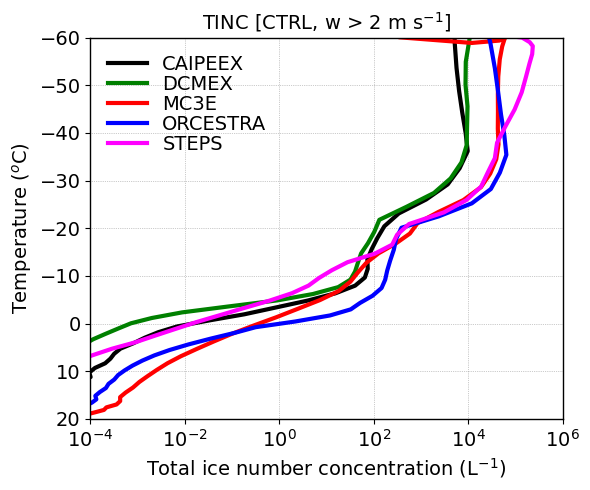

In [110]:
fontsize=14;
lnwdth=3;
alpha=0.6;

plt.figure(figsize=(6, 5))
plt.style.use('default')

fact = 1.

plt.axvline(x=0, color='grey', linestyle='-', linewidth=2, alpha=0.6)
plt.plot(mean_tot_inc_up_caipeex*fact, mean_tempc_4sip_caipeex, '-', color='black', linewidth=lnwdth, label='CAIPEEX')
plt.plot(mean_tot_inc_up_dcmex*fact, mean_tempc_4sip_dcmex, '-', color='green', linewidth=lnwdth, label='DCMEX')
plt.plot(mean_tot_inc_up_mc3e*fact, mean_tempc_4sip_mc3e, '-', color='red', linewidth=lnwdth, label='MC3E')
plt.plot(mean_tot_inc_up_orcestra*fact, mean_tempc_4sip_orcestra, '-', color='blue', linewidth=lnwdth, label='ORCESTRA')
plt.plot(mean_tot_inc_up_steps*fact, mean_tempc_4sip_steps, '-', color='magenta', linewidth=lnwdth, label='STEPS')
plt.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)

plt.xscale('log')
plt.xlim(1.e-4, 1.e6)
plt.ylim(20, -60)

#plt.xticks([1.e-4, 1.e-2, 1.e0, 1.e2, 1.e4, 1.e6])
plt.yticks([20, 10, 0, -10, -20, -30, -40, -50, -60])

plt.tick_params(axis='x', labelsize=fontsize)
plt.tick_params(axis='y', labelsize=fontsize)

plt.xlabel('Total ice number concentration (L$^{-1}$)', fontsize=fontsize)#, fontweight='bold')
plt.ylabel('Temperature ($^{o}$C)', fontsize=fontsize)#, fontweight='bold')

plt.tick_params(axis='x', labelsize=fontsize)
plt.tick_params(axis='y', labelsize=fontsize)


plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='best')

plt.title('TINC [CTRL, w > 2 m s$^{-1}$]', fontsize=fontsize)#, fontweight='bold')

for spine in ['top', 'bottom', 'left', 'right']:
    plt.gca().spines[spine].set_visible(True)
    plt.gca().spines[spine].set_linewidth(1)
    plt.gca().spines[spine].set_color('black')

plt.tight_layout()
plt.show()

<xarray.Dataset> Size: 26GB
Dimensions:            (time: 17, ncells: 58772, vertices: 3, height: 65,
                        bnds: 2, plev: 1, plev_2: 1, plev_3: 1, height_2: 66)
Coordinates:
  * time               (time) datetime64[ns] 136B 2000-06-19T18:00:00 ... 200...
    clon               (ncells) float64 470kB dask.array<chunksize=(58772,), meta=np.ndarray>
    clat               (ncells) float64 470kB dask.array<chunksize=(58772,), meta=np.ndarray>
  * height             (height) float64 520B 1.0 2.0 3.0 4.0 ... 63.0 64.0 65.0
  * height_2           (height_2) float64 528B 1.0 2.0 3.0 ... 64.0 65.0 66.0
  * plev               (plev) float64 8B 800.0
  * plev_2             (plev_2) float64 8B 400.0
  * plev_3             (plev_3) float64 8B 0.0
Dimensions without coordinates: ncells, vertices, bnds
Data variables: (12/121)
    clon_bnds          (time, ncells, vertices) float64 24MB dask.array<chunksize=(1, 58772, 3), meta=np.ndarray>
    clat_bnds          (time, ncells, vertices) float64 24MB dask.array<chunksize=(1, 58772, 3), meta=np.ndarray>
    height_bnds        (time, height, bnds) float64 18kB dask.array<chunksize=(1, 65, 2), meta=np.ndarray>
    plev_bnds          (time, plev, bnds) float64 272B dask.array<chunksize=(1, 1, 2), meta=np.ndarray>
    plev_2_bnds        (time, plev_2, bnds) float64 272B dask.array<chunksize=(1, 1, 2), meta=np.ndarray>
    plev_3_bnds        (time, plev_3, bnds) float64 272B dask.array<chunksize=(1, 1, 2), meta=np.ndarray>
    ...                 ...
    tqi                (time, height, ncells) float32 260MB dask.array<chunksize=(1, 65, 58772), meta=np.ndarray>
    tq                 (time, height, ncells) float32 260MB dask.array<chunksize=(1, 65, 58772), meta=np.ndarray>
    ciwc_gperm3        (time, height, ncells) float32 260MB dask.array<chunksize=(1, 65, 58772), meta=np.ndarray>
    tiwc_gperm3        (time, height, ncells) float32 260MB dask.array<chunksize=(1, 65, 58772), meta=np.ndarray>
    cdnc_percm3        (time, height, ncells) float32 260MB dask.array<chunksize=(1, 65, 58772), meta=np.ndarray>
    inc_perl           (time, height, ncells) float32 260MB dask.array<chunksize=(1, 65, 58772), meta=np.ndarray>
Attributes:
    CDI:                  Climate Data Interface version 2.4.0 (https://mpime...
    Conventions:          CF-1.6
    number_of_grid_used:  99
    uuidOfHGrid:          6645ac31-09f0-20b1-4cad-bd0687ae2aa0
    uuidOfVGrid:          381a5082-bd93-d8a4-cc41-aab5c5e52a40
    institution:          Max Planck Institute for Meteorology/Deutscher Wett...
    title:                ICON simulation
    source:               version: 2024.10; revision: f3f9a5624ca4223a7fe2f0c...
    history:              /home/b/b382718/continental_cases/4sip/icon-oct2024...
    references:           see MPIM/DWD publications
    comment:              Deepak Waman (b382718) on l30656 (Linux 4.18.0-513....

## Mass mixing ratio

In [13]:

thres_q = 1.e-12

mean_qc_4sip_caipeex = ds_4sip_caipeex.qc.where(ds_4sip_caipeex.qc > thres_q).mean(dim=('time','ncells'))
mean_qc_4sip_dcmex = ds_4sip_dcmex.qc.where(ds_4sip_dcmex.qc > thres_q).mean(dim=('time','ncells'))
mean_qc_4sip_mc3e = ds_4sip_mc3e.qc.where(ds_4sip_mc3e.qc > thres_q).mean(dim=('time','ncells'))
mean_qc_4sip_orcestra = ds_4sip_orcestra.qc.where(ds_4sip_orcestra.qc > thres_q).mean(dim=('time','ncells'))
mean_qc_4sip_steps = ds_4sip_steps.qc.where(ds_4sip_steps.qc > thres_q).mean(dim=('time','ncells'))

variables = [mean_qc_4sip_caipeex, mean_qc_4sip_dcmex, mean_qc_4sip_mc3e, mean_qc_4sip_orcestra, mean_qc_4sip_steps]
numpy_variables = [var.values for var in variables]

mean_qc_4sip_caipeex = numpy_variables[0]
mean_qc_4sip_dcmex = numpy_variables[1]
mean_qc_4sip_mc3e = numpy_variables[2]
mean_qc_4sip_orcestra = numpy_variables[3]
mean_qc_4sip_steps = numpy_variables[4]

mean_qnc_4sip_caipeex = ds_4sip_caipeex.qnc.where(ds_4sip_caipeex.qc > thres_q).mean(dim=('time','ncells'))
mean_qnc_4sip_dcmex = ds_4sip_dcmex.qnc.where(ds_4sip_dcmex.qc > thres_q).mean(dim=('time','ncells'))
mean_qnc_4sip_mc3e = ds_4sip_mc3e.qnc.where(ds_4sip_mc3e.qc > thres_q).mean(dim=('time','ncells'))
mean_qnc_4sip_orcestra = ds_4sip_orcestra.qnc.where(ds_4sip_orcestra.qc > thres_q).mean(dim=('time','ncells'))
mean_qnc_4sip_steps = ds_4sip_steps.qnc.where(ds_4sip_steps.qc > thres_q).mean(dim=('time','ncells'))

variables = [mean_qnc_4sip_caipeex, mean_qnc_4sip_dcmex, mean_qnc_4sip_mc3e, mean_qnc_4sip_orcestra, mean_qnc_4sip_steps]
numpy_variables = [var.values for var in variables]

mean_qnc_4sip_caipeex = numpy_variables[0]
mean_qnc_4sip_dcmex = numpy_variables[1]
mean_qnc_4sip_mc3e = numpy_variables[2]
mean_qnc_4sip_orcestra = numpy_variables[3]
mean_qnc_4sip_steps = numpy_variables[4]


In [14]:

thres_q = 1.e-12

mean_qi_4sip_caipeex = ds_4sip_caipeex.qi.where(ds_4sip_caipeex.qi > thres_q).mean(dim=('time','ncells'))
mean_qi_4sip_dcmex = ds_4sip_dcmex.qi.where(ds_4sip_dcmex.qi > thres_q).mean(dim=('time','ncells'))
mean_qi_4sip_mc3e = ds_4sip_mc3e.qi.where(ds_4sip_mc3e.qi > thres_q).mean(dim=('time','ncells'))
mean_qi_4sip_orcestra = ds_4sip_orcestra.qi.where(ds_4sip_orcestra.qi > thres_q).mean(dim=('time','ncells'))
mean_qi_4sip_steps = ds_4sip_steps.qi.where(ds_4sip_steps.qi > thres_q).mean(dim=('time','ncells'))

variables = [mean_qi_4sip_caipeex, mean_qi_4sip_dcmex, mean_qi_4sip_mc3e, mean_qi_4sip_orcestra, mean_qi_4sip_steps]
numpy_variables = [var.values for var in variables]

mean_qi_4sip_caipeex = numpy_variables[0]
mean_qi_4sip_dcmex = numpy_variables[1]
mean_qi_4sip_mc3e = numpy_variables[2]
mean_qi_4sip_orcestra = numpy_variables[3]
mean_qi_4sip_steps = numpy_variables[4]

mean_qs_4sip_caipeex = ds_4sip_caipeex.qs.where(ds_4sip_caipeex.qs > thres_q).mean(dim=('time','ncells'))
mean_qs_4sip_dcmex = ds_4sip_dcmex.qs.where(ds_4sip_dcmex.qs > thres_q).mean(dim=('time','ncells'))
mean_qs_4sip_mc3e = ds_4sip_mc3e.qs.where(ds_4sip_mc3e.qs > thres_q).mean(dim=('time','ncells'))
mean_qs_4sip_orcestra = ds_4sip_orcestra.qs.where(ds_4sip_orcestra.qs > thres_q).mean(dim=('time','ncells'))
mean_qs_4sip_steps = ds_4sip_steps.qs.where(ds_4sip_steps.qs > thres_q).mean(dim=('time','ncells'))

variables = [mean_qs_4sip_caipeex, mean_qs_4sip_dcmex, mean_qs_4sip_mc3e, mean_qs_4sip_orcestra, mean_qs_4sip_steps]
numpy_variables = [var.values for var in variables]

mean_qs_4sip_caipeex = numpy_variables[0]
mean_qs_4sip_dcmex = numpy_variables[1]
mean_qs_4sip_mc3e = numpy_variables[2]
mean_qs_4sip_orcestra = numpy_variables[3]
mean_qs_4sip_steps = numpy_variables[4]


In [15]:

thres_q = 1.e-12

mean_qg_4sip_caipeex = ds_4sip_caipeex.qg.where(ds_4sip_caipeex.qg > thres_q).mean(dim=('time','ncells'))
mean_qg_4sip_dcmex = ds_4sip_dcmex.qg.where(ds_4sip_dcmex.qg > thres_q).mean(dim=('time','ncells'))
mean_qg_4sip_mc3e = ds_4sip_mc3e.qg.where(ds_4sip_mc3e.qg > thres_q).mean(dim=('time','ncells'))
mean_qg_4sip_orcestra = ds_4sip_orcestra.qg.where(ds_4sip_orcestra.qg > thres_q).mean(dim=('time','ncells'))
mean_qg_4sip_steps = ds_4sip_steps.qg.where(ds_4sip_steps.qg > thres_q).mean(dim=('time','ncells'))

variables = [mean_qg_4sip_caipeex, mean_qg_4sip_dcmex, mean_qg_4sip_mc3e, mean_qg_4sip_orcestra, mean_qg_4sip_steps]
numpy_variables = [var.values for var in variables]

mean_qg_4sip_caipeex = numpy_variables[0]
mean_qg_4sip_dcmex = numpy_variables[1]
mean_qg_4sip_mc3e = numpy_variables[2]
mean_qg_4sip_orcestra = numpy_variables[3]
mean_qg_4sip_steps = numpy_variables[4]

mean_qh_4sip_caipeex = ds_4sip_caipeex.qh.where(ds_4sip_caipeex.qh > thres_q).mean(dim=('time','ncells'))
mean_qh_4sip_dcmex = ds_4sip_dcmex.qh.where(ds_4sip_dcmex.qh > thres_q).mean(dim=('time','ncells'))
mean_qh_4sip_mc3e = ds_4sip_mc3e.qh.where(ds_4sip_mc3e.qh > thres_q).mean(dim=('time','ncells'))
mean_qh_4sip_orcestra = ds_4sip_orcestra.qh.where(ds_4sip_orcestra.qh > thres_q).mean(dim=('time','ncells'))
mean_qh_4sip_steps = ds_4sip_steps.qh.where(ds_4sip_steps.qh > thres_q).mean(dim=('time','ncells'))

variables = [mean_qh_4sip_caipeex, mean_qh_4sip_dcmex, mean_qh_4sip_mc3e, mean_qh_4sip_orcestra, mean_qh_4sip_steps]
numpy_variables = [var.values for var in variables]

mean_qh_4sip_caipeex = numpy_variables[0]
mean_qh_4sip_dcmex = numpy_variables[1]
mean_qh_4sip_mc3e = numpy_variables[2]
mean_qh_4sip_orcestra = numpy_variables[3]
mean_qh_4sip_steps = numpy_variables[4]


In [16]:

thres_q = 1.e-12

mean_qr_4sip_caipeex = ds_4sip_caipeex.qr.where(ds_4sip_caipeex.qr > thres_q).mean(dim=('time','ncells'))
mean_qr_4sip_dcmex = ds_4sip_dcmex.qr.where(ds_4sip_dcmex.qr > thres_q).mean(dim=('time','ncells'))
mean_qr_4sip_mc3e = ds_4sip_mc3e.qr.where(ds_4sip_mc3e.qr > thres_q).mean(dim=('time','ncells'))
mean_qr_4sip_orcestra = ds_4sip_orcestra.qr.where(ds_4sip_orcestra.qr > thres_q).mean(dim=('time','ncells'))
mean_qr_4sip_steps = ds_4sip_steps.qr.where(ds_4sip_steps.qr > thres_q).mean(dim=('time','ncells'))

variables = [mean_qr_4sip_caipeex, mean_qr_4sip_dcmex, mean_qr_4sip_mc3e, mean_qr_4sip_orcestra, mean_qr_4sip_steps]
numpy_variables = [var.values for var in variables]

mean_qr_4sip_caipeex = numpy_variables[0]
mean_qr_4sip_dcmex = numpy_variables[1]
mean_qr_4sip_mc3e = numpy_variables[2]
mean_qr_4sip_orcestra = numpy_variables[3]
mean_qr_4sip_steps = numpy_variables[4]


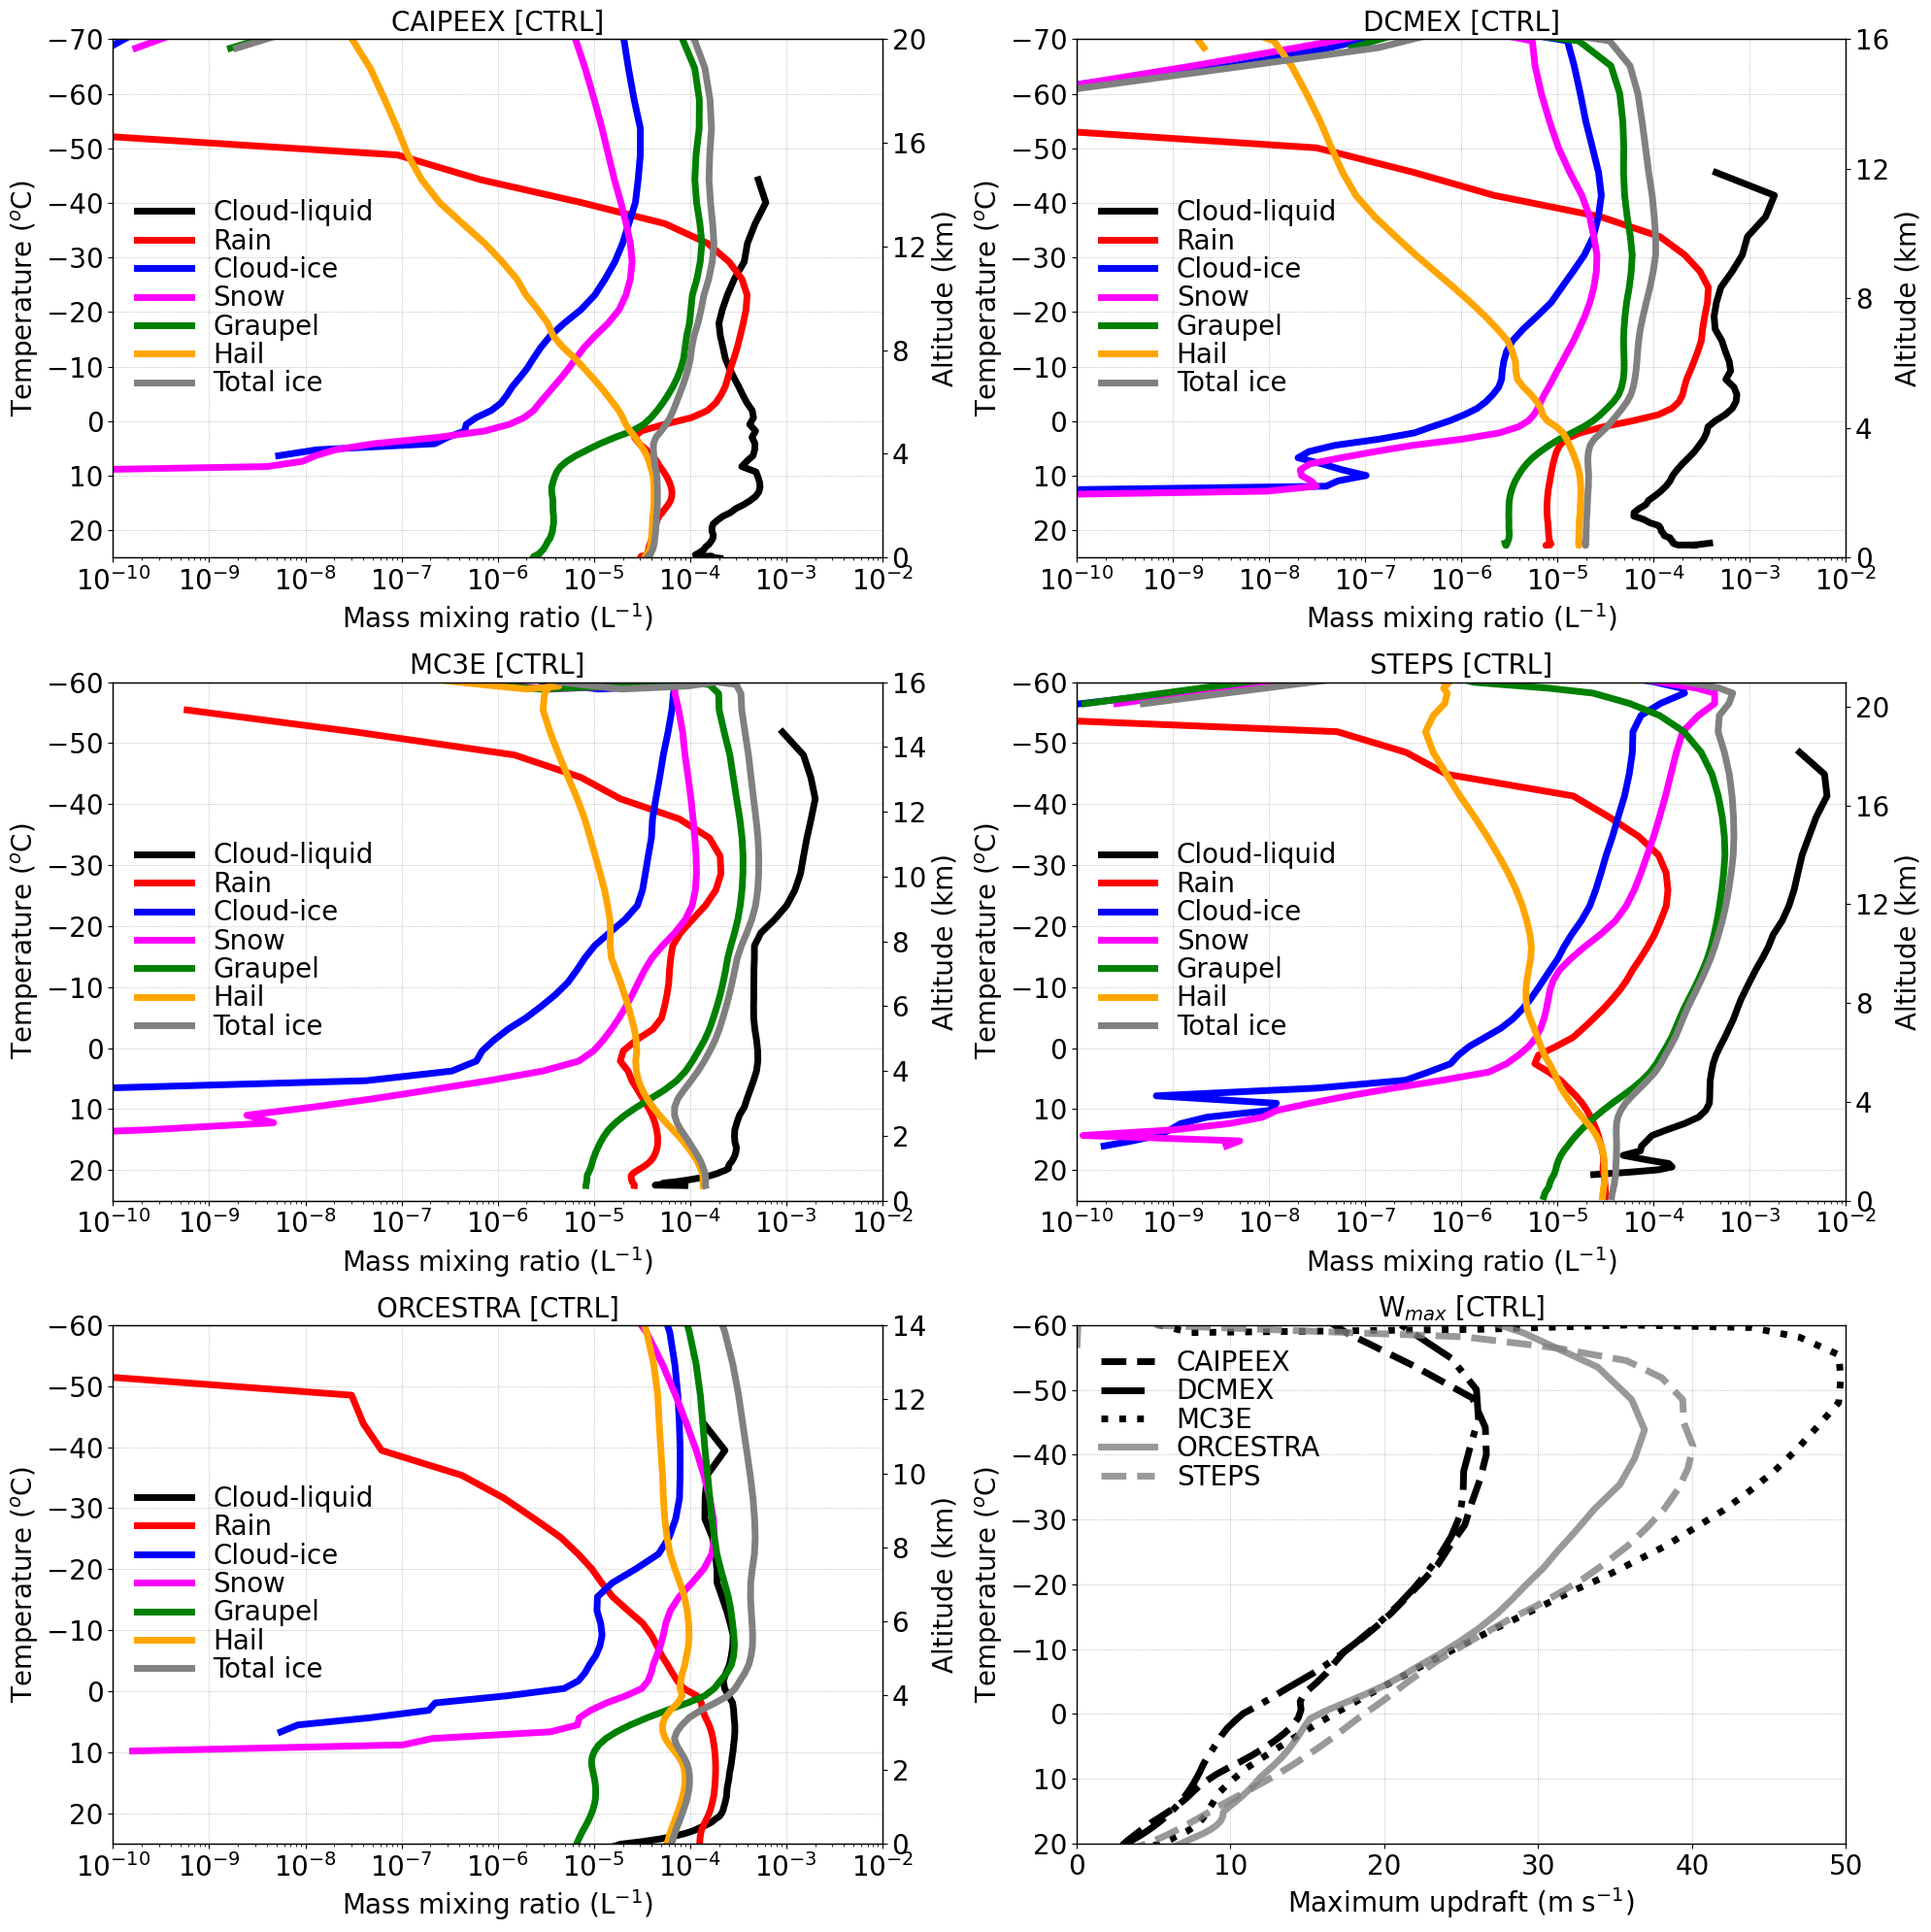

In [104]:


mean_tqi_4sip_caipeex = np.nansum([mean_qi_4sip_caipeex, mean_qs_4sip_caipeex, mean_qg_4sip_caipeex, mean_qh_4sip_caipeex], axis=0)

mean_tqi_4sip_dcmex = np.nansum([mean_qi_4sip_dcmex, mean_qs_4sip_dcmex, mean_qg_4sip_dcmex, mean_qh_4sip_dcmex], axis=0)
mean_tqi_4sip_mc3e = np.nansum([mean_qi_4sip_mc3e, mean_qs_4sip_mc3e, mean_qg_4sip_mc3e, mean_qh_4sip_mc3e], axis=0)
mean_tqi_4sip_orcestra = np.nansum([mean_qi_4sip_orcestra, mean_qs_4sip_orcestra, mean_qg_4sip_orcestra, mean_qh_4sip_orcestra], axis=0)
mean_tqi_4sip_steps = np.nansum([mean_qi_4sip_steps, mean_qs_4sip_steps, mean_qg_4sip_steps, mean_qh_4sip_steps], axis=0)

fontsize=20;
lnwdth=5;
alpha=0.6;

plt.figure(figsize=(20, 20))#8, 8))
plt.style.use('default')

fact = 1.

plt.subplot(3,2,1)

plt1=plt.gca()
plt2=plt1.twinx()
plt1.axvline(x=0, color='grey', linestyle='-', linewidth=2, alpha=0.6)
plt1.plot(mean_qc_4sip_caipeex*fact, mean_tempc_4sip_caipeex, '-', color='black', linewidth=lnwdth, label='Cloud-liquid')
plt1.plot(mean_qr_4sip_caipeex*fact, mean_tempc_4sip_caipeex, '-', color='red', linewidth=lnwdth, label='Rain')
plt1.plot(mean_qi_4sip_caipeex*fact, mean_tempc_4sip_caipeex, '-', color='blue', linewidth=lnwdth, label='Cloud-ice')
plt1.plot(mean_qs_4sip_caipeex*fact, mean_tempc_4sip_caipeex, '-', color='magenta', linewidth=lnwdth, label='Snow')
plt1.plot(mean_qg_4sip_caipeex*fact, mean_tempc_4sip_caipeex, '-', color='green', linewidth=lnwdth, label='Graupel')
plt1.plot(mean_qh_4sip_caipeex*fact, mean_tempc_4sip_caipeex, '-', color='orange', linewidth=lnwdth, label='Hail')
plt1.plot(mean_tqi_4sip_caipeex*fact, mean_tempc_4sip_caipeex, '-', color='grey', linewidth=lnwdth, label='Total ice')

plt2.plot(mean_qc_4sip_caipeex*fact, mean_ht_4sip_caipeex, '-', color='none', linewidth=lnwdth)#, label='No SB')
#plt2.plot(mean_qc_4sip_dcmex*fact, mean_ht_4sip_dcmex, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_qc_4sip_mc3e*fact, mean_ht_4sip_mc3e, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_qc_4sip_orcestra*fact, mean_ht_4sip_orcestra, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_qc_4sip_steps*fact, mean_ht_4sip_steps, '-', color='none', linewidth=lnwdth)

plt1.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)
#plt2.grid(True, linestyle='-', linewidth=0., color='grey', alpha=0.8)

plt1.set_xscale('log')
plt1.set_xlim(1.e-10, 1.e-2)
plt1.set_ylim(25, -70)
plt2.set_ylim(0.5, 20)

#plt1.set_xticks([1.e-4, 1.e-2, 1.e0, 1.e2, 1.e4, 1.e6])
plt1.set_yticks([20, 10, 0, -10, -20, -30, -40, -50, -60, -70])
plt2.set_yticks([0, 4, 8, 12, 16, 20])

plt1.tick_params(axis='x', labelsize=fontsize)
plt1.tick_params(axis='y', labelsize=fontsize)
plt2.tick_params(axis='y', labelsize=fontsize)

plt1.set_xlabel('Mass mixing ratio (L$^{-1}$)', fontsize=fontsize)
plt1.set_ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
plt2.set_ylabel('Altitude (km)', fontsize=fontsize)

plt1.tick_params(axis='x', labelsize=fontsize)
plt1.tick_params(axis='y', labelsize=fontsize)
plt2.tick_params(axis='y', labelsize=fontsize)

plt1.legend()
plt1.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='best')

plt.title('CAIPEEX [CTRL]', fontsize=fontsize)#, fontweight='bold')

for spine in ['top', 'bottom', 'left', 'right']:
    plt.gca().spines[spine].set_visible(True)
    plt.gca().spines[spine].set_linewidth(1)
    plt.gca().spines[spine].set_color('black')


plt.subplot(3,2,2)

plt1=plt.gca()
plt2=plt1.twinx()
plt1.axvline(x=0, color='grey', linestyle='-', linewidth=2, alpha=0.6)
plt1.plot(mean_qc_4sip_dcmex*fact, mean_tempc_4sip_dcmex, '-', color='black', linewidth=lnwdth, label='Cloud-liquid')
plt1.plot(mean_qr_4sip_dcmex*fact, mean_tempc_4sip_dcmex, '-', color='red', linewidth=lnwdth, label='Rain')
plt1.plot(mean_qi_4sip_dcmex*fact, mean_tempc_4sip_dcmex, '-', color='blue', linewidth=lnwdth, label='Cloud-ice')
plt1.plot(mean_qs_4sip_dcmex*fact, mean_tempc_4sip_dcmex, '-', color='magenta', linewidth=lnwdth, label='Snow')
plt1.plot(mean_qg_4sip_dcmex*fact, mean_tempc_4sip_dcmex, '-', color='green', linewidth=lnwdth, label='Graupel')
plt1.plot(mean_qh_4sip_dcmex*fact, mean_tempc_4sip_dcmex, '-', color='orange', linewidth=lnwdth, label='Hail')
plt1.plot(mean_tqi_4sip_dcmex*fact, mean_tempc_4sip_dcmex, '-', color='grey', linewidth=lnwdth, label='Total ice')

plt2.plot(mean_qc_4sip_dcmex*fact, mean_ht_4sip_dcmex, '-', color='none', linewidth=lnwdth)#, label='No SB')
#plt2.plot(mean_qc_4sip_dcmex*fact, mean_ht_4sip_dcmex, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_qc_4sip_mc3e*fact, mean_ht_4sip_mc3e, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_qc_4sip_orcestra*fact, mean_ht_4sip_orcestra, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_qc_4sip_steps*fact, mean_ht_4sip_steps, '-', color='none', linewidth=lnwdth)

plt1.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)
#plt2.grid(True, linestyle='-', linewidth=0., color='grey', alpha=0.8)

plt1.set_xscale('log')
plt1.set_xlim(1.e-10, 1.e-2)
plt1.set_ylim(25, -70)
plt2.set_ylim(1.7, 16)

#plt1.set_xticks([1.e-4, 1.e-2, 1.e0, 1.e2, 1.e4, 1.e6])
plt1.set_yticks([20, 10, 0, -10, -20, -30, -40, -50, -60, -70])
plt2.set_yticks([0, 4, 8, 12, 16])

plt1.tick_params(axis='x', labelsize=fontsize)
plt1.tick_params(axis='y', labelsize=fontsize)
plt2.tick_params(axis='y', labelsize=fontsize)

plt1.set_xlabel('Mass mixing ratio (L$^{-1}$)', fontsize=fontsize)
plt1.set_ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
plt2.set_ylabel('Altitude (km)', fontsize=fontsize)

plt1.tick_params(axis='x', labelsize=fontsize)
plt1.tick_params(axis='y', labelsize=fontsize)
plt2.tick_params(axis='y', labelsize=fontsize)

plt1.legend()
plt1.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='best')

plt.title('DCMEX [CTRL]', fontsize=fontsize)#, fontweight='bold')

for spine in ['top', 'bottom', 'left', 'right']:
    plt.gca().spines[spine].set_visible(True)
    plt.gca().spines[spine].set_linewidth(1)
    plt.gca().spines[spine].set_color('black')

plt.subplot(3,2,3)

plt1=plt.gca()
plt2=plt1.twinx()
plt1.axvline(x=0, color='grey', linestyle='-', linewidth=2, alpha=0.6)
plt1.plot(mean_qc_4sip_mc3e*fact, mean_tempc_4sip_mc3e, '-', color='black', linewidth=lnwdth, label='Cloud-liquid')
plt1.plot(mean_qr_4sip_mc3e*fact, mean_tempc_4sip_mc3e, '-', color='red', linewidth=lnwdth, label='Rain')
plt1.plot(mean_qi_4sip_mc3e*fact, mean_tempc_4sip_mc3e, '-', color='blue', linewidth=lnwdth, label='Cloud-ice')
plt1.plot(mean_qs_4sip_mc3e*fact, mean_tempc_4sip_mc3e, '-', color='magenta', linewidth=lnwdth, label='Snow')
plt1.plot(mean_qg_4sip_mc3e*fact, mean_tempc_4sip_mc3e, '-', color='green', linewidth=lnwdth, label='Graupel')
plt1.plot(mean_qh_4sip_mc3e*fact, mean_tempc_4sip_mc3e, '-', color='orange', linewidth=lnwdth, label='Hail')
plt1.plot(mean_tqi_4sip_mc3e*fact, mean_tempc_4sip_mc3e, '-', color='grey', linewidth=lnwdth, label='Total ice')

plt2.plot(mean_qc_4sip_mc3e*fact, mean_ht_4sip_mc3e, '-', color='none', linewidth=lnwdth)#, label='No SB')
#plt2.plot(mean_qc_4sip_mc3e*fact, mean_ht_4sip_dcmex, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_qc_4sip_mc3e*fact, mean_ht_4sip_mc3e, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_qc_4sip_mc3e*fact, mean_ht_4sip_orcestra, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_qc_4sip_mc3e*fact, mean_ht_4sip_steps, '-', color='none', linewidth=lnwdth)

plt1.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)
#plt2.grid(True, linestyle='-', linewidth=0., color='grey', alpha=0.8)

plt1.set_xscale('log')
plt1.set_xlim(1.e-10, 1.e-2)
plt1.set_ylim(25, -60)
plt2.set_ylim(0.3, 16)

#plt1.set_xticks([-4, 0, 4, 8, 12, 16, 20])
plt1.set_yticks([20, 10, 0, -10, -20, -30, -40, -50, -60])
plt2.set_yticks([0, 2, 4, 6, 8, 10, 12, 14, 16])

plt1.tick_params(axis='x', labelsize=fontsize)
plt1.tick_params(axis='y', labelsize=fontsize)
plt2.tick_params(axis='y', labelsize=fontsize)

plt1.set_xlabel('Mass mixing ratio (L$^{-1}$)', fontsize=fontsize)
plt1.set_ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
plt2.set_ylabel('Altitude (km)', fontsize=fontsize)

plt1.tick_params(axis='x', labelsize=fontsize)
plt1.tick_params(axis='y', labelsize=fontsize)
plt2.tick_params(axis='y', labelsize=fontsize)

plt1.legend()
plt1.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='best')

plt.title('MC3E [CTRL]', fontsize=fontsize)#, fontweight='bold')

for spine in ['top', 'bottom', 'left', 'right']:
    plt.gca().spines[spine].set_visible(True)
    plt.gca().spines[spine].set_linewidth(1)
    plt.gca().spines[spine].set_color('black')



plt.subplot(3,2,4)

plt1=plt.gca()
plt2=plt1.twinx()
plt1.axvline(x=0, color='grey', linestyle='-', linewidth=2, alpha=0.6)
plt1.plot(mean_qc_4sip_steps*fact, mean_tempc_4sip_steps, '-', color='black', linewidth=lnwdth, label='Cloud-liquid')
plt1.plot(mean_qr_4sip_steps*fact, mean_tempc_4sip_steps, '-', color='red', linewidth=lnwdth, label='Rain')
plt1.plot(mean_qi_4sip_steps*fact, mean_tempc_4sip_steps, '-', color='blue', linewidth=lnwdth, label='Cloud-ice')
plt1.plot(mean_qs_4sip_steps*fact, mean_tempc_4sip_steps, '-', color='magenta', linewidth=lnwdth, label='Snow')
plt1.plot(mean_qg_4sip_steps*fact, mean_tempc_4sip_steps, '-', color='green', linewidth=lnwdth, label='Graupel')
plt1.plot(mean_qh_4sip_steps*fact, mean_tempc_4sip_steps, '-', color='orange', linewidth=lnwdth, label='Hail')
plt1.plot(mean_tqi_4sip_steps*fact, mean_tempc_4sip_steps, '-', color='grey', linewidth=lnwdth, label='Total ice')

plt2.plot(mean_qc_4sip_orcestra*fact, mean_ht_4sip_orcestra, '-', color='none', linewidth=lnwdth)#, label='No SB')
#plt2.plot(mean_qc_4sip_mc3e*fact, mean_ht_4sip_dcmex, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_qc_4sip_mc3e*fact, mean_ht_4sip_mc3e, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_qc_4sip_mc3e*fact, mean_ht_4sip_orcestra, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_qc_4sip_mc3e*fact, mean_ht_4sip_steps, '-', color='none', linewidth=lnwdth)

plt1.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)
#plt2.grid(True, linestyle='-', linewidth=0., color='grey', alpha=0.8)

plt1.set_xscale('log')
plt1.set_xlim(1.e-10, 1.e-2)
plt1.set_ylim(25, -60)
plt2.set_ylim(1.13, 21)

#plt1.set_xticks([-4, 0, 4, 8, 12, 16, 20])
plt1.set_yticks([20, 10, 0, -10, -20, -30, -40, -50, -60])
plt2.set_yticks([0, 4, 8, 12, 16, 20])

plt1.tick_params(axis='x', labelsize=fontsize)
plt1.tick_params(axis='y', labelsize=fontsize)
plt2.tick_params(axis='y', labelsize=fontsize)

plt1.set_xlabel('Mass mixing ratio (L$^{-1}$)', fontsize=fontsize)
plt1.set_ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
plt2.set_ylabel('Altitude (km)', fontsize=fontsize)

plt1.tick_params(axis='x', labelsize=fontsize)
plt1.tick_params(axis='y', labelsize=fontsize)
plt2.tick_params(axis='y', labelsize=fontsize)

plt1.legend()
plt1.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='best')

plt.title('STEPS [CTRL]', fontsize=fontsize)#, fontweight='bold')

for spine in ['top', 'bottom', 'left', 'right']:
    plt.gca().spines[spine].set_visible(True)
    plt.gca().spines[spine].set_linewidth(1)
    plt.gca().spines[spine].set_color('black')


plt.subplot(3,2,5)


plt1=plt.gca()
plt2=plt1.twinx()
plt1.axvline(x=0, color='grey', linestyle='-', linewidth=2, alpha=0.6)
plt1.plot(mean_qc_4sip_orcestra*fact, mean_tempc_4sip_orcestra, '-', color='black', linewidth=lnwdth, label='Cloud-liquid')
plt1.plot(mean_qr_4sip_orcestra*fact, mean_tempc_4sip_orcestra, '-', color='red', linewidth=lnwdth, label='Rain')
plt1.plot(mean_qi_4sip_orcestra*fact, mean_tempc_4sip_orcestra, '-', color='blue', linewidth=lnwdth, label='Cloud-ice')
plt1.plot(mean_qs_4sip_orcestra*fact, mean_tempc_4sip_orcestra, '-', color='magenta', linewidth=lnwdth, label='Snow')
plt1.plot(mean_qg_4sip_orcestra*fact, mean_tempc_4sip_orcestra, '-', color='green', linewidth=lnwdth, label='Graupel')
plt1.plot(mean_qh_4sip_orcestra*fact, mean_tempc_4sip_orcestra, '-', color='orange', linewidth=lnwdth, label='Hail')
plt1.plot(mean_tqi_4sip_orcestra*fact, mean_tempc_4sip_orcestra, '-', color='grey', linewidth=lnwdth, label='Total ice')

plt2.plot(mean_qc_4sip_orcestra*fact, mean_ht_4sip_orcestra, '-', color='none', linewidth=lnwdth)#, label='No SB')
#plt2.plot(mean_qc_4sip_mc3e*fact, mean_ht_4sip_dcmex, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_qc_4sip_mc3e*fact, mean_ht_4sip_mc3e, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_qc_4sip_mc3e*fact, mean_ht_4sip_orcestra, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_qc_4sip_mc3e*fact, mean_ht_4sip_steps, '-', color='none', linewidth=lnwdth)

plt1.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)
#plt2.grid(True, linestyle='-', linewidth=0., color='grey', alpha=0.8)

plt1.set_xscale('log')
plt1.set_xlim(1.e-10, 1.e-2)
plt1.set_ylim(25, -60)
plt2.set_ylim(0., 14)

#plt1.set_xticks([-4, 0, 4, 8, 12, 16, 20])
plt1.set_yticks([20, 10, 0, -10, -20, -30, -40, -50, -60])
plt2.set_yticks([0, 2, 4, 6, 8, 10, 12, 14])

plt1.tick_params(axis='x', labelsize=fontsize)
plt1.tick_params(axis='y', labelsize=fontsize)
plt2.tick_params(axis='y', labelsize=fontsize)

plt1.set_xlabel('Mass mixing ratio (L$^{-1}$)', fontsize=fontsize)
plt1.set_ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
plt2.set_ylabel('Altitude (km)', fontsize=fontsize)

plt1.tick_params(axis='x', labelsize=fontsize)
plt1.tick_params(axis='y', labelsize=fontsize)
plt2.tick_params(axis='y', labelsize=fontsize)

plt1.legend()
plt1.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='best')

plt.title('ORCESTRA [CTRL]', fontsize=fontsize)#, fontweight='bold')

for spine in ['top', 'bottom', 'left', 'right']:
    plt.gca().spines[spine].set_visible(True)
    plt.gca().spines[spine].set_linewidth(1)
    plt.gca().spines[spine].set_color('black')


plt.subplot(3,2,6)

plt.plot(mean_w_caipeex[:-1]*fact, mean_tempc_4sip_caipeex, '--', color='k', linewidth=lnwdth, label='CAIPEEX')
plt.plot(mean_w_dcmex[:-1]*fact, mean_tempc_4sip_dcmex, '-.', color='k', linewidth=lnwdth, label='DCMEX')
plt.plot(mean_w_mc3e[:-1]*fact, mean_tempc_4sip_mc3e, ':', color='k', linewidth=lnwdth, label='MC3E')
plt.plot(mean_w_orcestra[:-1]*fact, mean_tempc_4sip_orcestra, '-', color='grey', alpha=0.8, linewidth=lnwdth, label='ORCESTRA')
plt.plot(mean_w_steps[:-1]*fact, mean_tempc_4sip_steps, '--', color='grey', alpha=0.8, linewidth=lnwdth, label='STEPS')

#plt.plot(mean_w_caipeex[:-1]*fact, mean_tempc_4sip_caipeex, '-', color='black', linewidth=lnwdth, label='CAIPEEX')
#plt.plot(mean_w_dcmex[:-1]*fact, mean_tempc_4sip_dcmex, '-', color='green', linewidth=lnwdth, label='DCMEX')
#plt.plot(mean_w_mc3e[:-1]*fact, mean_tempc_4sip_mc3e, '-', color='red', linewidth=lnwdth, label='MC3E')
#plt.plot(mean_w_orcestra[:-1]*fact, mean_tempc_4sip_orcestra, '-', color='blue', linewidth=lnwdth, label='ORCESTRA')
#plt.plot(mean_w_steps[:-1]*fact, mean_tempc_4sip_steps, '-', color='magenta', linewidth=lnwdth, label='STEPS')

plt.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)


#plt.xscale('log')
plt.xlim(0, 50)
plt.ylim(20, -60)

#plt.xticks([1.e-4, 1.e-2, 1.e0, 1.e2, 1.e4, 1.e6])
plt.yticks([20, 10, 0, -10, -20, -30, -40, -50, -60])

plt.tick_params(axis='x', labelsize=fontsize)
plt.tick_params(axis='y', labelsize=fontsize)

plt.xlabel('Maximum updraft (m s$^{-1}$)', fontsize=fontsize)#, fontweight='bold')
plt.ylabel('Temperature ($^{o}$C)', fontsize=fontsize)#, fontweight='bold')

plt.tick_params(axis='x', labelsize=fontsize)
plt.tick_params(axis='y', labelsize=fontsize)


plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='best')

plt.title('W$_{max}$ [CTRL]', fontsize=fontsize)#, fontweight='bold')

for spine in ['top', 'bottom', 'left', 'right']:
    plt.gca().spines[spine].set_visible(True)
    plt.gca().spines[spine].set_linewidth(1)
    plt.gca().spines[spine].set_color('black')

plt.tight_layout()
plt.show()

In [60]:

fontsize=12;
lnwdth=3;
alpha=0.6;

def plot_qmass(ax, x_vars, y_temp, y_alt, title, xscale='log', xlim=(1e-8, 1e-2), ylim_temp=(25, -60), ylim_alt=(0, 20)):
    colors = ['black', 'red', 'blue', 'magenta', 'green', 'orange']
    labels = ['Cloud-liquid', 'Rain', 'Cloud-ice', 'Snow', 'Graupel', 'Hail']
    
    ax1 = ax
    ax2 = ax1.twinx()

    ax1.axvline(x=0, color='grey', linestyle='-', linewidth=2, alpha=0.6)
    
    for x, color, label in zip(x_vars, colors, labels):
        ax1.plot(x, y_temp, '-', color=color, linewidth=lnwdth, label=label)
    
    ax2.plot(x_vars[0], y_alt, '-', color='none', linewidth=lnwdth)

    ax1.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)

    ax1.set_xscale(xscale)
    ax1.set_xlim(1.e-9,1.e-2)#*xlim)
    ax1.set_ylim(*ylim_temp)
    ax2.set_ylim(*ylim_alt)

    ax1.set_yticks(list(range(20, -61, -10)))
    ax2.set_yticks(range(0, int(ylim_alt[1]) + 1, 4))

    ax1.tick_params(axis='x', labelsize=fontsize)
    ax1.tick_params(axis='y', labelsize=fontsize)
    ax2.tick_params(axis='y', labelsize=fontsize)

    ax1.set_xlabel('Mass mixing ratio (L$^{-1}$)', fontsize=fontsize)
    ax1.set_ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
    ax2.set_ylabel('Altitude (km)', fontsize=fontsize)

    ax1.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='best')
    ax1.set_title(title, fontsize=fontsize)

    for spine in ['top', 'bottom', 'left', 'right']:
        ax1.spines[spine].set_visible(True)
        ax1.spines[spine].set_linewidth(1)
        ax1.spines[spine].set_color('black')


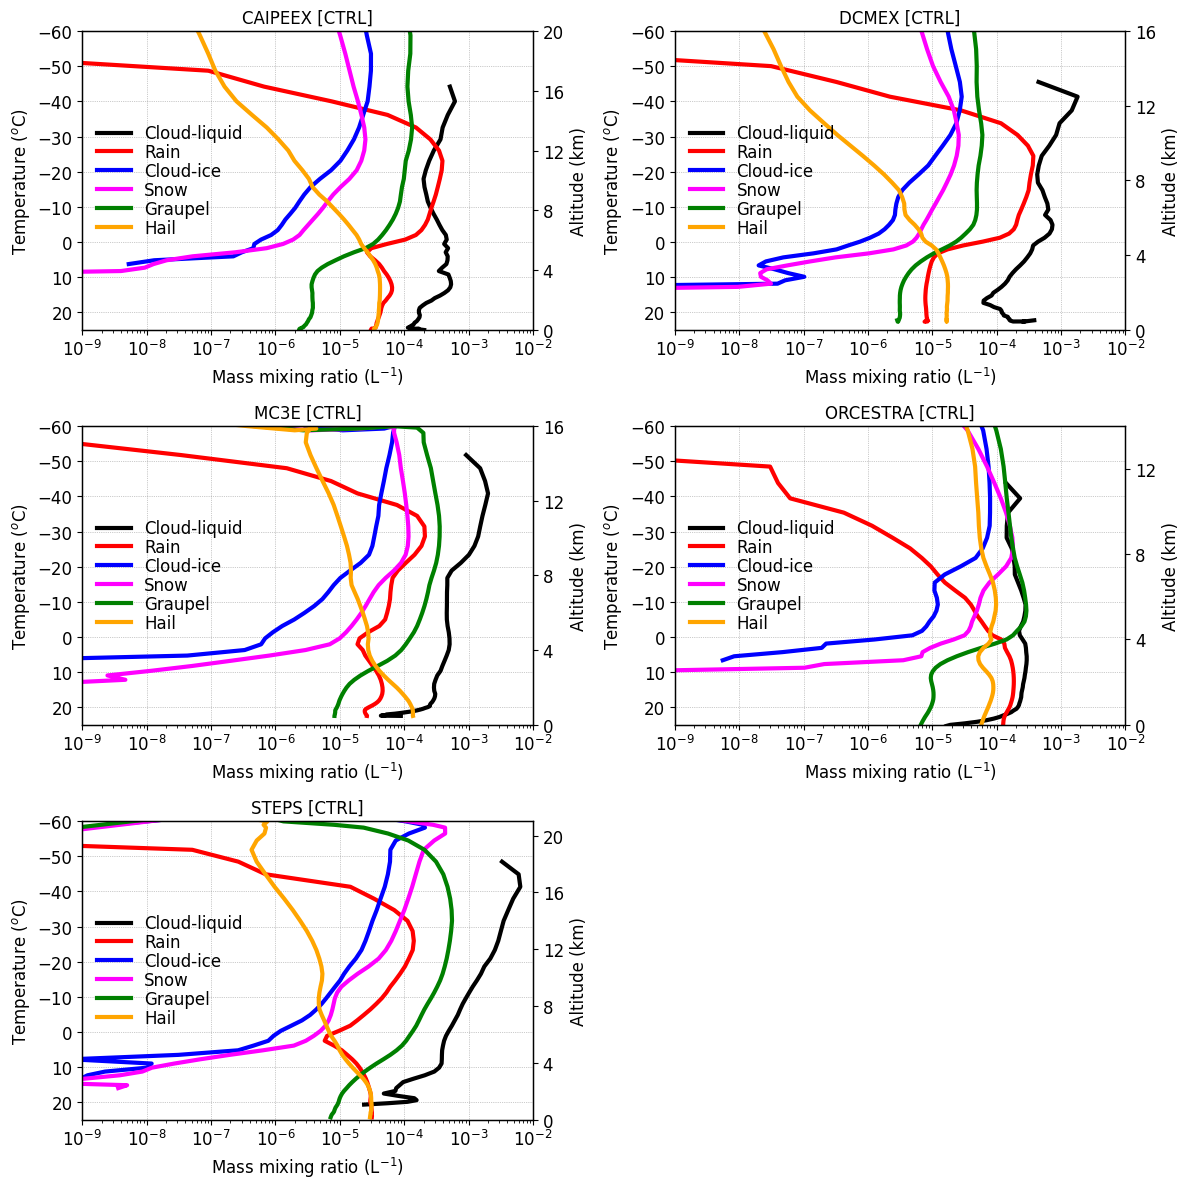

In [61]:
fig, axs = plt.subplots(3, 2, figsize=(12, 12))
axs = axs.flatten()

plot_qmass(axs[0],
             [mean_qc_4sip_caipeex, mean_qr_4sip_caipeex, mean_qi_4sip_caipeex,
              mean_qs_4sip_caipeex, mean_qg_4sip_caipeex, mean_qh_4sip_caipeex],
             mean_tempc_4sip_caipeex, mean_ht_4sip_caipeex,
             'CAIPEEX [CTRL]')

plot_qmass(axs[1],
             [mean_qc_4sip_dcmex, mean_qr_4sip_dcmex, mean_qi_4sip_dcmex,
              mean_qs_4sip_dcmex, mean_qg_4sip_dcmex, mean_qh_4sip_dcmex],
             mean_tempc_4sip_dcmex, mean_ht_4sip_dcmex,
             'DCMEX [CTRL]', ylim_alt=(1.7, 16))

plot_qmass(axs[2],
             [mean_qc_4sip_mc3e, mean_qr_4sip_mc3e, mean_qi_4sip_mc3e,
              mean_qs_4sip_mc3e, mean_qg_4sip_mc3e, mean_qh_4sip_mc3e],
             mean_tempc_4sip_mc3e, mean_ht_4sip_mc3e,
             'MC3E [CTRL]', ylim_alt=(0.3, 16))

plot_qmass(axs[3],
             [mean_qc_4sip_orcestra, mean_qr_4sip_orcestra, mean_qi_4sip_orcestra,
              mean_qs_4sip_orcestra, mean_qg_4sip_orcestra, mean_qh_4sip_orcestra],
             mean_tempc_4sip_orcestra, mean_ht_4sip_orcestra,
             'ORCESTRA [CTRL]', ylim_alt=(0, 14))

plot_qmass(axs[4],
             [mean_qc_4sip_steps, mean_qr_4sip_steps, mean_qi_4sip_steps,
              mean_qs_4sip_steps, mean_qg_4sip_steps, mean_qh_4sip_steps],
             mean_tempc_4sip_steps, mean_ht_4sip_steps,
             'STEPS [CTRL]', ylim_alt=(1.13, 21))

fig.delaxes(axs[5])
plt.tight_layout()
plt.show()


In [35]:

fontsize=12;
lnwdth=3;
alpha=0.6;

def plot_qmass1(ax, x_vars, y_temp, y_alt, title, xscale='log', xlim=(1e-8, 1e-2), ylim_temp=(25, -60), ylim_alt=(0, 20)):
    colors = ['black', 'red', 'blue', 'magenta', 'green', 'orange', 'grey']
    labels = ['Cloud-liquid', 'Rain', 'Cloud-ice', 'Snow', 'Graupel', 'Hail', 'Total ice']
    
    ax1 = ax
    ax2 = ax1.twinx()

    ax1.axvline(x=0, color='grey', linestyle='-', linewidth=2, alpha=0.6)
    
    for x, color, label in zip(x_vars, colors, labels):
        ax1.plot(x, y_temp, '-', color=color, linewidth=lnwdth, label=label)
    
    ax2.plot(x_vars[0], y_alt, '-', color='none', linewidth=lnwdth)

    ax1.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)

    ax1.set_xscale(xscale)
    ax1.set_xlim(1.e-9,1.e-2)#*xlim)
    ax1.set_ylim(*ylim_temp)
    ax2.set_ylim(*ylim_alt)

    ax1.set_yticks(list(range(20, -61, -10)))
    ax2.set_yticks(range(0, int(ylim_alt[1]) + 1, 4))

    ax1.tick_params(axis='x', labelsize=fontsize)
    ax1.tick_params(axis='y', labelsize=fontsize)
    ax2.tick_params(axis='y', labelsize=fontsize)

    ax1.set_xlabel('Mass mixing ratio (L$^{-1}$)', fontsize=fontsize)
    ax1.set_ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
    ax2.set_ylabel('Altitude (km)', fontsize=fontsize)

    ax1.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='best')
    ax1.set_title(title, fontsize=fontsize)

    for spine in ['top', 'bottom', 'left', 'right']:
        ax1.spines[spine].set_visible(True)
        ax1.spines[spine].set_linewidth(1)
        ax1.spines[spine].set_color('black')


In [71]:
mean_tqi_4sip_caipeex = np.nansum([mean_qi_4sip_caipeex, mean_qs_4sip_caipeex, mean_qg_4sip_caipeex, mean_qh_4sip_caipeex], axis=0)

print(mean_tqi_4sip_caipeex)

[1.92582927e-09 1.95245100e-08 3.57680989e-07 4.68778444e-06
 3.89225752e-05 1.07662650e-04 1.43051540e-04 1.61601187e-04
 1.67178892e-04 1.60136275e-04 1.57624949e-04 1.63413628e-04
 1.71890308e-04 1.77426904e-04 1.70279178e-04 1.56456575e-04
 1.39511976e-04 1.30178611e-04 1.20941804e-04 1.09980159e-04
 1.04303748e-04 1.01044570e-04 9.57838638e-05 8.97335121e-05
 8.34794846e-05 7.73354914e-05 7.18448500e-05 6.69166620e-05
 6.18494669e-05 5.61537563e-05 5.01462346e-05 4.41740995e-05
 4.16906441e-05 4.15708419e-05 4.20839169e-05 4.26996739e-05
 4.33107416e-05 4.45748228e-05 4.53676112e-05 4.55703921e-05
 4.57543210e-05 4.58208888e-05 4.58464347e-05 4.58211034e-05
 4.57188471e-05 4.55572881e-05 4.53768007e-05 4.47442580e-05
 4.46520644e-05 4.45297046e-05 4.41129960e-05 4.39196956e-05
 4.35033944e-05 4.31304688e-05 4.27412997e-05 4.22067496e-05
 4.16264775e-05 4.08460692e-05 3.99003438e-05 3.90030691e-05
 3.80193451e-05 3.74034134e-05 3.65262240e-05 3.61801649e-05
 3.61764251e-05]


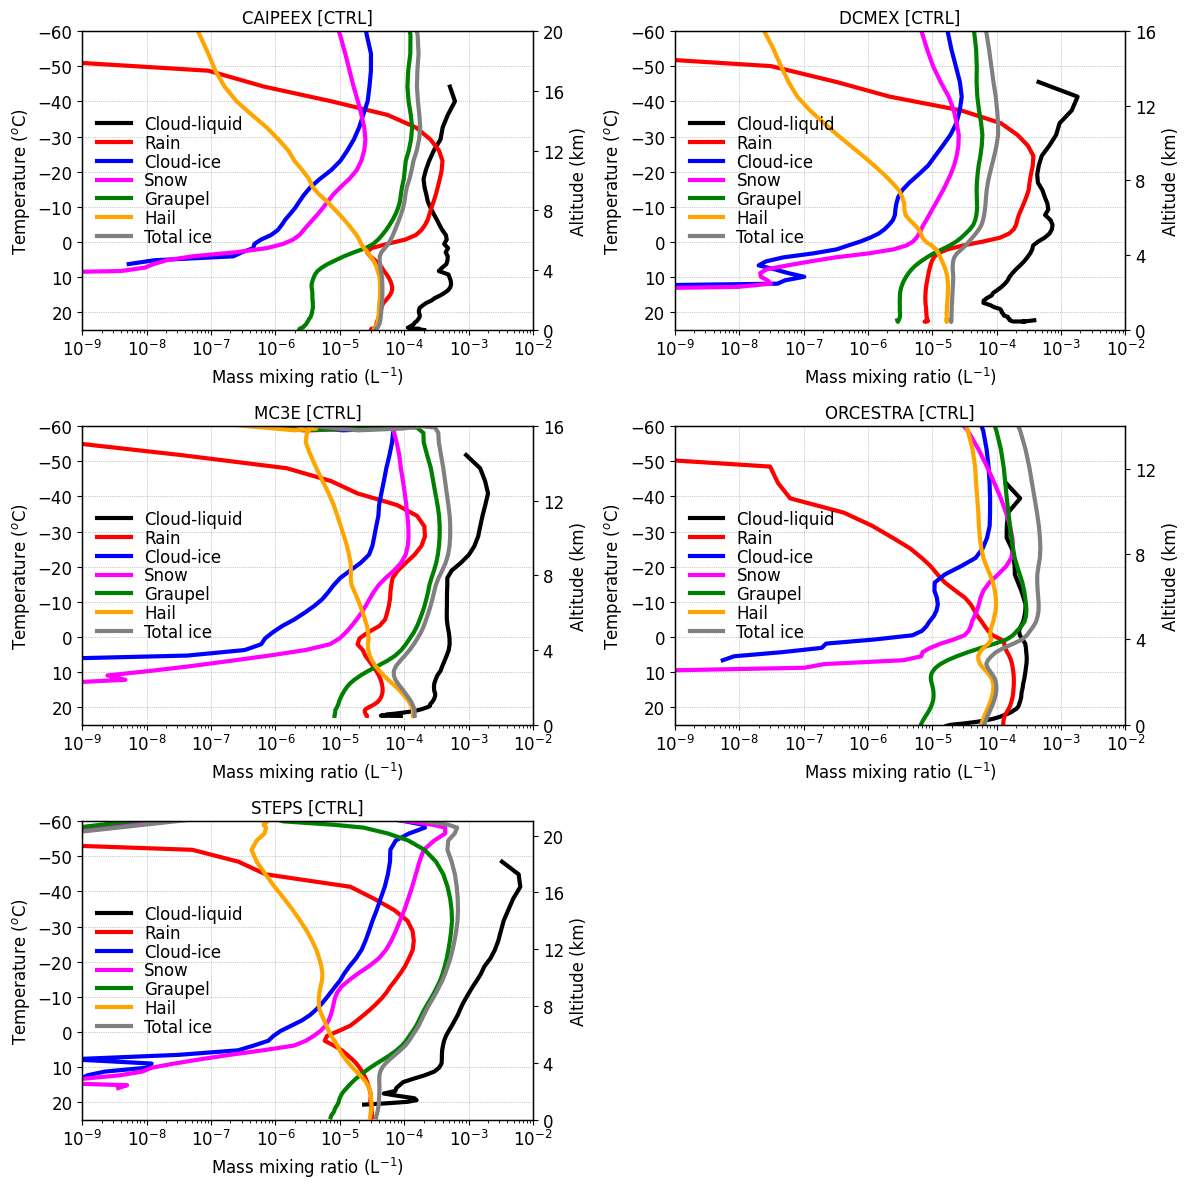

In [74]:

mean_tqi_4sip_caipeex = np.nansum([mean_qi_4sip_caipeex, mean_qs_4sip_caipeex, mean_qg_4sip_caipeex, mean_qh_4sip_caipeex], axis=0)

mean_tqi_4sip_dcmex = np.nansum([mean_qi_4sip_dcmex, mean_qs_4sip_dcmex, mean_qg_4sip_dcmex, mean_qh_4sip_dcmex], axis=0)
mean_tqi_4sip_mc3e = np.nansum([mean_qi_4sip_mc3e, mean_qs_4sip_mc3e, mean_qg_4sip_mc3e, mean_qh_4sip_mc3e], axis=0)
mean_tqi_4sip_orcestra = np.nansum([mean_qi_4sip_orcestra, mean_qs_4sip_orcestra, mean_qg_4sip_orcestra, mean_qh_4sip_orcestra], axis=0)
mean_tqi_4sip_steps = np.nansum([mean_qi_4sip_steps, mean_qs_4sip_steps, mean_qg_4sip_steps, mean_qh_4sip_steps], axis=0)


fig, axs = plt.subplots(3, 2, figsize=(12, 12))
axs = axs.flatten()

plot_qmass1(axs[0],
             [mean_qc_4sip_caipeex, mean_qr_4sip_caipeex, mean_qi_4sip_caipeex,
              mean_qs_4sip_caipeex, mean_qg_4sip_caipeex, mean_qh_4sip_caipeex, mean_tqi_4sip_caipeex],
             mean_tempc_4sip_caipeex, mean_ht_4sip_caipeex,
             'CAIPEEX [CTRL]')

plot_qmass1(axs[1],
             [mean_qc_4sip_dcmex, mean_qr_4sip_dcmex, mean_qi_4sip_dcmex,
              mean_qs_4sip_dcmex, mean_qg_4sip_dcmex, mean_qh_4sip_dcmex, mean_tqi_4sip_dcmex],
             mean_tempc_4sip_dcmex, mean_ht_4sip_dcmex,
             'DCMEX [CTRL]', ylim_alt=(1.7, 16))

plot_qmass1(axs[2],
             [mean_qc_4sip_mc3e, mean_qr_4sip_mc3e, mean_qi_4sip_mc3e,
              mean_qs_4sip_mc3e, mean_qg_4sip_mc3e, mean_qh_4sip_mc3e, mean_tqi_4sip_mc3e],
             mean_tempc_4sip_mc3e, mean_ht_4sip_mc3e,
             'MC3E [CTRL]', ylim_alt=(0.3, 16))

plot_qmass1(axs[3],
             [mean_qc_4sip_orcestra, mean_qr_4sip_orcestra, mean_qi_4sip_orcestra,
              mean_qs_4sip_orcestra, mean_qg_4sip_orcestra, mean_qh_4sip_orcestra, mean_tqi_4sip_orcestra],
             mean_tempc_4sip_orcestra, mean_ht_4sip_orcestra,
             'ORCESTRA [CTRL]', ylim_alt=(0, 14))

plot_qmass1(axs[4],
             [mean_qc_4sip_steps, mean_qr_4sip_steps, mean_qi_4sip_steps,
              mean_qs_4sip_steps, mean_qg_4sip_steps, mean_qh_4sip_steps, mean_tqi_4sip_steps],
             mean_tempc_4sip_steps, mean_ht_4sip_steps,
             'STEPS [CTRL]', ylim_alt=(1.13, 21))

fig.delaxes(axs[5])
plt.tight_layout()
plt.show()


IndexError: index 5 is out of bounds for axis 0 with size 4

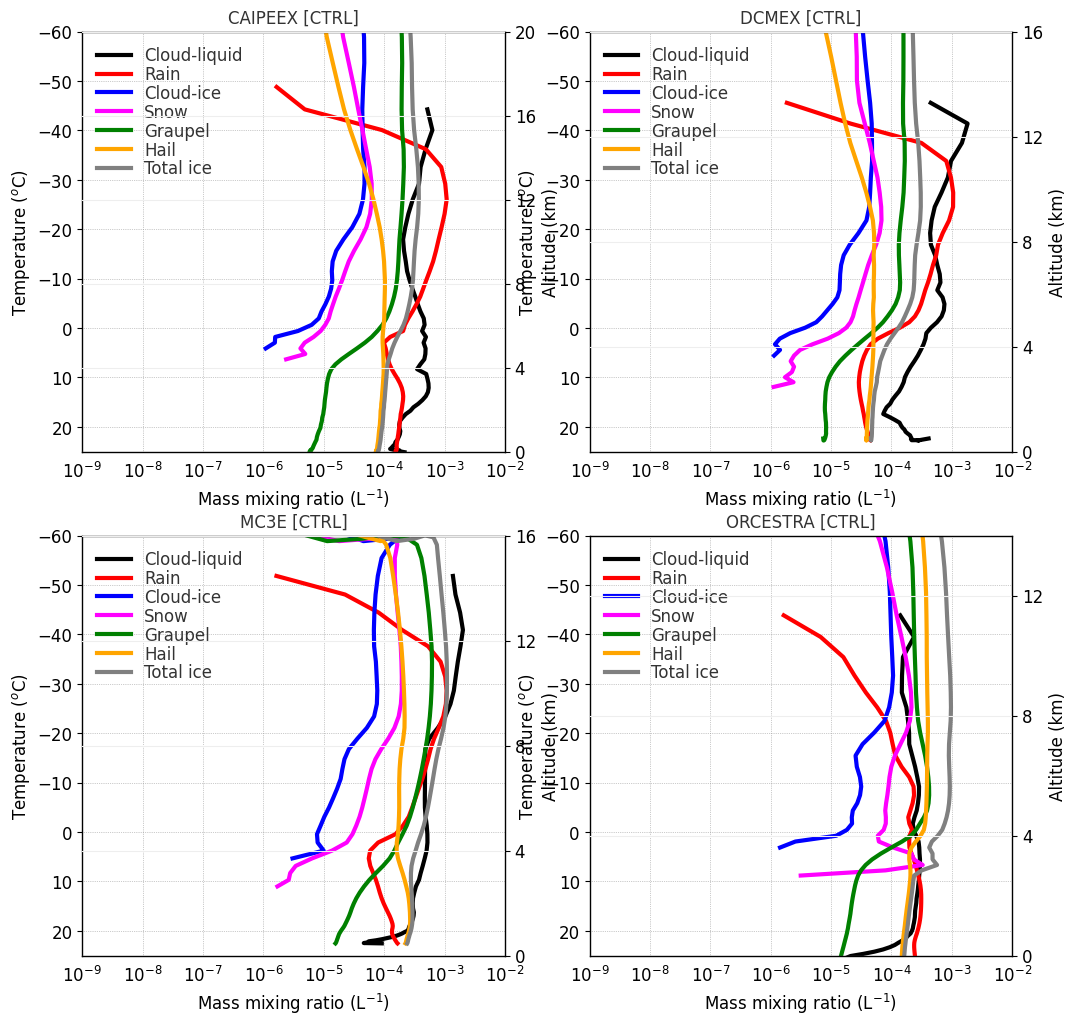

In [36]:


mean_tqi_4sip_caipeex = np.nansum([mean_qi_4sip_caipeex, mean_qs_4sip_caipeex, mean_qg_4sip_caipeex, mean_qh_4sip_caipeex], axis=0)

mean_tqi_4sip_dcmex = np.nansum([mean_qi_4sip_dcmex, mean_qs_4sip_dcmex, mean_qg_4sip_dcmex, mean_qh_4sip_dcmex], axis=0)
mean_tqi_4sip_mc3e = np.nansum([mean_qi_4sip_mc3e, mean_qs_4sip_mc3e, mean_qg_4sip_mc3e, mean_qh_4sip_mc3e], axis=0)
mean_tqi_4sip_orcestra = np.nansum([mean_qi_4sip_orcestra, mean_qs_4sip_orcestra, mean_qg_4sip_orcestra, mean_qh_4sip_orcestra], axis=0)
mean_tqi_4sip_steps = np.nansum([mean_qi_4sip_steps, mean_qs_4sip_steps, mean_qg_4sip_steps, mean_qh_4sip_steps], axis=0)


fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs = axs.flatten()

plot_qmass1(axs[0],
             [mean_qc_4sip_caipeex, mean_qr_4sip_caipeex, mean_qi_4sip_caipeex,
              mean_qs_4sip_caipeex, mean_qg_4sip_caipeex, mean_qh_4sip_caipeex, mean_tqi_4sip_caipeex],
             mean_tempc_4sip_caipeex, mean_ht_4sip_caipeex,
             'CAIPEEX [CTRL]')

plot_qmass1(axs[1],
             [mean_qc_4sip_dcmex, mean_qr_4sip_dcmex, mean_qi_4sip_dcmex,
              mean_qs_4sip_dcmex, mean_qg_4sip_dcmex, mean_qh_4sip_dcmex, mean_tqi_4sip_dcmex],
             mean_tempc_4sip_dcmex, mean_ht_4sip_dcmex,
             'DCMEX [CTRL]', ylim_alt=(1.7, 16))

plot_qmass1(axs[2],
             [mean_qc_4sip_mc3e, mean_qr_4sip_mc3e, mean_qi_4sip_mc3e,
              mean_qs_4sip_mc3e, mean_qg_4sip_mc3e, mean_qh_4sip_mc3e, mean_tqi_4sip_mc3e],
             mean_tempc_4sip_mc3e, mean_ht_4sip_mc3e,
             'MC3E [CTRL]', ylim_alt=(0.3, 16))

plot_qmass1(axs[3],
             [mean_qc_4sip_orcestra, mean_qr_4sip_orcestra, mean_qi_4sip_orcestra,
              mean_qs_4sip_orcestra, mean_qg_4sip_orcestra, mean_qh_4sip_orcestra, mean_tqi_4sip_orcestra],
             mean_tempc_4sip_orcestra, mean_ht_4sip_orcestra,
             'ORCESTRA [CTRL]', ylim_alt=(0, 14))

#plot_qmass1(axs[4],
#             [mean_qc_4sip_steps, mean_qr_4sip_steps, mean_qi_4sip_steps,
#              mean_qs_4sip_steps, mean_qg_4sip_steps, mean_qh_4sip_steps, mean_tqi_4sip_steps],
#             mean_tempc_4sip_steps, mean_ht_4sip_steps,
#             'STEPS [CTRL]', ylim_alt=(1.13, 21))

fig.delaxes(axs[5])
plt.tight_layout()
plt.show()


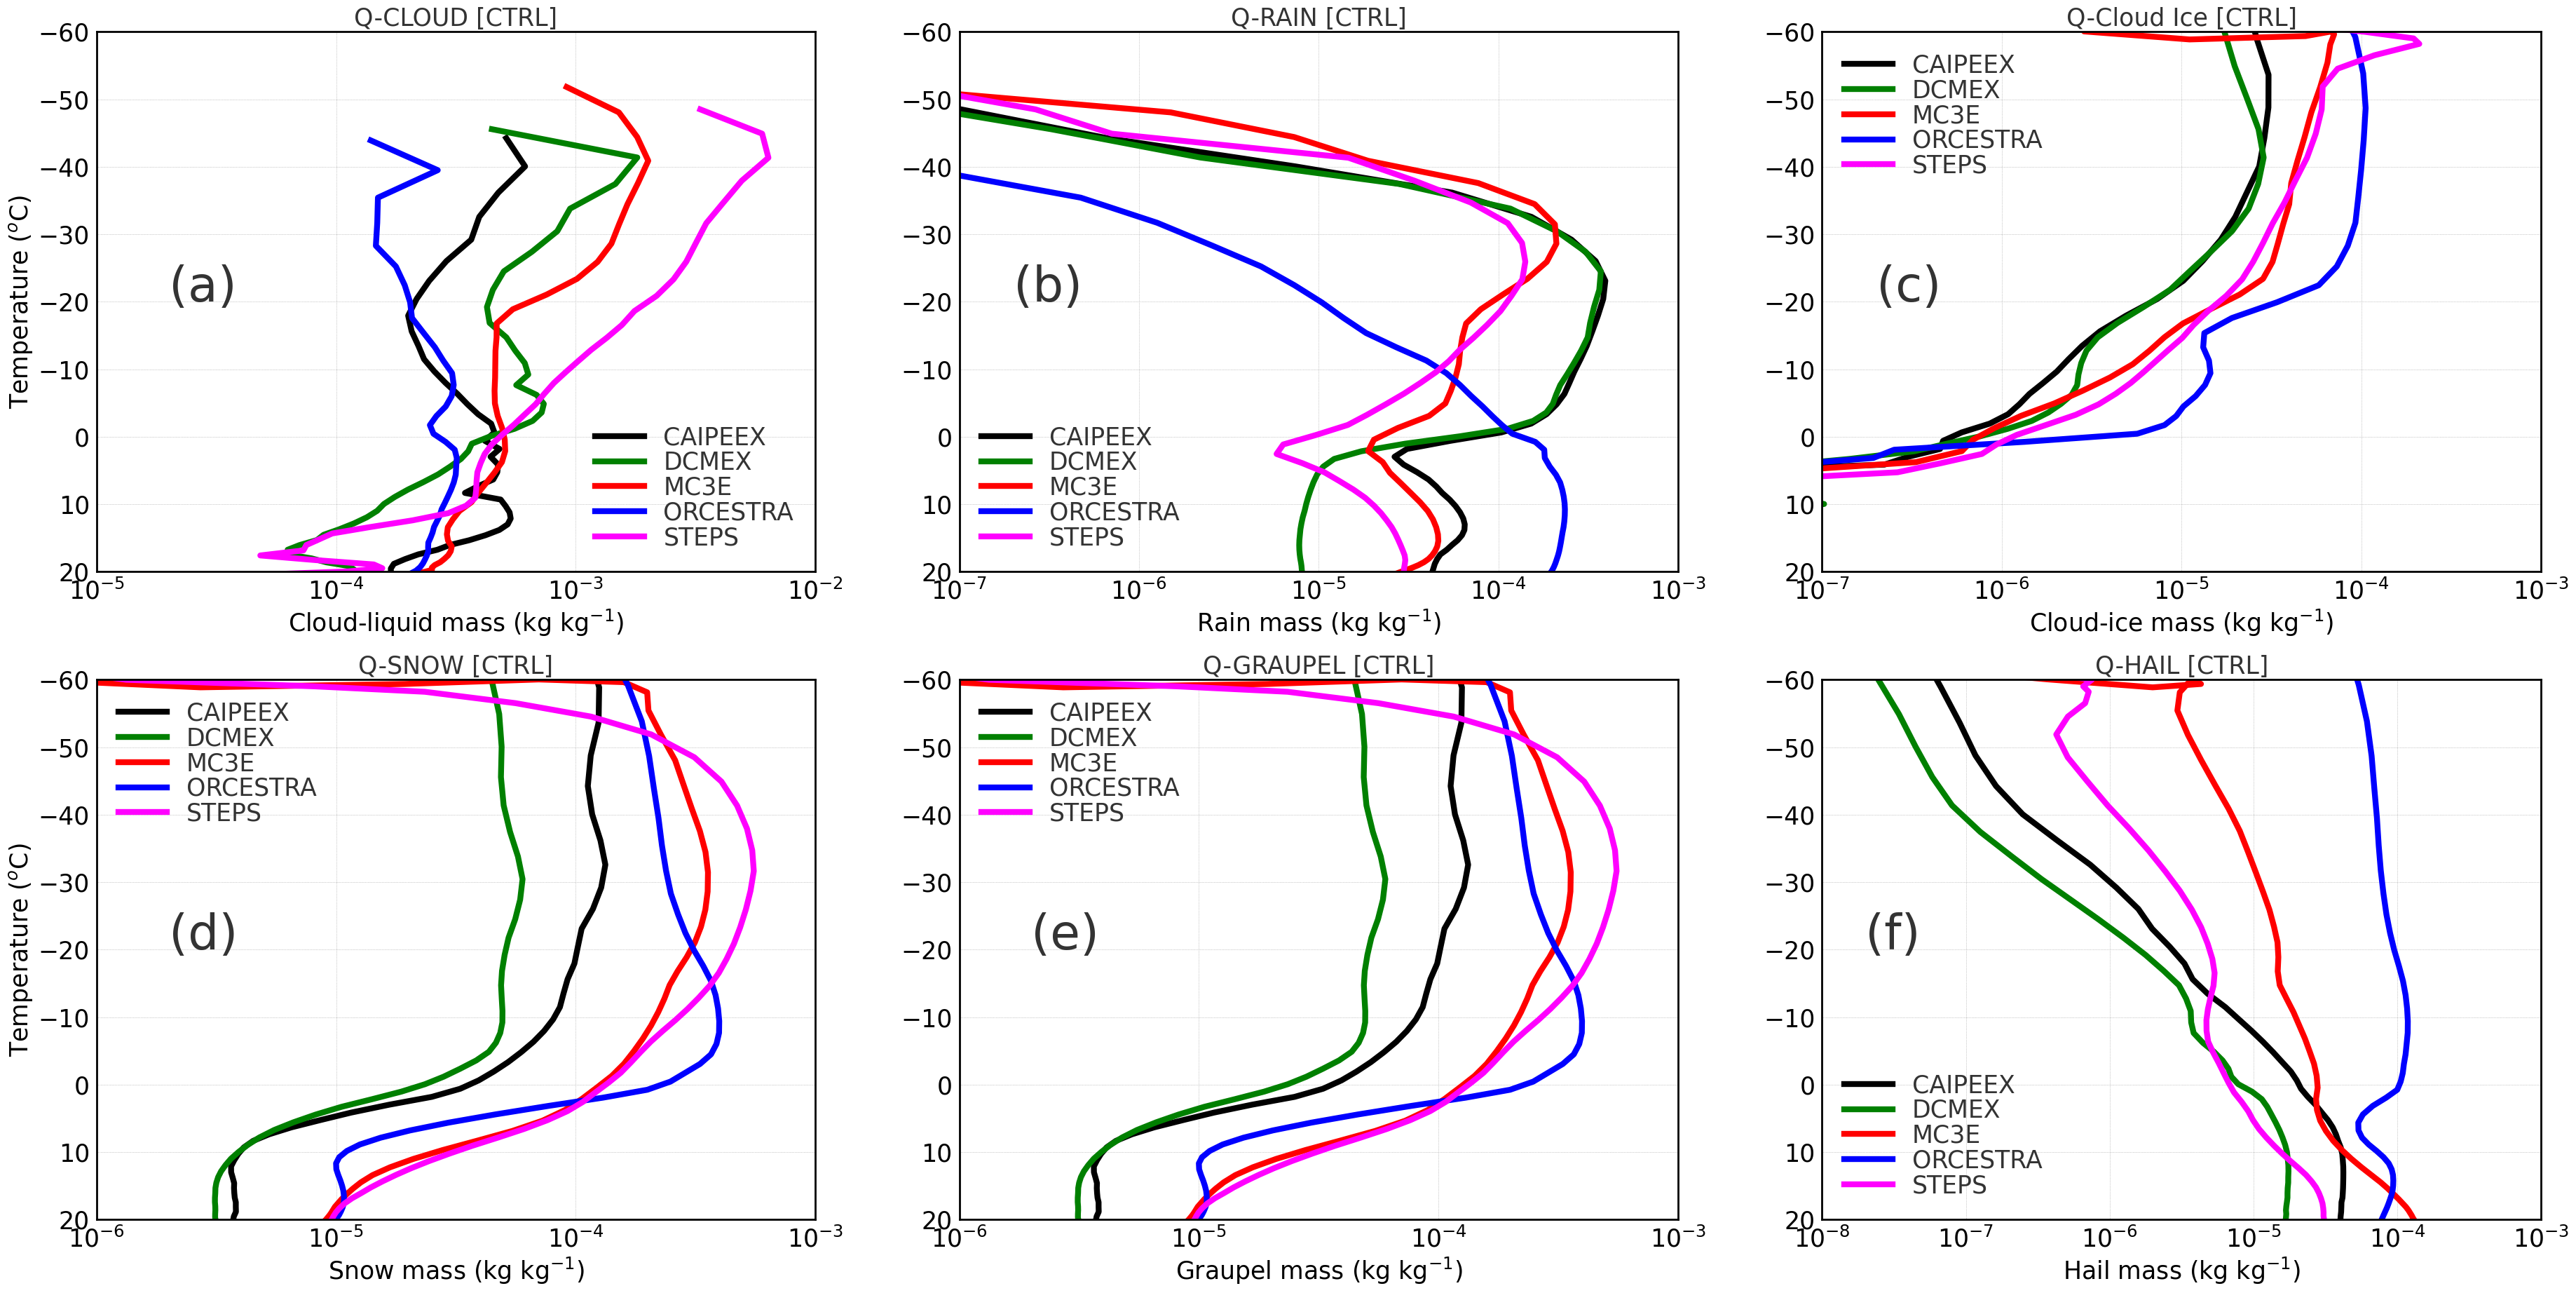

In [145]:
fontsize=25;
lnwdth=6;
alpha=0.6;

plt.figure(figsize=(45, 34))
plt.style.use('default')

fact = 1.

plt.subplot(3,3,1)

plt.axvline(x=0, color='grey', linestyle='-', linewidth=2, alpha=0.6)
plt.plot(mean_qc_4sip_caipeex*fact, mean_tempc_4sip_caipeex, '-', color='black', linewidth=lnwdth, label='CAIPEEX')
plt.plot(mean_qc_4sip_dcmex*fact, mean_tempc_4sip_dcmex, '-', color='green', linewidth=lnwdth, label='DCMEX')
plt.plot(mean_qc_4sip_mc3e*fact, mean_tempc_4sip_mc3e, '-', color='red', linewidth=lnwdth, label='MC3E')
plt.plot(mean_qc_4sip_orcestra*fact, mean_tempc_4sip_orcestra, '-', color='blue', linewidth=lnwdth, label='ORCESTRA')
plt.plot(mean_qc_4sip_steps*fact, mean_tempc_4sip_steps, '-', color='magenta', linewidth=lnwdth, label='STEPS')

plt.text(2.e-5,-20, '(a)', fontsize=fontsize+fontsize)

plt.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)

plt.xscale('log')
plt.xlim(1.e-5, 1.e-2)
plt.ylim(20, -60)

#plt.xticks([1.e-4, 1.e-2, 1.e0, 1.e2, 1.e4, 1.e6])
plt.yticks([20, 10, 0, -10, -20, -30, -40, -50, -60])

plt.tick_params(axis='x', labelsize=fontsize)
plt.tick_params(axis='y', labelsize=fontsize)

plt.xlabel('Cloud-liquid mass (kg kg$^{-1}$)', fontsize=fontsize)#, fontweight='bold')
plt.ylabel('Temperature ($^{o}$C)', fontsize=fontsize)#, fontweight='bold')

plt.tick_params(axis='x', labelsize=fontsize)
plt.tick_params(axis='y', labelsize=fontsize)


plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='best')

plt.title('Q-CLOUD [CTRL]', fontsize=fontsize)#, fontweight='bold')

for spine in ['top', 'bottom', 'left', 'right']:
    plt.gca().spines[spine].set_visible(True)
    plt.gca().spines[spine].set_linewidth(2)
    plt.gca().spines[spine].set_color('black')


plt.subplot(3,3,2)

plt.axvline(x=0, color='grey', linestyle='-', linewidth=2, alpha=0.6)
plt.plot(mean_qr_4sip_caipeex*fact, mean_tempc_4sip_caipeex, '-', color='black', linewidth=lnwdth, label='CAIPEEX')
plt.plot(mean_qr_4sip_dcmex*fact, mean_tempc_4sip_dcmex, '-', color='green', linewidth=lnwdth, label='DCMEX')
plt.plot(mean_qr_4sip_mc3e*fact, mean_tempc_4sip_mc3e, '-', color='red', linewidth=lnwdth, label='MC3E')
plt.plot(mean_qr_4sip_orcestra*fact, mean_tempc_4sip_orcestra, '-', color='blue', linewidth=lnwdth, label='ORCESTRA')
plt.plot(mean_qr_4sip_steps*fact, mean_tempc_4sip_steps, '-', color='magenta', linewidth=lnwdth, label='STEPS')

plt.text(2.e-7,-20, '(b)', fontsize=fontsize+fontsize)

plt.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)

plt.xscale('log')
plt.xlim(1.e-7, 1.e-3)
plt.ylim(20, -60)

#plt.xticks([1.e-4, 1.e-2, 1.e0, 1.e2, 1.e4, 1.e6])
plt.yticks([20, 10, 0, -10, -20, -30, -40, -50, -60])

plt.tick_params(axis='x', labelsize=fontsize)
plt.tick_params(axis='y', labelsize=fontsize)

plt.xlabel('Rain mass (kg kg$^{-1}$)', fontsize=fontsize)#, fontweight='bold')

plt.tick_params(axis='x', labelsize=fontsize)
plt.tick_params(axis='y', labelsize=fontsize)


plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='best')

plt.title('Q-RAIN [CTRL]', fontsize=fontsize)#, fontweight='bold')

for spine in ['top', 'bottom', 'left', 'right']:
    plt.gca().spines[spine].set_visible(True)
    plt.gca().spines[spine].set_linewidth(2)
    plt.gca().spines[spine].set_color('black')

plt.subplot(3,3,3)

plt.axvline(x=0, color='grey', linestyle='-', linewidth=2, alpha=0.6)
plt.plot(mean_qi_4sip_caipeex*fact, mean_tempc_4sip_caipeex, '-', color='black', linewidth=lnwdth, label='CAIPEEX')
plt.plot(mean_qi_4sip_dcmex*fact, mean_tempc_4sip_dcmex, '-', color='green', linewidth=lnwdth, label='DCMEX')
plt.plot(mean_qi_4sip_mc3e*fact, mean_tempc_4sip_mc3e, '-', color='red', linewidth=lnwdth, label='MC3E')
plt.plot(mean_qi_4sip_orcestra*fact, mean_tempc_4sip_orcestra, '-', color='blue', linewidth=lnwdth, label='ORCESTRA')
plt.plot(mean_qi_4sip_steps*fact, mean_tempc_4sip_steps, '-', color='magenta', linewidth=lnwdth, label='STEPS')

plt.text(2.e-7,-20, '(c)', fontsize=fontsize+fontsize)

plt.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)

plt.xscale('log')
plt.xlim(1.e-7, 1.e-3)
plt.ylim(20, -60)

#plt.xticks([1.e-4, 1.e-2, 1.e0, 1.e2, 1.e4, 1.e6])
plt.yticks([20, 10, 0, -10, -20, -30, -40, -50, -60])

plt.tick_params(axis='x', labelsize=fontsize)
plt.tick_params(axis='y', labelsize=fontsize)

plt.xlabel('Cloud-ice mass (kg kg$^{-1}$)', fontsize=fontsize)#, fontweight='bold')
#plt.ylabel('Temperature ($^{o}$C)', fontsize=fontsize, fontweight='bold')

plt.tick_params(axis='x', labelsize=fontsize)
plt.tick_params(axis='y', labelsize=fontsize)


plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize)#, loc='best')

plt.title('Q-Cloud Ice [CTRL]', fontsize=fontsize)#, fontweight='bold')

for spine in ['top', 'bottom', 'left', 'right']:
    plt.gca().spines[spine].set_visible(True)
    plt.gca().spines[spine].set_linewidth(2)
    plt.gca().spines[spine].set_color('black')



plt.subplot(3,3,4)

plt.axvline(x=0, color='grey', linestyle='-', linewidth=2, alpha=0.6)
plt.plot(mean_qg_4sip_caipeex*fact, mean_tempc_4sip_caipeex, '-', color='black', linewidth=lnwdth, label='CAIPEEX')
plt.plot(mean_qg_4sip_dcmex*fact, mean_tempc_4sip_dcmex, '-', color='green', linewidth=lnwdth, label='DCMEX')
plt.plot(mean_qg_4sip_mc3e*fact, mean_tempc_4sip_mc3e, '-', color='red', linewidth=lnwdth, label='MC3E')
plt.plot(mean_qg_4sip_orcestra*fact, mean_tempc_4sip_orcestra, '-', color='blue', linewidth=lnwdth, label='ORCESTRA')
plt.plot(mean_qg_4sip_steps*fact, mean_tempc_4sip_steps, '-', color='magenta', linewidth=lnwdth, label='STEPS')

plt.text(2.e-6,-20, '(d)', fontsize=fontsize+fontsize)

plt.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)

plt.xscale('log')
plt.xlim(1.e-6, 1.e-3)
plt.ylim(20, -60)

#plt.set_xticks([1.e-4, 1.e-2, 1.e0, 1.e2, 1.e4, 1.e6])
plt.yticks([20, 10, 0, -10, -20, -30, -40, -50, -60])

plt.tick_params(axis='x', labelsize=fontsize)
plt.tick_params(axis='y', labelsize=fontsize)

plt.xlabel('Snow mass (kg kg$^{-1}$)', fontsize=fontsize)#, fontweight='bold')
plt.ylabel('Temperature ($^{o}$C)', fontsize=fontsize)

plt.tick_params(axis='x', labelsize=fontsize)
plt.tick_params(axis='y', labelsize=fontsize)


plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='best')

plt.title('Q-SNOW [CTRL]', fontsize=fontsize)#, fontweight='bold')

for spine in ['top', 'bottom', 'left', 'right']:
    plt.gca().spines[spine].set_visible(True)
    plt.gca().spines[spine].set_linewidth(2)
    plt.gca().spines[spine].set_color('black')


plt.subplot(3,3,5)

plt.axvline(x=0, color='grey', linestyle='-', linewidth=2, alpha=0.6)
plt.plot(mean_qg_4sip_caipeex*fact, mean_tempc_4sip_caipeex, '-', color='black', linewidth=lnwdth, label='CAIPEEX')
plt.plot(mean_qg_4sip_dcmex*fact, mean_tempc_4sip_dcmex, '-', color='green', linewidth=lnwdth, label='DCMEX')
plt.plot(mean_qg_4sip_mc3e*fact, mean_tempc_4sip_mc3e, '-', color='red', linewidth=lnwdth, label='MC3E')
plt.plot(mean_qg_4sip_orcestra*fact, mean_tempc_4sip_orcestra, '-', color='blue', linewidth=lnwdth, label='ORCESTRA')
plt.plot(mean_qg_4sip_steps*fact, mean_tempc_4sip_steps, '-', color='magenta', linewidth=lnwdth, label='STEPS')


plt.text(2.e-6,-20, '(e)', fontsize=fontsize+fontsize)

plt.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)

plt.xscale('log')
plt.xlim(1.e-6, 1.e-3)
plt.ylim(20, -60)

#plt.set_xticks([1.e-4, 1.e-2, 1.e0, 1.e2, 1.e4, 1.e6])
plt.yticks([20, 10, 0, -10, -20, -30, -40, -50, -60])

plt.tick_params(axis='x', labelsize=fontsize)
plt.tick_params(axis='y', labelsize=fontsize)

plt.xlabel('Graupel mass (kg kg$^{-1}$)', fontsize=fontsize)#, fontweight='bold')
#plt1.set_ylabel('Temperature ($^{o}$C)', fontsize=fontsize)

plt.tick_params(axis='x', labelsize=fontsize)
plt.tick_params(axis='y', labelsize=fontsize)


plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='best')

plt.title('Q-GRAUPEL [CTRL]', fontsize=fontsize)#, fontweight='bold')

for spine in ['top', 'bottom', 'left', 'right']:
    plt.gca().spines[spine].set_visible(True)
    plt.gca().spines[spine].set_linewidth(2)
    plt.gca().spines[spine].set_color('black')



plt.subplot(3,3,6)

plt.axvline(x=0, color='grey', linestyle='-', linewidth=2, alpha=0.6)
plt.plot(mean_qh_4sip_caipeex*fact, mean_tempc_4sip_caipeex, '-', color='black', linewidth=lnwdth, label='CAIPEEX')
plt.plot(mean_qh_4sip_dcmex*fact, mean_tempc_4sip_dcmex, '-', color='green', linewidth=lnwdth, label='DCMEX')
plt.plot(mean_qh_4sip_mc3e*fact, mean_tempc_4sip_mc3e, '-', color='red', linewidth=lnwdth, label='MC3E')
plt.plot(mean_qh_4sip_orcestra*fact, mean_tempc_4sip_orcestra, '-', color='blue', linewidth=lnwdth, label='ORCESTRA')
plt.plot(mean_qh_4sip_steps*fact, mean_tempc_4sip_steps, '-', color='magenta', linewidth=lnwdth, label='STEPS')

plt.text(2.e-8,-20, '(f)', fontsize=fontsize+fontsize)

plt.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)

plt.xscale('log')
plt.xlim(1.e-8, 1.e-3)
plt.ylim(20, -60)

#plt.set_xticks([1.e-4, 1.e-2, 1.e0, 1.e2, 1.e4, 1.e6])
plt.yticks([20, 10, 0, -10, -20, -30, -40, -50, -60])

plt.tick_params(axis='x', labelsize=fontsize)
plt.tick_params(axis='y', labelsize=fontsize)

plt.xlabel('Hail mass (kg kg$^{-1}$)', fontsize=fontsize)#, fontweight='bold')
#plt1.set_ylabel('Temperature ($^{o}$C)', fontsize=fontsize)

plt.tick_params(axis='x', labelsize=fontsize)
plt.tick_params(axis='y', labelsize=fontsize)


plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize)#, loc='best')

plt.title('Q-HAIL [CTRL]', fontsize=fontsize)#, fontweight='bold')

for spine in ['top', 'bottom', 'left', 'right']:
    plt.gca().spines[spine].set_visible(True)
    plt.gca().spines[spine].set_linewidth(2)
    plt.gca().spines[spine].set_color('black')


plt.show()

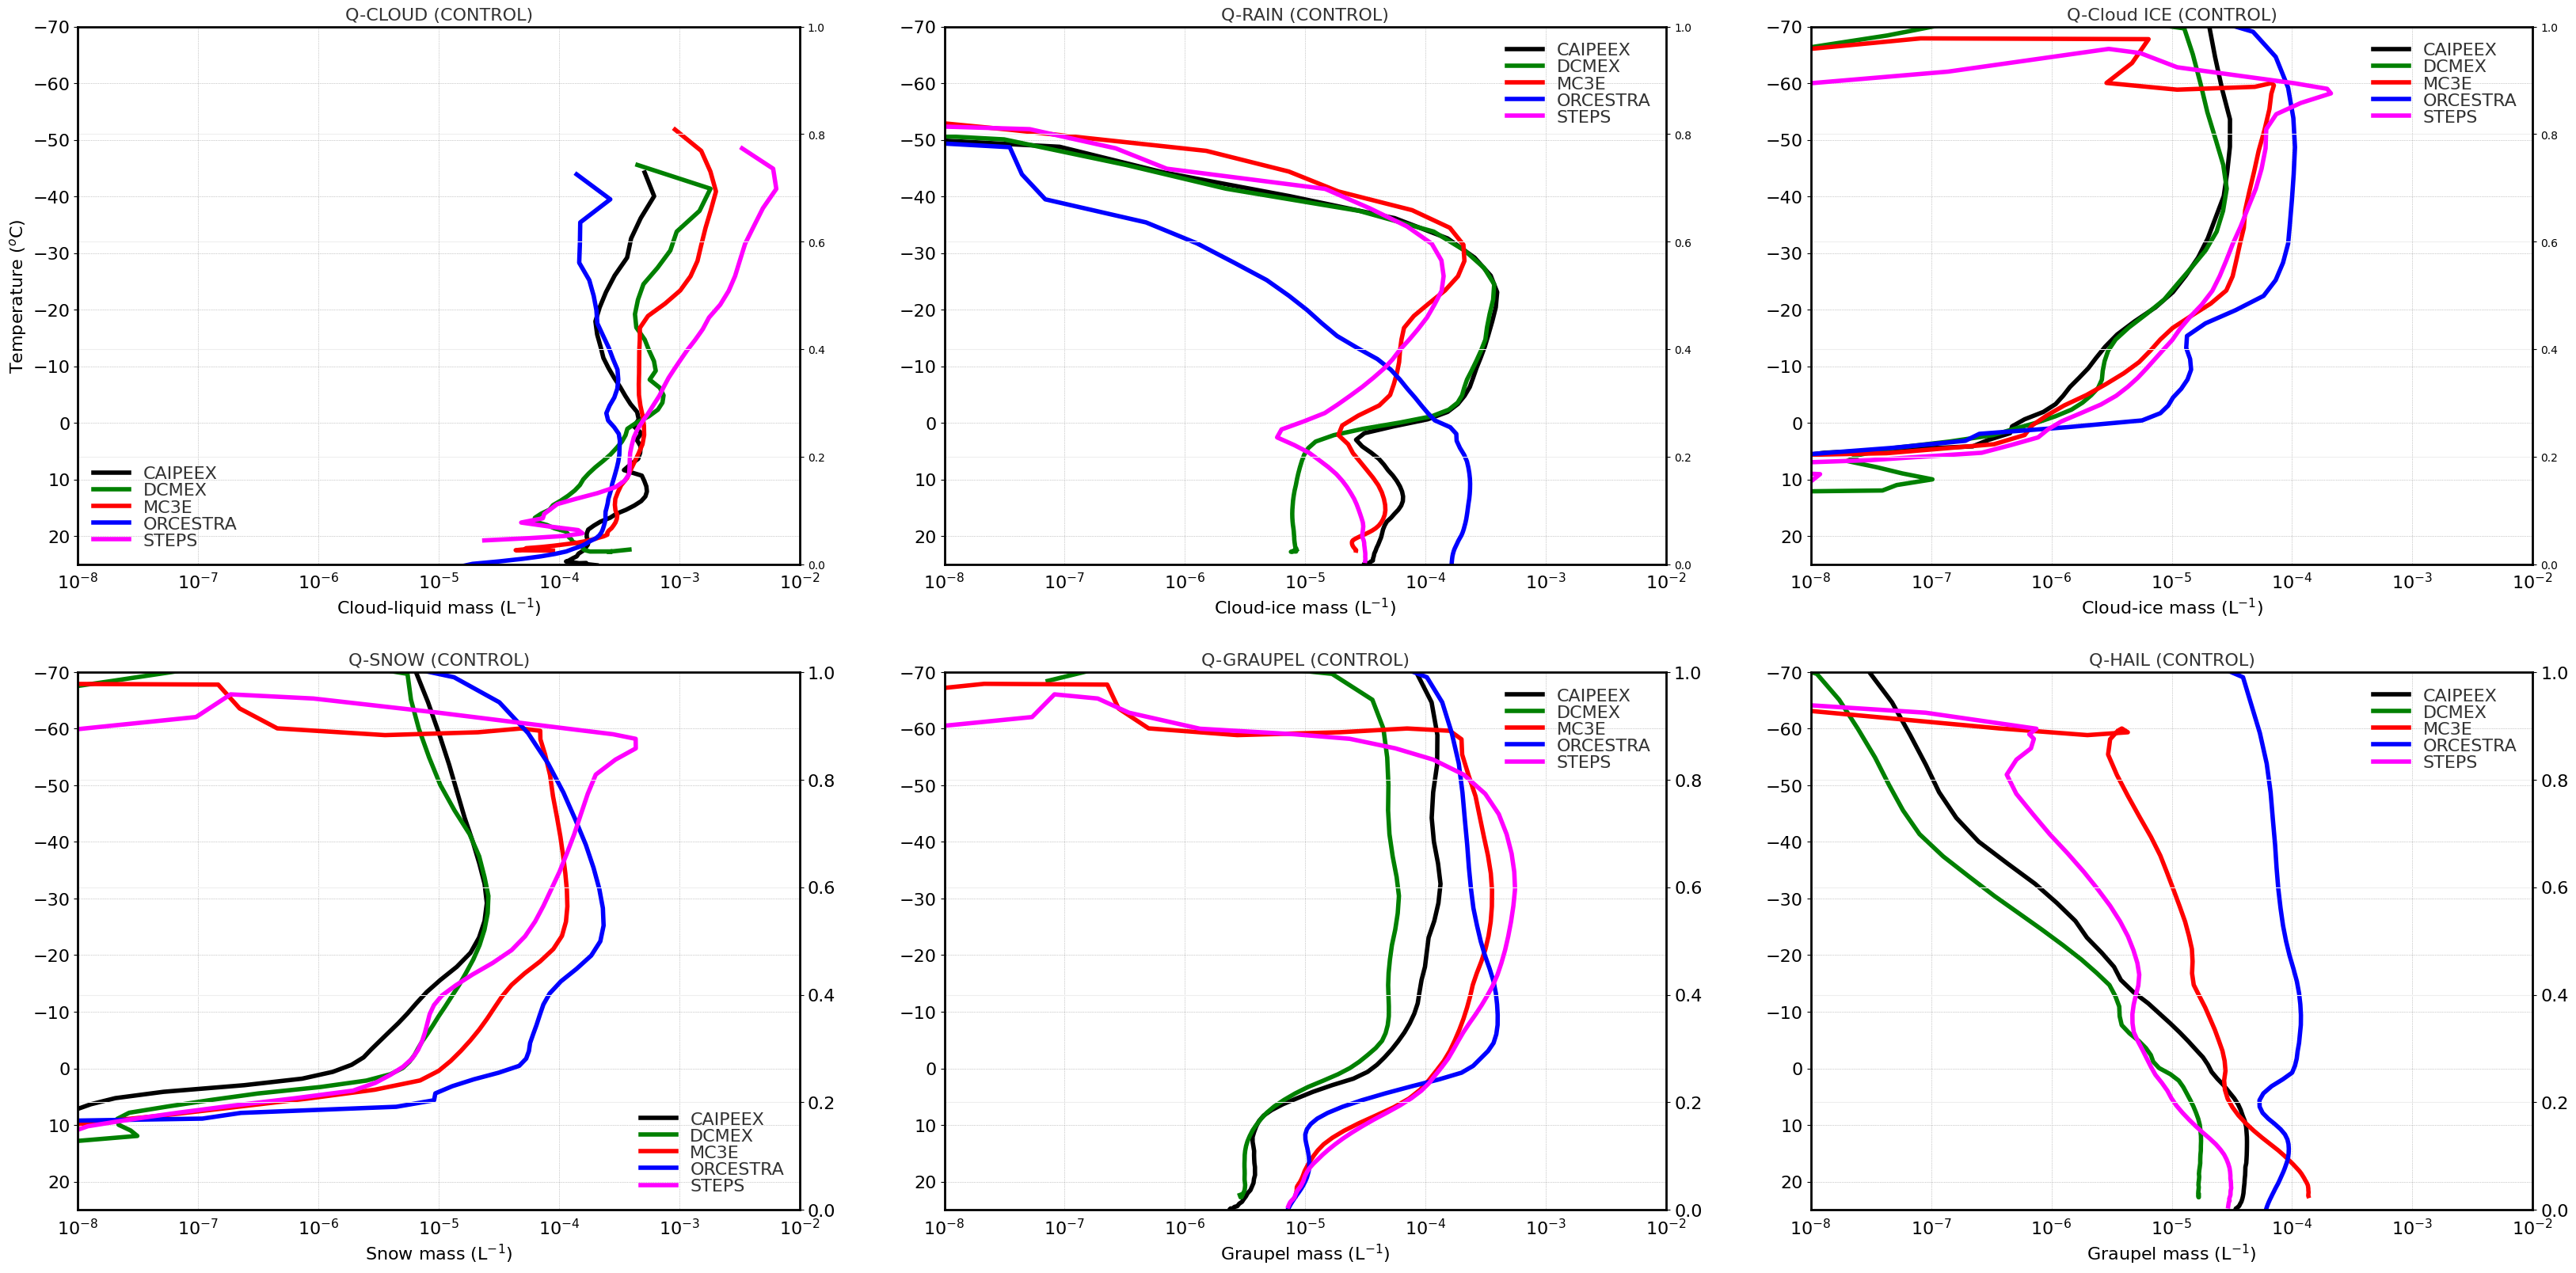

In [114]:
fontsize=16;
lnwdth=4;
alpha=0.6;

plt.figure(figsize=(40, 30))

fact = 1.

plt.subplot(3,3,1)

plt1=plt.gca()
plt2=plt1.twinx()
plt1.axvline(x=0, color='grey', linestyle='-', linewidth=2, alpha=0.6)
plt1.plot(mean_qc_4sip_caipeex*fact, mean_tempc_4sip_caipeex, '-', color='black', linewidth=lnwdth, label='CAIPEEX')
plt1.plot(mean_qc_4sip_dcmex*fact, mean_tempc_4sip_dcmex, '-', color='green', linewidth=lnwdth, label='DCMEX')
plt1.plot(mean_qc_4sip_mc3e*fact, mean_tempc_4sip_mc3e, '-', color='red', linewidth=lnwdth, label='MC3E')
plt1.plot(mean_qc_4sip_orcestra*fact, mean_tempc_4sip_orcestra, '-', color='blue', linewidth=lnwdth, label='ORCESTRA')
plt1.plot(mean_qc_4sip_steps*fact, mean_tempc_4sip_steps, '-', color='magenta', linewidth=lnwdth, label='STEPS')

#plt2.plot(mean_qc_4sip_caipeex*fact, mean_ht_4sip_caipeex, '-', color='none', linewidth=lnwdth)#, label='No SB')
#plt2.plot(mean_qc_4sip_dcmex*fact, mean_ht_4sip_dcmex, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_qc_4sip_mc3e*fact, mean_ht_4sip_mc3e, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_qc_4sip_orcestra*fact, mean_ht_4sip_orcestra, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_qc_4sip_steps*fact, mean_ht_4sip_steps, '-', color='none', linewidth=lnwdth)

plt1.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)
#plt2.grid(True, linestyle='-', linewidth=0., color='grey', alpha=0.8)

plt1.set_xscale('log')
plt1.set_xlim(1.e-8, 1.e-2)
plt1.set_ylim(25, -70)
#plt2.set_ylim(0.5, 20)

#plt1.set_xticks([1.e-4, 1.e-2, 1.e0, 1.e2, 1.e4, 1.e6])
plt1.set_yticks([20, 10, 0, -10, -20, -30, -40, -50, -60, -70])
#plt2.set_yticks([0, 4, 8, 12, 16, 20])

plt1.tick_params(axis='x', labelsize=fontsize)
plt1.tick_params(axis='y', labelsize=fontsize)
#plt2.tick_params(axis='y', labelsize=fontsize)

plt1.set_xlabel('Cloud-liquid mass (L$^{-1}$)', fontsize=fontsize)
plt1.set_ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
#plt2.set_ylabel('Altitude (km)', fontsize=fontsize)

plt1.tick_params(axis='x', labelsize=fontsize)
plt1.tick_params(axis='y', labelsize=fontsize)
#plt2.tick_params(axis='y', labelsize=fontsize)


plt1.legend()
plt1.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='best')

plt.title('Q-CLOUD (CONTROL)', fontsize=fontsize)

for spine in ['top', 'bottom', 'left', 'right']:
    plt.gca().spines[spine].set_visible(True)
    plt.gca().spines[spine].set_linewidth(2)
    plt.gca().spines[spine].set_color('black')


plt.subplot(3,3,2)

plt1=plt.gca()
plt2=plt1.twinx()
plt1.axvline(x=0, color='grey', linestyle='-', linewidth=2, alpha=0.6)
plt1.plot(mean_qr_4sip_caipeex*fact, mean_tempc_4sip_caipeex, '-', color='black', linewidth=lnwdth, label='CAIPEEX')
plt1.plot(mean_qr_4sip_dcmex*fact, mean_tempc_4sip_dcmex, '-', color='green', linewidth=lnwdth, label='DCMEX')
plt1.plot(mean_qr_4sip_mc3e*fact, mean_tempc_4sip_mc3e, '-', color='red', linewidth=lnwdth, label='MC3E')
plt1.plot(mean_qr_4sip_orcestra*fact, mean_tempc_4sip_orcestra, '-', color='blue', linewidth=lnwdth, label='ORCESTRA')
plt1.plot(mean_qr_4sip_steps*fact, mean_tempc_4sip_steps, '-', color='magenta', linewidth=lnwdth, label='STEPS')

#plt2.plot(mean_qi_4sip_caipeex*fact, mean_ht_4sip_caipeex, '-', color='none', linewidth=lnwdth)#, label='No SB')
#plt2.plot(mean_qi_4sip_dcmex*fact, mean_ht_4sip_dcmex, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_qi_4sip_mc3e*fact, mean_ht_4sip_mc3e, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_qi_4sip_orcestra*fact, mean_ht_4sip_orcestra, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_qi_4sip_steps*fact, mean_ht_4sip_steps, '-', color='none', linewidth=lnwdth)

plt1.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)
#plt2.grid(True, linestyle='-', linewidth=0., color='grey', alpha=0.8)

plt1.set_xscale('log')
plt1.set_xlim(1.e-8, 1.e-2)
plt1.set_ylim(25, -70)
#plt2.set_ylim(0.5, 20)

#plt1.set_xticks([1.e-4, 1.e-2, 1.e0, 1.e2, 1.e4, 1.e6])
plt1.set_yticks([20, 10, 0, -10, -20, -30, -40, -50, -60, -70])
#plt2.set_yticks([0, 4, 8, 12, 16, 20])

plt1.tick_params(axis='x', labelsize=fontsize)
plt1.tick_params(axis='y', labelsize=fontsize)
#plt2.tick_params(axis='y', labelsize=fontsize)

plt1.set_xlabel('Cloud-ice mass (L$^{-1}$)', fontsize=fontsize)
#plt1.set_ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
#plt2.set_ylabel('Altitude (km)', fontsize=fontsize)

plt1.tick_params(axis='x', labelsize=fontsize)
plt1.tick_params(axis='y', labelsize=fontsize)
#plt2.tick_params(axis='y', labelsize=fontsize)


plt1.legend()
plt1.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='best')

plt.title('Q-RAIN (CONTROL)', fontsize=fontsize)

for spine in ['top', 'bottom', 'left', 'right']:
    plt.gca().spines[spine].set_visible(True)
    plt.gca().spines[spine].set_linewidth(2)
    plt.gca().spines[spine].set_color('black')

plt.subplot(3,3,3)

plt1=plt.gca()
plt2=plt1.twinx()
plt1.axvline(x=0, color='grey', linestyle='-', linewidth=2, alpha=0.6)
plt1.plot(mean_qi_4sip_caipeex*fact, mean_tempc_4sip_caipeex, '-', color='black', linewidth=lnwdth, label='CAIPEEX')
plt1.plot(mean_qi_4sip_dcmex*fact, mean_tempc_4sip_dcmex, '-', color='green', linewidth=lnwdth, label='DCMEX')
plt1.plot(mean_qi_4sip_mc3e*fact, mean_tempc_4sip_mc3e, '-', color='red', linewidth=lnwdth, label='MC3E')
plt1.plot(mean_qi_4sip_orcestra*fact, mean_tempc_4sip_orcestra, '-', color='blue', linewidth=lnwdth, label='ORCESTRA')
plt1.plot(mean_qi_4sip_steps*fact, mean_tempc_4sip_steps, '-', color='magenta', linewidth=lnwdth, label='STEPS')

#plt2.plot(mean_qs_4sip_caipeex*fact, mean_ht_4sip_caipeex, '-', color='none', linewidth=lnwdth)#, label='No SB')
#plt2.plot(mean_qs_4sip_dcmex*fact, mean_ht_4sip_dcmex, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_qs_4sip_mc3e*fact, mean_ht_4sip_mc3e, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_qs_4sip_orcestra*fact, mean_ht_4sip_orcestra, '-', color='none', linewidth=lnwdth)
##plt2.plot(mean_qs_4sip_steps*fact, mean_ht_4sip_steps, '-', color='none', linewidth=lnwdth)

plt1.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)
#plt2.grid(True, linestyle='-', linewidth=0., color='grey', alpha=0.8)

plt1.set_xscale('log')
plt1.set_xlim(1.e-8, 1.e-2)
plt1.set_ylim(25, -70)
#plt2.set_ylim(0.5, 20)

#plt1.set_xticks([1.e-4, 1.e-2, 1.e0, 1.e2, 1.e4, 1.e6])
plt1.set_yticks([20, 10, 0, -10, -20, -30, -40, -50, -60, -70])
#plt2.set_yticks([0, 4, 8, 12, 16, 20])

plt1.tick_params(axis='x', labelsize=fontsize)
plt1.tick_params(axis='y', labelsize=fontsize)
#plt2.tick_params(axis='y', labelsize=fontsize)

plt1.set_xlabel('Cloud-ice mass (L$^{-1}$)', fontsize=fontsize)
#plt1.set_ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
#plt2.set_ylabel('Altitude (km)', fontsize=fontsize)

plt1.tick_params(axis='x', labelsize=fontsize)
plt1.tick_params(axis='y', labelsize=fontsize)
#plt2.tick_params(axis='y', labelsize=fontsize)


plt1.legend()
plt1.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='best')

plt.title('Q-Cloud ICE (CONTROL)', fontsize=fontsize)

for spine in ['top', 'bottom', 'left', 'right']:
    plt.gca().spines[spine].set_visible(True)
    plt.gca().spines[spine].set_linewidth(2)
    plt.gca().spines[spine].set_color('black')



plt.subplot(3,3,4)

plt1=plt.gca()
plt2=plt1.twinx()
plt1.axvline(x=0, color='grey', linestyle='-', linewidth=2, alpha=0.6)
plt1.plot(mean_qs_4sip_caipeex*fact, mean_tempc_4sip_caipeex, '-', color='black', linewidth=lnwdth, label='CAIPEEX')
plt1.plot(mean_qs_4sip_dcmex*fact, mean_tempc_4sip_dcmex, '-', color='green', linewidth=lnwdth, label='DCMEX')
plt1.plot(mean_qs_4sip_mc3e*fact, mean_tempc_4sip_mc3e, '-', color='red', linewidth=lnwdth, label='MC3E')
plt1.plot(mean_qs_4sip_orcestra*fact, mean_tempc_4sip_orcestra, '-', color='blue', linewidth=lnwdth, label='ORCESTRA')
plt1.plot(mean_qs_4sip_steps*fact, mean_tempc_4sip_steps, '-', color='magenta', linewidth=lnwdth, label='STEPS')

#plt2.plot(mean_qg_4sip_caipeex*fact, mean_ht_4sip_caipeex, '-', color='none', linewidth=lnwdth)#, label='No SB')
#plt2.plot(mean_qg_4sip_dcmex*fact, mean_ht_4sip_dcmex, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_qg_4sip_mc3e*fact, mean_ht_4sip_mc3e, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_qg_4sip_orcestra*fact, mean_ht_4sip_orcestra, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_qg_4sip_steps*fact, mean_ht_4sip_steps, '-', color='none', linewidth=lnwdth)

plt1.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)
#plt2.grid(True, linestyle='-', linewidth=0., color='grey', alpha=0.8)

plt1.set_xscale('log')
plt1.set_xlim(1.e-8, 1.e-2)
plt1.set_ylim(25, -70)
#plt2.set_ylim(0.5, 20)

#plt1.set_xticks([1.e-4, 1.e-2, 1.e0, 1.e2, 1.e4, 1.e6])
plt1.set_yticks([20, 10, 0, -10, -20, -30, -40, -50, -60, -70])
#plt2.set_yticks([0, 4, 8, 12, 16, 20])

plt1.tick_params(axis='x', labelsize=fontsize)
plt1.tick_params(axis='y', labelsize=fontsize)
plt2.tick_params(axis='y', labelsize=fontsize)

plt1.set_xlabel('Snow mass (L$^{-1}$)', fontsize=fontsize)
#plt1.set_ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
#plt2.set_ylabel('Altitude (km)', fontsize=fontsize)

plt1.tick_params(axis='x', labelsize=fontsize)
plt1.tick_params(axis='y', labelsize=fontsize)
#plt2.tick_params(axis='y', labelsize=fontsize)


plt1.legend()
plt1.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='best')

plt.title('Q-SNOW (CONTROL)', fontsize=fontsize)

for spine in ['top', 'bottom', 'left', 'right']:
    plt.gca().spines[spine].set_visible(True)
    plt.gca().spines[spine].set_linewidth(2)
    plt.gca().spines[spine].set_color('black')


plt.subplot(3,3,5)

plt1=plt.gca()
plt2=plt1.twinx()
plt1.axvline(x=0, color='grey', linestyle='-', linewidth=2, alpha=0.6)
plt1.plot(mean_qg_4sip_caipeex*fact, mean_tempc_4sip_caipeex, '-', color='black', linewidth=lnwdth, label='CAIPEEX')
plt1.plot(mean_qg_4sip_dcmex*fact, mean_tempc_4sip_dcmex, '-', color='green', linewidth=lnwdth, label='DCMEX')
plt1.plot(mean_qg_4sip_mc3e*fact, mean_tempc_4sip_mc3e, '-', color='red', linewidth=lnwdth, label='MC3E')
plt1.plot(mean_qg_4sip_orcestra*fact, mean_tempc_4sip_orcestra, '-', color='blue', linewidth=lnwdth, label='ORCESTRA')
plt1.plot(mean_qg_4sip_steps*fact, mean_tempc_4sip_steps, '-', color='magenta', linewidth=lnwdth, label='STEPS')

#plt2.plot(mean_qg_4sip_caipeex*fact, mean_ht_4sip_caipeex, '-', color='none', linewidth=lnwdth)#, label='No SB')
#plt2.plot(mean_qg_4sip_dcmex*fact, mean_ht_4sip_dcmex, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_qg_4sip_mc3e*fact, mean_ht_4sip_mc3e, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_qg_4sip_orcestra*fact, mean_ht_4sip_orcestra, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_qg_4sip_steps*fact, mean_ht_4sip_steps, '-', color='none', linewidth=lnwdth)

plt1.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)
#plt2.grid(True, linestyle='-', linewidth=0., color='grey', alpha=0.8)

plt1.set_xscale('log')
plt1.set_xlim(1.e-8, 1.e-2)
plt1.set_ylim(25, -70)
#plt2.set_ylim(0.5, 20)

#plt1.set_xticks([1.e-4, 1.e-2, 1.e0, 1.e2, 1.e4, 1.e6])
plt1.set_yticks([20, 10, 0, -10, -20, -30, -40, -50, -60, -70])
#plt2.set_yticks([0, 4, 8, 12, 16, 20])

plt1.tick_params(axis='x', labelsize=fontsize)
plt1.tick_params(axis='y', labelsize=fontsize)
plt2.tick_params(axis='y', labelsize=fontsize)

plt1.set_xlabel('Graupel mass (L$^{-1}$)', fontsize=fontsize)
#plt1.set_ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
#plt2.set_ylabel('Altitude (km)', fontsize=fontsize)

plt1.tick_params(axis='x', labelsize=fontsize)
plt1.tick_params(axis='y', labelsize=fontsize)
#plt2.tick_params(axis='y', labelsize=fontsize)


plt1.legend()
plt1.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='best')

plt.title('Q-GRAUPEL (CONTROL)', fontsize=fontsize)

for spine in ['top', 'bottom', 'left', 'right']:
    plt.gca().spines[spine].set_visible(True)
    plt.gca().spines[spine].set_linewidth(2)
    plt.gca().spines[spine].set_color('black')



plt.subplot(3,3,6)

plt1=plt.gca()
plt2=plt1.twinx()
plt1.axvline(x=0, color='grey', linestyle='-', linewidth=2, alpha=0.6)
plt1.plot(mean_qh_4sip_caipeex*fact, mean_tempc_4sip_caipeex, '-', color='black', linewidth=lnwdth, label='CAIPEEX')
plt1.plot(mean_qh_4sip_dcmex*fact, mean_tempc_4sip_dcmex, '-', color='green', linewidth=lnwdth, label='DCMEX')
plt1.plot(mean_qh_4sip_mc3e*fact, mean_tempc_4sip_mc3e, '-', color='red', linewidth=lnwdth, label='MC3E')
plt1.plot(mean_qh_4sip_orcestra*fact, mean_tempc_4sip_orcestra, '-', color='blue', linewidth=lnwdth, label='ORCESTRA')
plt1.plot(mean_qh_4sip_steps*fact, mean_tempc_4sip_steps, '-', color='magenta', linewidth=lnwdth, label='STEPS')

#plt2.plot(mean_qg_4sip_caipeex*fact, mean_ht_4sip_caipeex, '-', color='none', linewidth=lnwdth)#, label='No SB')
#plt2.plot(mean_qg_4sip_dcmex*fact, mean_ht_4sip_dcmex, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_qg_4sip_mc3e*fact, mean_ht_4sip_mc3e, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_qg_4sip_orcestra*fact, mean_ht_4sip_orcestra, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_qg_4sip_steps*fact, mean_ht_4sip_steps, '-', color='none', linewidth=lnwdth)

plt1.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)
#plt2.grid(True, linestyle='-', linewidth=0., color='grey', alpha=0.8)

plt1.set_xscale('log')
plt1.set_xlim(1.e-8, 1.e-2)
plt1.set_ylim(25, -70)
#plt2.set_ylim(0.5, 20)

#plt1.set_xticks([1.e-4, 1.e-2, 1.e0, 1.e2, 1.e4, 1.e6])
plt1.set_yticks([20, 10, 0, -10, -20, -30, -40, -50, -60, -70])
#plt2.set_yticks([0, 4, 8, 12, 16, 20])

plt1.tick_params(axis='x', labelsize=fontsize)
plt1.tick_params(axis='y', labelsize=fontsize)
plt2.tick_params(axis='y', labelsize=fontsize)

plt1.set_xlabel('Graupel mass (L$^{-1}$)', fontsize=fontsize)
#plt1.set_ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
#plt2.set_ylabel('Altitude (km)', fontsize=fontsize)

plt1.tick_params(axis='x', labelsize=fontsize)
plt1.tick_params(axis='y', labelsize=fontsize)
#plt2.tick_params(axis='y', labelsize=fontsize)


plt1.legend()
plt1.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='best')

plt.title('Q-HAIL (CONTROL)', fontsize=fontsize)

for spine in ['top', 'bottom', 'left', 'right']:
    plt.gca().spines[spine].set_visible(True)
    plt.gca().spines[spine].set_linewidth(2)
    plt.gca().spines[spine].set_color('black')
plt.show()

## Latent heating

In [11]:

w_thres = 2.
# CAIPEEX-LHR
filt_lhr = xr.where((ds_4sip_caipeex.tq > 1.e-6) & (ds_4sip_caipeex.w_vel > w_thres), ds_4sip_caipeex.d_lhr, np.nan)
lhr_kpers_4sip_caipeex = (1./1800.) * np.gradient(ds_4sip_caipeex.d_lhr, axis=0) # w.r.t. time
lhr_kperd_4sip_caipeex = lhr_kpers_4sip_caipeex * 86400.
mean_lhr_kperd_4sip_caipeex = np.mean(lhr_kperd_4sip_caipeex, axis=(0,2))

# DCMEX-LHR
filt_lhr = xr.where((ds_4sip_dcmex.tq > 1.e-6) & (ds_4sip_dcmex.w_vel > w_thres), ds_4sip_dcmex.d_lhr, np.nan)
lhr_kpers_4sip_dcmex = (1./1800.) * np.gradient(ds_4sip_dcmex.d_lhr, axis=0) # w.r.t. time
lhr_kperd_4sip_dcmex = lhr_kpers_4sip_dcmex * 86400.
mean_lhr_kperd_4sip_dcmex = np.mean(lhr_kperd_4sip_dcmex, axis=(0,2))

# MC3E-LHR
filt_lhr = xr.where((ds_4sip_mc3e.tq > 1.e-6) & (ds_4sip_mc3e.w_vel > w_thres), ds_4sip_mc3e.d_lhr, np.nan)
lhr_kpers_4sip_mc3e = (1./1800.) * np.gradient(ds_4sip_mc3e.d_lhr, axis=0) # w.r.t. time
lhr_kperd_4sip_mc3e = lhr_kpers_4sip_mc3e * 86400.
mean_lhr_kperd_4sip_mc3e = np.mean(lhr_kperd_4sip_mc3e, axis=(0,2))

# ORCESTRA-LHR
filt_lhr = xr.where((ds_4sip_orcestra.tq > 1.e-6) & (ds_4sip_orcestra.w_vel > w_thres), ds_4sip_orcestra.d_lhr, np.nan)
lhr_kpers_4sip_orcestra = (1./1800.) * np.gradient(ds_4sip_orcestra.d_lhr, axis=0) # w.r.t. time
lhr_kperd_4sip_orcestra = lhr_kpers_4sip_orcestra * 86400.
mean_lhr_kperd_4sip_orcestra = np.mean(lhr_kperd_4sip_orcestra, axis=(0,2))

# STEPS-LHR
filt_lhr = xr.where((ds_4sip_steps.tq > 1.e-6) & (ds_4sip_steps.w_vel > w_thres), ds_4sip_steps.d_lhr, np.nan)
lhr_kpers_4sip_steps = (1./1800.) * np.gradient(ds_4sip_steps.d_lhr, axis=0) # w.r.t. time
lhr_kperd_4sip_steps = lhr_kpers_4sip_steps * 86400.
mean_lhr_kperd_4sip_steps = np.mean(lhr_kperd_4sip_steps, axis=(0,2))



In [12]:

print(np.nanmax(mean_lhr_kperd_4sip_caipeex))
print(np.nanmax(mean_lhr_kperd_4sip_dcmex))
print(np.nanmax(mean_lhr_kperd_4sip_mc3e))
print(np.nanmax(mean_lhr_kperd_4sip_orcestra))
print(np.nanmax(mean_lhr_kperd_4sip_steps))


2.9598029
1.8286078
51.58949
28.498104
9.032231


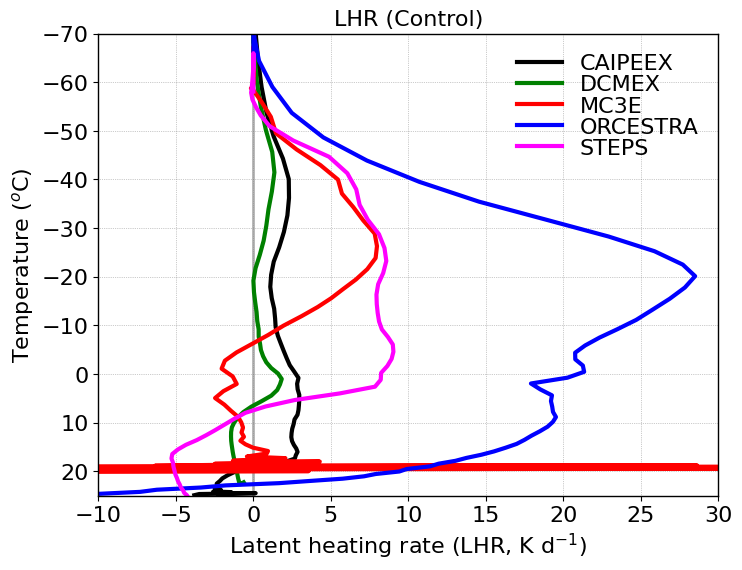

In [13]:

#mean_lhr_kperd_4sip_mc3e[mean_tempc_4sip_mc3e > 18.] = np.nan

fontsize=16;
lnwdth=3;
alpha=0.6;

plt.figure(figsize=(8, 6))
plt.style.use('default')

plt1=plt.gca()
#plt2=plt1.twinx()

fact = 1.
plt1.axvline(x=0, color='grey', linestyle='-', linewidth=2, alpha=0.6)
plt1.plot(mean_lhr_kperd_4sip_caipeex*fact, mean_tempc_4sip_caipeex, '-', color='black', linewidth=lnwdth, label='CAIPEEX')
plt1.plot(mean_lhr_kperd_4sip_dcmex*fact, mean_tempc_4sip_dcmex, '-', color='green', linewidth=lnwdth, label='DCMEX')
plt1.plot(mean_lhr_kperd_4sip_mc3e*fact, mean_tempc_4sip_mc3e, '-', color='red', linewidth=lnwdth, label='MC3E')
plt1.plot(mean_lhr_kperd_4sip_orcestra*fact, mean_tempc_4sip_orcestra, '-', color='blue', linewidth=lnwdth, label='ORCESTRA')
plt1.plot(mean_lhr_kperd_4sip_steps*fact, mean_tempc_4sip_steps, '-', color='magenta', linewidth=lnwdth, label='STEPS')

#plt2.plot(mean_tot_inc_up_caipeex*fact, mean_ht_4sip_caipeex, '-', color='none', linewidth=lnwdth)#, label='No SB')
#plt2.plot(mean_tot_inc_up_dcmex*fact, mean_ht_4sip_dcmex, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_tot_inc_up_mc3e*fact, mean_ht_4sip_mc3e, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_tot_inc_up_orcestra*fact, mean_ht_4sip_orcestra, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_tot_inc_up_steps*fact, mean_ht_4sip_steps, '-', color='none', linewidth=lnwdth)

plt1.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)
#plt2.grid(True, linestyle='-', linewidth=0., color='grey', alpha=0.8)

#plt1.set_xscale('log')
plt1.set_xlim(-10, 30)
plt1.set_ylim(25, -70)
#plt2.set_ylim(0.5, 20)

#plt1.set_xticks([1.e-4, 1.e-2, 1.e0, 1.e2, 1.e4, 1.e6])
plt1.set_yticks([20, 10, 0, -10, -20, -30, -40, -50, -60, -70])
#plt2.set_yticks([0, 4, 8, 12, 16, 20])

plt1.tick_params(axis='x', labelsize=fontsize)
plt1.tick_params(axis='y', labelsize=fontsize)
#plt2.tick_params(axis='y', labelsize=fontsize)

plt1.set_xlabel('Latent heating rate (LHR, K d$^{-1}$)', fontsize=fontsize)
plt1.set_ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
#plt2.set_ylabel('Altitude (km)', fontsize=fontsize)

plt1.tick_params(axis='x', labelsize=fontsize)
plt1.tick_params(axis='y', labelsize=fontsize)
#plt2.tick_params(axis='y', labelsize=fontsize)


plt1.legend()
plt1.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='best')

plt.title('LHR (Control)', fontsize=fontsize)

for spine in ['top', 'bottom', 'left', 'right']:
    plt.gca().spines[spine].set_visible(True)
    plt.gca().spines[spine].set_linewidth(1)
    plt.gca().spines[spine].set_color('black')

plt.show()

In [55]:

print(ds_4sip_caipeex.cape_ml.max().values)
print(ds_4sip_dcmex.cape_ml.max().values)
print(ds_4sip_mc3e.cape_ml.max().values)
print(ds_4sip_orcestra.cape_ml.max().values)
print(ds_4sip_steps.cape_ml.max().values)

3455.6458
3974.7402
3084.6772
2578.3665
3917.4358


## Process rate of riming 

In [46]:

thres_q = 1.e-8

# Riming
mean_dq_tot_rime_4sip_caipeex = xr.where(ds_4sip_caipeex.d_qx_riming > thres_q, ds_4sip_caipeex.d_qx_riming, np.nan).mean(dim=('time','ncells'))
mean_dq_tot_rime_4sip_dcmex = xr.where(ds_4sip_dcmex.d_qx_riming > thres_q, ds_4sip_dcmex.d_qx_riming, np.nan).mean(dim=('time','ncells'))
mean_dq_tot_rime_4sip_mc3e = xr.where(ds_4sip_mc3e.d_qx_riming > thres_q, ds_4sip_mc3e.d_qx_riming, np.nan).mean(dim=('time','ncells'))
mean_dq_tot_rime_4sip_orcestra = xr.where(ds_4sip_orcestra.d_qx_riming > thres_q, ds_4sip_orcestra.d_qx_riming, np.nan).mean(dim=('time','ncells'))
mean_dq_tot_rime_4sip_steps = xr.where(ds_4sip_steps.d_qx_riming > thres_q, ds_4sip_steps.d_qx_riming, np.nan).mean(dim=('time','ncells'))

# Deposition
mean_dq_tot_dep_4sip_caipeex = ds_4sip_caipeex.d_qi_dep+ds_4sip_caipeex.d_qs_dep+ds_4sip_caipeex.d_qg_dep+ds_4sip_caipeex.d_qh_dep
mean_dq_tot_dep_4sip_dcmex = ds_4sip_dcmex.d_qi_dep+ds_4sip_dcmex.d_qs_dep+ds_4sip_dcmex.d_qg_dep+ds_4sip_dcmex.d_qh_dep
mean_dq_tot_dep_4sip_mc3e = ds_4sip_mc3e.d_qi_dep+ds_4sip_mc3e.d_qs_dep+ds_4sip_mc3e.d_qg_dep+ds_4sip_mc3e.d_qh_dep
mean_dq_tot_dep_4sip_orcestra = ds_4sip_orcestra.d_qi_dep+ds_4sip_orcestra.d_qs_dep+ds_4sip_orcestra.d_qg_dep+ds_4sip_orcestra.d_qh_dep
mean_dq_tot_dep_4sip_steps = ds_4sip_steps.d_qi_dep+ds_4sip_steps.d_qs_dep+ds_4sip_steps.d_qg_dep+ds_4sip_steps.d_qh_dep

mean_dq_tot_dep_4sip_caipeex = xr.where(mean_dq_tot_dep_4sip_caipeex > thres_q, mean_dq_tot_dep_4sip_caipeex, np.nan).mean(dim=('time','ncells'))
mean_dq_tot_dep_4sip_dcmex = xr.where(mean_dq_tot_dep_4sip_dcmex > thres_q, mean_dq_tot_dep_4sip_dcmex, np.nan).mean(dim=('time','ncells'))
mean_dq_tot_dep_4sip_mc3e = xr.where(mean_dq_tot_dep_4sip_mc3e > thres_q, mean_dq_tot_dep_4sip_mc3e, np.nan).mean(dim=('time','ncells'))
mean_dq_tot_dep_4sip_orcestra = xr.where(mean_dq_tot_dep_4sip_orcestra > thres_q, mean_dq_tot_dep_4sip_orcestra, np.nan).mean(dim=('time','ncells'))
mean_dq_tot_dep_4sip_steps = xr.where(mean_dq_tot_dep_4sip_steps > thres_q, mean_dq_tot_dep_4sip_steps, np.nan).mean(dim=('time','ncells'))

# Saturation adjustment
mean_dq_satad1_4sip_caipeex = xr.where(ds_4sip_caipeex.d_satad > thres_q, ds_4sip_caipeex.d_satad, np.nan).mean(dim=('time','ncells'))
mean_dq_satad1_4sip_dcmex = xr.where(ds_4sip_dcmex.d_satad > thres_q, ds_4sip_dcmex.d_satad, np.nan).mean(dim=('time','ncells'))
mean_dq_satad1_4sip_mc3e = xr.where(ds_4sip_mc3e.d_satad > thres_q, ds_4sip_mc3e.d_satad, np.nan).mean(dim=('time','ncells'))
mean_dq_satad1_4sip_orcestra = xr.where(ds_4sip_orcestra.d_satad > thres_q, ds_4sip_orcestra.d_satad, np.nan).mean(dim=('time','ncells'))
mean_dq_satad1_4sip_steps = xr.where(ds_4sip_steps.d_satad > thres_q, ds_4sip_steps.d_satad, np.nan).mean(dim=('time','ncells'))

mean_dq_satad2_4sip_caipeex = xr.where(ds_4sip_caipeex.d_satad2 > thres_q, ds_4sip_caipeex.d_satad2, np.nan).mean(dim=('time','ncells'))
mean_dq_satad2_4sip_dcmex = xr.where(ds_4sip_dcmex.d_satad2 > thres_q, ds_4sip_dcmex.d_satad2, np.nan).mean(dim=('time','ncells'))
mean_dq_satad2_4sip_mc3e = xr.where(ds_4sip_mc3e.d_satad2 > thres_q, ds_4sip_mc3e.d_satad2, np.nan).mean(dim=('time','ncells'))
mean_dq_satad2_4sip_orcestra = xr.where(ds_4sip_orcestra.d_satad2 > thres_q, ds_4sip_orcestra.d_satad2, np.nan).mean(dim=('time','ncells'))
mean_dq_satad2_4sip_steps = xr.where(ds_4sip_steps.d_satad2 > thres_q, ds_4sip_steps.d_satad2, np.nan).mean(dim=('time','ncells'))

# Hom+het ice nucleation
mean_dq_homhet_4sip_caipeex = xr.where(ds_4sip_caipeex.d_qi_homhet > thres_q, ds_4sip_caipeex.d_qi_homhet, np.nan).mean(dim=('time','ncells'))
mean_dq_homhet_4sip_dcmex = xr.where(ds_4sip_dcmex.d_qi_homhet > thres_q, ds_4sip_dcmex.d_qi_homhet, np.nan).mean(dim=('time','ncells'))
mean_dq_homhet_4sip_mc3e = xr.where(ds_4sip_mc3e.d_qi_homhet > thres_q, ds_4sip_mc3e.d_qi_homhet, np.nan).mean(dim=('time','ncells'))
mean_dq_homhet_4sip_orcestra = xr.where(ds_4sip_orcestra.d_qi_homhet > thres_q, ds_4sip_orcestra.d_qi_homhet, np.nan).mean(dim=('time','ncells'))
mean_dq_homhet_4sip_steps = xr.where(ds_4sip_steps.d_qi_homhet > thres_q, ds_4sip_steps.d_qi_homhet, np.nan).mean(dim=('time','ncells'))

# Hom ice nucleation
mean_dq_hom_4sip_caipeex = xr.where(ds_4sip_caipeex.d_qi_hom > thres_q, ds_4sip_caipeex.d_qi_hom, np.nan).mean(dim=('time','ncells'))
mean_dq_hom_4sip_dcmex = xr.where(ds_4sip_dcmex.d_qi_hom > thres_q, ds_4sip_dcmex.d_qi_hom, np.nan).mean(dim=('time','ncells'))
mean_dq_hom_4sip_mc3e = xr.where(ds_4sip_mc3e.d_qi_hom > thres_q, ds_4sip_mc3e.d_qi_hom, np.nan).mean(dim=('time','ncells'))
mean_dq_hom_4sip_orcestra = xr.where(ds_4sip_orcestra.d_qi_hom > thres_q, ds_4sip_orcestra.d_qi_hom, np.nan).mean(dim=('time','ncells'))
mean_dq_hom_4sip_steps = xr.where(ds_4sip_steps.d_qi_hom > thres_q, ds_4sip_steps.d_qi_hom, np.nan).mean(dim=('time','ncells'))

# het ice nucleation
mean_dq_het_4sip_caipeex = xr.where(ds_4sip_caipeex.d_qi_het > thres_q, ds_4sip_caipeex.d_qi_het, np.nan).mean(dim=('time','ncells'))
mean_dq_het_4sip_dcmex = xr.where(ds_4sip_dcmex.d_qi_het > thres_q, ds_4sip_dcmex.d_qi_het, np.nan).mean(dim=('time','ncells'))
mean_dq_het_4sip_mc3e = xr.where(ds_4sip_mc3e.d_qi_het > thres_q, ds_4sip_mc3e.d_qi_het, np.nan).mean(dim=('time','ncells'))
mean_dq_het_4sip_orcestra = xr.where(ds_4sip_orcestra.d_qi_het > thres_q, ds_4sip_orcestra.d_qi_het, np.nan).mean(dim=('time','ncells'))
mean_dq_het_4sip_steps = xr.where(ds_4sip_steps.d_qi_het > thres_q, ds_4sip_steps.d_qi_het, np.nan).mean(dim=('time','ncells'))

# Rain freezing
mean_dq_rainfreez_4sip_caipeex = ds_4sip_caipeex.d_qr_rf+ds_4sip_caipeex.d_qs_rf+ds_4sip_caipeex.d_qg_rf+ds_4sip_caipeex.d_qh_rf
mean_dq_rainfreez_4sip_dcmex = ds_4sip_dcmex.d_qr_rf+ds_4sip_dcmex.d_qs_rf+ds_4sip_dcmex.d_qg_rf+ds_4sip_dcmex.d_qh_rf
mean_dq_rainfreez_4sip_mc3e = ds_4sip_mc3e.d_qr_rf+ds_4sip_mc3e.d_qs_rf+ds_4sip_mc3e.d_qg_rf+ds_4sip_mc3e.d_qh_rf
mean_dq_rainfreez_4sip_orcestra = ds_4sip_orcestra.d_qr_rf+ds_4sip_orcestra.d_qs_rf+ds_4sip_orcestra.d_qg_rf+ds_4sip_orcestra.d_qh_rf
mean_dq_rainfreez_4sip_steps = ds_4sip_steps.d_qr_rf+ds_4sip_steps.d_qs_rf+ds_4sip_steps.d_qg_rf+ds_4sip_steps.d_qh_rf

mean_dq_rainfreez_4sip_caipeex = xr.where(mean_dq_rainfreez_4sip_caipeex > thres_q, mean_dq_rainfreez_4sip_caipeex, np.nan).mean(dim=('time','ncells'))
mean_dq_rainfreez_4sip_dcmex = xr.where(mean_dq_rainfreez_4sip_dcmex > thres_q, mean_dq_rainfreez_4sip_dcmex, np.nan).mean(dim=('time','ncells'))
mean_dq_rainfreez_4sip_mc3e = xr.where(mean_dq_rainfreez_4sip_mc3e > thres_q, mean_dq_rainfreez_4sip_mc3e, np.nan).mean(dim=('time','ncells'))
mean_dq_rainfreez_4sip_orcestra = xr.where(mean_dq_rainfreez_4sip_orcestra > thres_q, mean_dq_rainfreez_4sip_orcestra, np.nan).mean(dim=('time','ncells'))
mean_dq_rainfreez_4sip_steps = xr.where(mean_dq_rainfreez_4sip_steps > thres_q, mean_dq_rainfreez_4sip_steps, np.nan).mean(dim=('time','ncells'))

# Evaporation
mean_dq_evap_4sip_caipeex = ds_4sip_caipeex.d_qr_evap+ds_4sip_caipeex.d_qsgh_evap
mean_dq_evap_4sip_dcmex = ds_4sip_dcmex.d_qr_evap+ds_4sip_dcmex.d_qsgh_evap
mean_dq_evap_4sip_mc3e = ds_4sip_mc3e.d_qr_evap+ds_4sip_mc3e.d_qsgh_evap
mean_dq_evap_4sip_orcestra = ds_4sip_orcestra.d_qr_evap+ds_4sip_orcestra.d_qsgh_evap
mean_dq_evap_4sip_steps = ds_4sip_steps.d_qr_evap+ds_4sip_steps.d_qsgh_evap

mean_dq_evap_4sip_caipeex = xr.where(mean_dq_evap_4sip_caipeex > thres_q, mean_dq_evap_4sip_caipeex, np.nan).mean(dim=('time','ncells'))
mean_dq_evap_4sip_dcmex = xr.where(mean_dq_evap_4sip_dcmex > thres_q, mean_dq_evap_4sip_dcmex, np.nan).mean(dim=('time','ncells'))
mean_dq_evap_4sip_mc3e = xr.where(mean_dq_evap_4sip_mc3e > thres_q, mean_dq_evap_4sip_mc3e, np.nan).mean(dim=('time','ncells'))
mean_dq_evap_4sip_orcestra = xr.where(mean_dq_evap_4sip_orcestra > thres_q, mean_dq_evap_4sip_orcestra, np.nan).mean(dim=('time','ncells'))
mean_dq_evap_4sip_steps = xr.where(mean_dq_evap_4sip_steps > thres_q, mean_dq_evap_4sip_steps, np.nan).mean(dim=('time','ncells'))

# Melting
mean_dq_melt_4sip_caipeex = ds_4sip_caipeex.d_qc_melt+ds_4sip_caipeex.d_qr_melt
mean_dq_melt_4sip_dcmex = ds_4sip_dcmex.d_qc_melt+ds_4sip_dcmex.d_qr_melt
mean_dq_melt_4sip_mc3e = ds_4sip_mc3e.d_qc_melt+ds_4sip_mc3e.d_qr_melt
mean_dq_melt_4sip_orcestra = ds_4sip_orcestra.d_qc_melt+ds_4sip_orcestra.d_qr_melt
mean_dq_melt_4sip_steps = ds_4sip_steps.d_qc_melt+ds_4sip_steps.d_qr_melt

mean_dq_melt_4sip_caipeex = xr.where(mean_dq_melt_4sip_caipeex > thres_q, mean_dq_melt_4sip_caipeex, np.nan).mean(dim=('time','ncells'))
mean_dq_melt_4sip_dcmex = xr.where(mean_dq_melt_4sip_dcmex > thres_q, mean_dq_melt_4sip_dcmex, np.nan).mean(dim=('time','ncells'))
mean_dq_melt_4sip_mc3e = xr.where(mean_dq_melt_4sip_mc3e > thres_q, mean_dq_melt_4sip_mc3e, np.nan).mean(dim=('time','ncells'))
mean_dq_melt_4sip_orcestra = xr.where(mean_dq_melt_4sip_orcestra > thres_q, mean_dq_melt_4sip_orcestra, np.nan).mean(dim=('time','ncells'))
mean_dq_melt_4sip_steps = xr.where(mean_dq_melt_4sip_steps > thres_q, mean_dq_melt_4sip_steps, np.nan).mean(dim=('time','ncells'))

# Nucleation

mean_dq_nuc_4sip_caipeex = xr.where(ds_4sip_caipeex.d_qc_nuc > thres_q, ds_4sip_caipeex.d_qc_nuc, np.nan).mean(dim=('time','ncells'))
mean_dq_nuc_4sip_dcmex = xr.where(ds_4sip_dcmex.d_qc_nuc > thres_q, ds_4sip_dcmex.d_qc_nuc, np.nan).mean(dim=('time','ncells'))
mean_dq_nuc_4sip_mc3e = xr.where(ds_4sip_mc3e.d_qc_nuc > thres_q, ds_4sip_mc3e.d_qc_nuc, np.nan).mean(dim=('time','ncells'))
mean_dq_nuc_4sip_orcestra = xr.where(ds_4sip_orcestra.d_qc_nuc > thres_q, ds_4sip_orcestra.d_qc_nuc, np.nan).mean(dim=('time','ncells'))
mean_dq_nuc_4sip_steps = xr.where(ds_4sip_steps.d_qc_nuc > thres_q, ds_4sip_steps.d_qc_nuc, np.nan).mean(dim=('time','ncells'))


(20.0, -70.0)

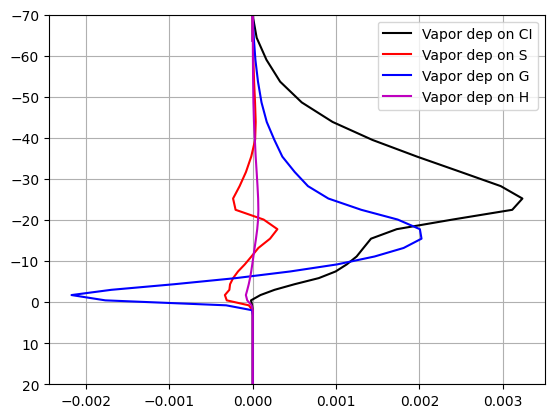

In [40]:

plt.plot(ds_4sip_orcestra.d_qi_dep.mean(dim=('time','ncells')), mean_tempc_4sip_orcestra, 'k-', label='Vapor dep on CI')
plt.plot(ds_4sip_orcestra.d_qs_dep.mean(dim=('time','ncells')), mean_tempc_4sip_orcestra, 'r-', label='Vapor dep on S')
plt.plot(ds_4sip_orcestra.d_qg_dep.mean(dim=('time','ncells')), mean_tempc_4sip_orcestra, 'b-', label='Vapor dep on G')
plt.plot(ds_4sip_orcestra.d_qh_dep.mean(dim=('time','ncells')), mean_tempc_4sip_orcestra, 'm-', label='Vapor dep on H')
plt.legend()
plt.grid()
plt.ylim(20, -70)

(20.0, -70.0)

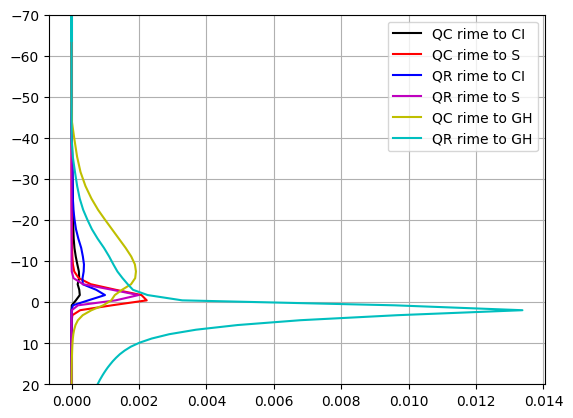

In [44]:
plt.plot(ds_4sip_orcestra.d_qc_rime_i.mean(dim=('time','ncells')), mean_tempc_4sip_orcestra, 'k-', label='QC rime to CI')
plt.plot(ds_4sip_orcestra.d_qc_rime_s.mean(dim=('time','ncells')), mean_tempc_4sip_orcestra, 'r-', label='QC rime to S')
plt.plot(ds_4sip_orcestra.d_qr_rime_i.mean(dim=('time','ncells')), mean_tempc_4sip_orcestra, 'b-', label='QR rime to CI')
plt.plot(ds_4sip_orcestra.d_qr_rime_s.mean(dim=('time','ncells')), mean_tempc_4sip_orcestra, 'm-', label='QR rime to S')
plt.plot(ds_4sip_orcestra.d_qc_rime_gh.mean(dim=('time','ncells')), mean_tempc_4sip_orcestra, 'y-', label='QC rime to GH')
plt.plot(ds_4sip_orcestra.d_qr_rime_gh.mean(dim=('time','ncells')), mean_tempc_4sip_orcestra, 'c-', label='QR rime to GH')
plt.legend()
plt.grid()
plt.ylim(20, -70)

(20.0, -70.0)

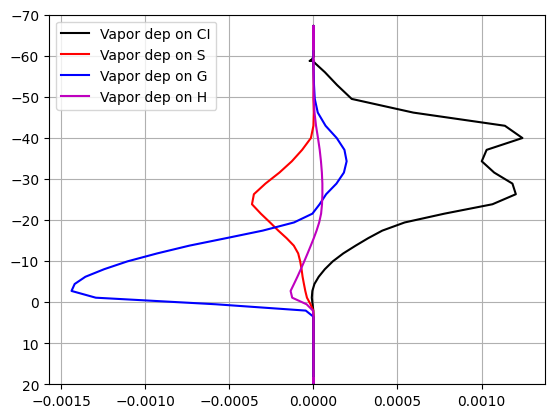

In [41]:
plt.plot(ds_4sip_mc3e.d_qi_dep.mean(dim=('time','ncells')), mean_tempc_4sip_mc3e, 'k-', label='Vapor dep on CI')
plt.plot(ds_4sip_mc3e.d_qs_dep.mean(dim=('time','ncells')), mean_tempc_4sip_mc3e, 'r-', label='Vapor dep on S')
plt.plot(ds_4sip_mc3e.d_qg_dep.mean(dim=('time','ncells')), mean_tempc_4sip_mc3e, 'b-', label='Vapor dep on G')
plt.plot(ds_4sip_mc3e.d_qh_dep.mean(dim=('time','ncells')), mean_tempc_4sip_mc3e, 'm-', label='Vapor dep on H')
plt.legend()
plt.grid()
plt.ylim(20, -70)

(20.0, -70.0)

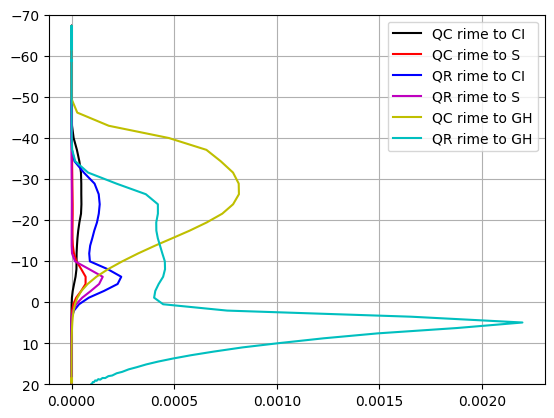

In [45]:
plt.plot(ds_4sip_mc3e.d_qc_rime_i.mean(dim=('time','ncells')), mean_tempc_4sip_mc3e, 'k-', label='QC rime to CI')
plt.plot(ds_4sip_mc3e.d_qc_rime_s.mean(dim=('time','ncells')), mean_tempc_4sip_mc3e, 'r-', label='QC rime to S')
plt.plot(ds_4sip_mc3e.d_qr_rime_i.mean(dim=('time','ncells')), mean_tempc_4sip_mc3e, 'b-', label='QR rime to CI')
plt.plot(ds_4sip_mc3e.d_qr_rime_s.mean(dim=('time','ncells')), mean_tempc_4sip_mc3e, 'm-', label='QR rime to S')
plt.plot(ds_4sip_mc3e.d_qc_rime_gh.mean(dim=('time','ncells')), mean_tempc_4sip_mc3e, 'y-', label='QC rime to GH')
plt.plot(ds_4sip_mc3e.d_qr_rime_gh.mean(dim=('time','ncells')), mean_tempc_4sip_mc3e, 'c-', label='QR rime to GH')
plt.legend()
plt.grid()
plt.ylim(20, -70)

(20.0, -70.0)

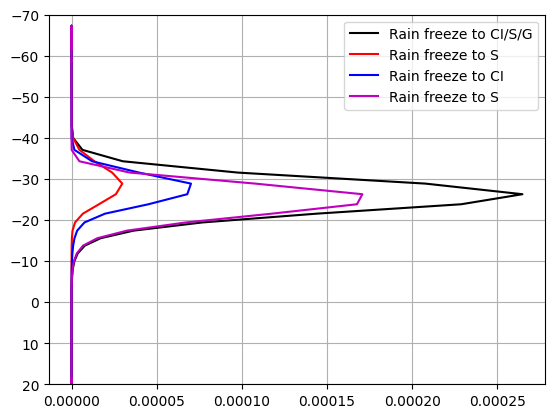

In [49]:

#ds_4sip_mc3e['d_tot_rf'] = ds_4sip_mc3e.d_qi_rf+ds_4sip_mc3e.d_qs_rf+ds_4sip_mc3e.d_qg_rf
plt.plot(ds_4sip_mc3e.d_qr_rf.mean(dim=('time','ncells')), mean_tempc_4sip_mc3e, 'k-', label='Rain freeze to CI/S/G')
plt.plot(ds_4sip_mc3e.d_qs_rf.mean(dim=('time','ncells')), mean_tempc_4sip_mc3e, 'r-', label='Rain freeze to S')
plt.plot(ds_4sip_mc3e.d_qg_rf.mean(dim=('time','ncells')), mean_tempc_4sip_mc3e, 'b-', label='Rain freeze to CI')
plt.plot(ds_4sip_mc3e.d_qh_rf.mean(dim=('time','ncells')), mean_tempc_4sip_mc3e, 'm-', label='Rain freeze to S')
plt.legend()
plt.grid()
plt.ylim(20, -70)

(20.0, -70.0)

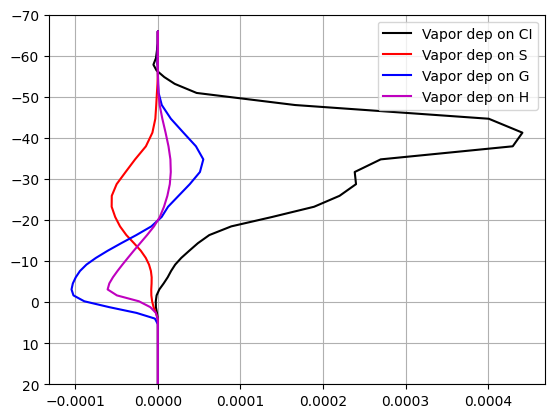

In [42]:
plt.plot(ds_4sip_steps.d_qi_dep.mean(dim=('time','ncells')), mean_tempc_4sip_steps, 'k-', label='Vapor dep on CI')
plt.plot(ds_4sip_steps.d_qs_dep.mean(dim=('time','ncells')), mean_tempc_4sip_steps, 'r-', label='Vapor dep on S')
plt.plot(ds_4sip_steps.d_qg_dep.mean(dim=('time','ncells')), mean_tempc_4sip_steps, 'b-', label='Vapor dep on G')
plt.plot(ds_4sip_steps.d_qh_dep.mean(dim=('time','ncells')), mean_tempc_4sip_steps, 'm-', label='Vapor dep on H')
plt.legend()
plt.grid()
plt.ylim(20, -70)

(20.0, -70.0)

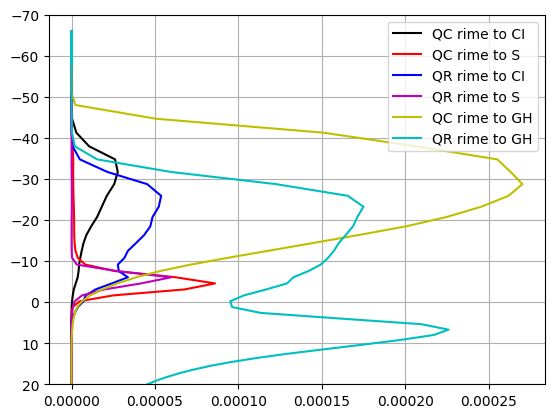

In [43]:

plt.plot(ds_4sip_steps.d_qc_rime_i.mean(dim=('time','ncells')), mean_tempc_4sip_steps, 'k-', label='QC rime to CI')
plt.plot(ds_4sip_steps.d_qc_rime_s.mean(dim=('time','ncells')), mean_tempc_4sip_steps, 'r-', label='QC rime to S')
plt.plot(ds_4sip_steps.d_qr_rime_i.mean(dim=('time','ncells')), mean_tempc_4sip_steps, 'b-', label='QR rime to CI')
plt.plot(ds_4sip_steps.d_qr_rime_s.mean(dim=('time','ncells')), mean_tempc_4sip_steps, 'm-', label='QR rime to S')
plt.plot(ds_4sip_steps.d_qc_rime_gh.mean(dim=('time','ncells')), mean_tempc_4sip_steps, 'y-', label='QC rime to GH')
plt.plot(ds_4sip_steps.d_qr_rime_gh.mean(dim=('time','ncells')), mean_tempc_4sip_steps, 'c-', label='QR rime to GH')
plt.legend()
plt.grid()
plt.ylim(20, -70)

(20.0, -70.0)

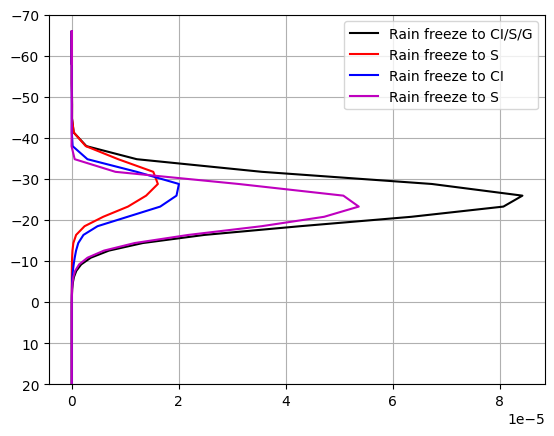

In [50]:
plt.plot(ds_4sip_steps.d_qr_rf.mean(dim=('time','ncells')), mean_tempc_4sip_steps, 'k-', label='Rain freeze to CI/S/G')
plt.plot(ds_4sip_steps.d_qs_rf.mean(dim=('time','ncells')), mean_tempc_4sip_steps, 'r-', label='Rain freeze to S')
plt.plot(ds_4sip_steps.d_qg_rf.mean(dim=('time','ncells')), mean_tempc_4sip_steps, 'b-', label='Rain freeze to CI')
plt.plot(ds_4sip_steps.d_qh_rf.mean(dim=('time','ncells')), mean_tempc_4sip_steps, 'm-', label='Rain freeze to S')
plt.legend()
plt.grid()
plt.ylim(20, -70)

In [58]:
ds_4sip_caipeex.omega

<xarray.DataArray 'omega' (time: 41, height: 65, ncells: 68960)> Size: 735MB
dask.array<concatenate, shape=(41, 65, 68960), dtype=float32, chunksize=(1, 65, 68960), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 328B 2019-09-30 ... 2019-09-30T20:00:00
    clon     (ncells) float64 552kB dask.array<chunksize=(68960,), meta=np.ndarray>
    clat     (ncells) float64 552kB dask.array<chunksize=(68960,), meta=np.ndarray>
  * height   (height) float64 520B 1.0 2.0 3.0 4.0 5.0 ... 62.0 63.0 64.0 65.0
Dimensions without coordinates: ncells
Attributes:
    standard_name:                omega
    long_name:                    vertical velocity
    units:                        Pa s-1
    param:                        8.2.0
    CDI_grid_type:                unstructured
    number_of_grid_in_reference:  1

## Mean Vertical Velocity in p-coordinate

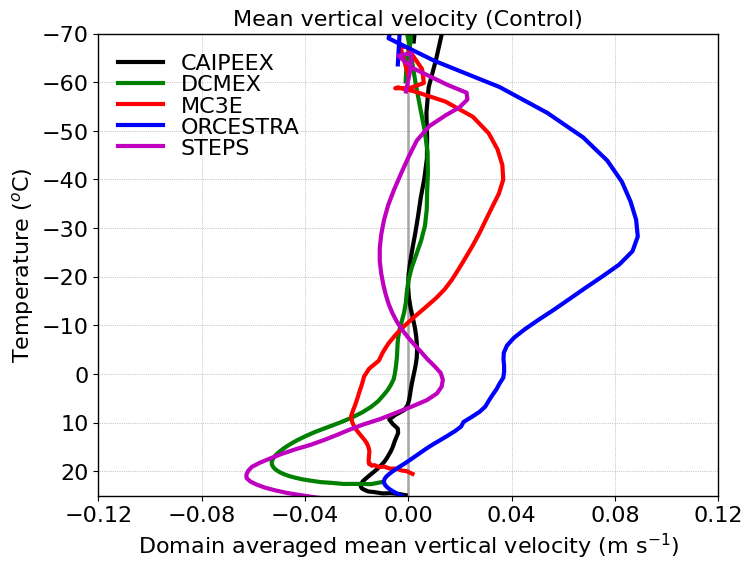

In [69]:

thres_q = 0.#1.e-6
mean_w_4sip_caipeex = xr.where(ds_4sip_caipeex.tqi > thres_q, ds_4sip_caipeex.w_vel, np.nan).mean(dim=('time','ncells'))
mean_w_4sip_dcmex = xr.where(ds_4sip_dcmex.tqi > thres_q, ds_4sip_dcmex.w_vel, np.nan).mean(dim=('time','ncells'))
mean_w_4sip_mc3e = xr.where(ds_4sip_mc3e.tqi > thres_q, ds_4sip_mc3e.w_vel, np.nan).mean(dim=('time','ncells'))
mean_w_4sip_orcestra = xr.where(ds_4sip_orcestra.tqi > thres_q, ds_4sip_orcestra.w_vel, np.nan).mean(dim=('time','ncells'))
mean_w_4sip_steps = xr.where(ds_4sip_steps.tqi > thres_q, ds_4sip_steps.w_vel, np.nan).mean(dim=('time','ncells'))

fontsize=16;
lnwdth=3;
alpha=0.6;

plt.figure(figsize=(8, 6))
plt.style.use('default')

plt1=plt.gca()
#plt2=plt1.twinx()

fact = 1.
plt1.axvline(x=0, color='grey', linestyle='-', linewidth=2, alpha=0.6)
plt.plot(mean_w_4sip_caipeex, mean_tempc_4sip_caipeex, 'k-', linewidth=lnwdth, label='CAIPEEX')
plt.plot(mean_w_4sip_dcmex, mean_tempc_4sip_dcmex, 'g-', linewidth=lnwdth, label='DCMEX')
plt.plot(mean_w_4sip_mc3e, mean_tempc_4sip_mc3e, 'r-', linewidth=lnwdth, label='MC3E')
plt.plot(mean_w_4sip_orcestra, mean_tempc_4sip_orcestra, 'b-', linewidth=lnwdth, label='ORCESTRA')
plt.plot(mean_w_4sip_steps, mean_tempc_4sip_steps, 'm-', linewidth=lnwdth, label='STEPS')
plt1.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)
#plt2.grid(True, linestyle='-', linewidth=0., color='grey', alpha=0.8)

#plt1.set_xscale('log')
plt1.set_xlim(-0.1, 0.1)
plt1.set_ylim(25, -70)
#plt2.set_ylim(0.5, 20)

plt1.set_xticks([-0.12, -0.08, -0.04, 0, 0.04, 0.08, 0.12])
plt1.set_yticks([20, 10, 0, -10, -20, -30, -40, -50, -60, -70])
#plt2.set_yticks([0, 4, 8, 12, 16, 20])

plt1.tick_params(axis='x', labelsize=fontsize)
plt1.tick_params(axis='y', labelsize=fontsize)
#plt2.tick_params(axis='y', labelsize=fontsize)

plt1.set_xlabel('Domain averaged mean vertical velocity (m s$^{-1}$)', fontsize=fontsize)
plt1.set_ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
#plt2.set_ylabel('Altitude (km)', fontsize=fontsize)

plt1.tick_params(axis='x', labelsize=fontsize)
plt1.tick_params(axis='y', labelsize=fontsize)
#plt2.tick_params(axis='y', labelsize=fontsize)


plt1.legend()
plt1.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='best')

plt.title('Mean vertical velocity (Control)', fontsize=fontsize)

for spine in ['top', 'bottom', 'left', 'right']:
    plt.gca().spines[spine].set_visible(True)
    plt.gca().spines[spine].set_linewidth(1)
    plt.gca().spines[spine].set_color('black')

plt.show()


In [71]:

w_vel = ds_4sip_caipeex.w_vel
percentile_value = 90  # change to desired percentile

# Compute along the horizontal cells dimension ('ncells' or whatever it is named)
w_vel_percentile = w_vel.reduce(np.percentile, q=percentile_value, dim='ncells')


import numpy as np

w_vel_percentile = xr.apply_ufunc(
    np.percentile,
    w_vel,
    input_core_dims=[['ncells']],
    kwargs={'q': percentile_value},
    vectorize=True
)


TypeError: percentile() got an unexpected keyword argument dict_keys(['axis'])

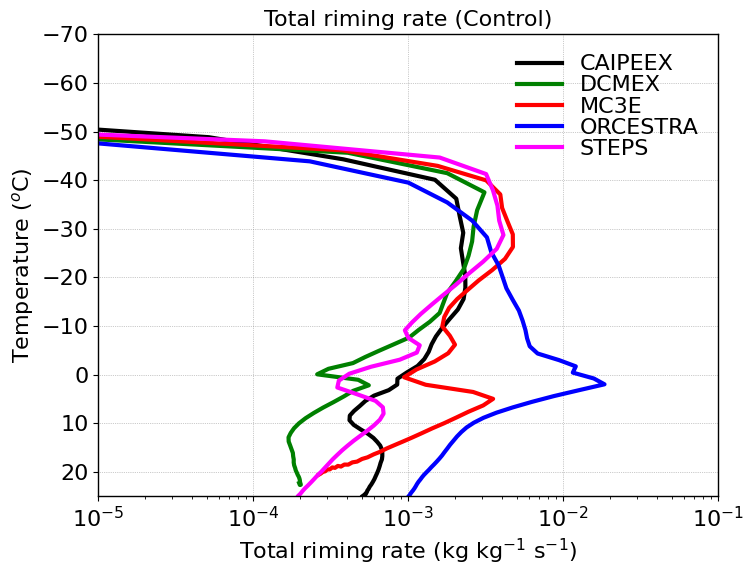

In [32]:

#mean_lhr_kperd_4sip_mc3e[mean_tempc_4sip_mc3e > 18.] = np.nan

fontsize=16;
lnwdth=3;
alpha=0.6;

plt.figure(figsize=(8, 6))
plt.style.use('default')

plt1=plt.gca()
#plt2=plt1.twinx()

fact = 1.
plt1.axvline(x=0, color='grey', linestyle='-', linewidth=2, alpha=0.6)
plt1.plot(mean_dq_tot_rime_4sip_caipeex*fact, mean_tempc_4sip_caipeex, '-', color='black', linewidth=lnwdth, label='CAIPEEX')
plt1.plot(mean_dq_tot_rime_4sip_dcmex*fact, mean_tempc_4sip_dcmex, '-', color='green', linewidth=lnwdth, label='DCMEX')
plt1.plot(mean_dq_tot_rime_4sip_mc3e*fact, mean_tempc_4sip_mc3e, '-', color='red', linewidth=lnwdth, label='MC3E')
plt1.plot(mean_dq_tot_rime_4sip_orcestra*fact, mean_tempc_4sip_orcestra, '-', color='blue', linewidth=lnwdth, label='ORCESTRA')
plt1.plot(mean_dq_tot_rime_4sip_steps*fact, mean_tempc_4sip_steps, '-', color='magenta', linewidth=lnwdth, label='STEPS')

#plt2.plot(mean_tot_inc_up_caipeex*fact, mean_ht_4sip_caipeex, '-', color='none', linewidth=lnwdth)#, label='No SB')
#plt2.plot(mean_tot_inc_up_dcmex*fact, mean_ht_4sip_dcmex, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_tot_inc_up_mc3e*fact, mean_ht_4sip_mc3e, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_tot_inc_up_orcestra*fact, mean_ht_4sip_orcestra, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_tot_inc_up_steps*fact, mean_ht_4sip_steps, '-', color='none', linewidth=lnwdth)

plt1.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)
#plt2.grid(True, linestyle='-', linewidth=0., color='grey', alpha=0.8)

plt1.set_xscale('log')
plt1.set_xlim(1.e-5, 1.e-1)
plt1.set_ylim(25, -70)
#plt2.set_ylim(0.5, 20)

#plt1.set_xticks([1.e-4, 1.e-2, 1.e0, 1.e2, 1.e4, 1.e6])
plt1.set_yticks([20, 10, 0, -10, -20, -30, -40, -50, -60, -70])
#plt2.set_yticks([0, 4, 8, 12, 16, 20])

plt1.tick_params(axis='x', labelsize=fontsize)
plt1.tick_params(axis='y', labelsize=fontsize)
#plt2.tick_params(axis='y', labelsize=fontsize)

plt1.set_xlabel('Total riming rate (kg kg$^{-1}$ s$^{-1}$)', fontsize=fontsize)
plt1.set_ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
#plt2.set_ylabel('Altitude (km)', fontsize=fontsize)

plt1.tick_params(axis='x', labelsize=fontsize)
plt1.tick_params(axis='y', labelsize=fontsize)
#plt2.tick_params(axis='y', labelsize=fontsize)


plt1.legend()
plt1.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='best')

plt.title('Total riming rate (Control)', fontsize=fontsize)

for spine in ['top', 'bottom', 'left', 'right']:
    plt.gca().spines[spine].set_visible(True)
    plt.gca().spines[spine].set_linewidth(1)
    plt.gca().spines[spine].set_color('black')

plt.show()

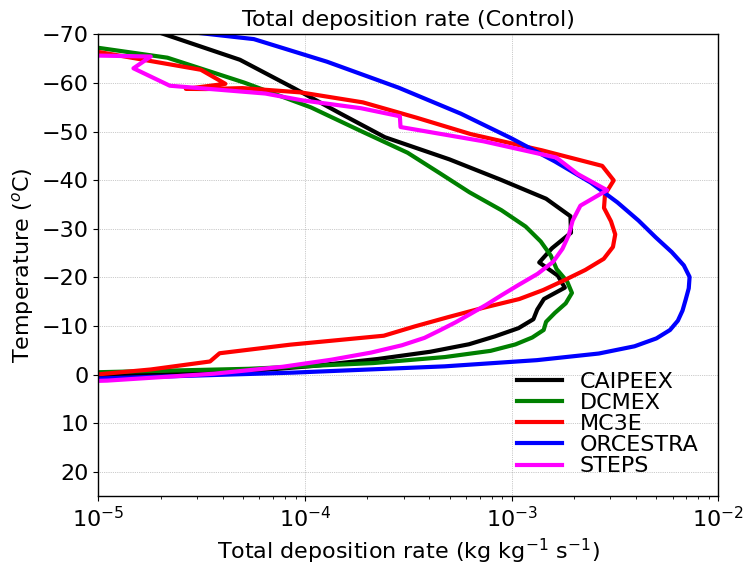

In [33]:

#mean_lhr_kperd_4sip_mc3e[mean_tempc_4sip_mc3e > 18.] = np.nan

fontsize=16;
lnwdth=3;
alpha=0.6;

plt.figure(figsize=(8, 6))
plt.style.use('default')

plt1=plt.gca()
#plt2=plt1.twinx()

fact = 1.
plt1.axvline(x=0, color='grey', linestyle='-', linewidth=2, alpha=0.6)
plt1.plot(mean_dq_tot_dep_4sip_caipeex*fact, mean_tempc_4sip_caipeex, '-', color='black', linewidth=lnwdth, label='CAIPEEX')
plt1.plot(mean_dq_tot_dep_4sip_dcmex*fact, mean_tempc_4sip_dcmex, '-', color='green', linewidth=lnwdth, label='DCMEX')
plt1.plot(mean_dq_tot_dep_4sip_mc3e*fact, mean_tempc_4sip_mc3e, '-', color='red', linewidth=lnwdth, label='MC3E')
plt1.plot(mean_dq_tot_dep_4sip_orcestra*fact, mean_tempc_4sip_orcestra, '-', color='blue', linewidth=lnwdth, label='ORCESTRA')
plt1.plot(mean_dq_tot_dep_4sip_steps*fact, mean_tempc_4sip_steps, '-', color='magenta', linewidth=lnwdth, label='STEPS')

#plt2.plot(mean_tot_inc_up_caipeex*fact, mean_ht_4sip_caipeex, '-', color='none', linewidth=lnwdth)#, label='No SB')
#plt2.plot(mean_tot_inc_up_dcmex*fact, mean_ht_4sip_dcmex, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_tot_inc_up_mc3e*fact, mean_ht_4sip_mc3e, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_tot_inc_up_orcestra*fact, mean_ht_4sip_orcestra, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_tot_inc_up_steps*fact, mean_ht_4sip_steps, '-', color='none', linewidth=lnwdth)

plt1.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)
#plt2.grid(True, linestyle='-', linewidth=0., color='grey', alpha=0.8)

plt1.set_xscale('log')
plt1.set_xlim(1.e-5, 1.e-2)
plt1.set_ylim(25, -70)
#plt2.set_ylim(0.5, 20)

#plt1.set_xticks([1.e-4, 1.e-2, 1.e0, 1.e2, 1.e4, 1.e6])
plt1.set_yticks([20, 10, 0, -10, -20, -30, -40, -50, -60, -70])
#plt2.set_yticks([0, 4, 8, 12, 16, 20])

plt1.tick_params(axis='x', labelsize=fontsize)
plt1.tick_params(axis='y', labelsize=fontsize)
#plt2.tick_params(axis='y', labelsize=fontsize)

plt1.set_xlabel('Total deposition rate (kg kg$^{-1}$ s$^{-1}$)', fontsize=fontsize)
plt1.set_ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
#plt2.set_ylabel('Altitude (km)', fontsize=fontsize)

plt1.tick_params(axis='x', labelsize=fontsize)
plt1.tick_params(axis='y', labelsize=fontsize)
#plt2.tick_params(axis='y', labelsize=fontsize)


plt1.legend()
plt1.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='best')

plt.title('Total deposition rate (Control)', fontsize=fontsize)

for spine in ['top', 'bottom', 'left', 'right']:
    plt.gca().spines[spine].set_visible(True)
    plt.gca().spines[spine].set_linewidth(1)
    plt.gca().spines[spine].set_color('black')

plt.show()

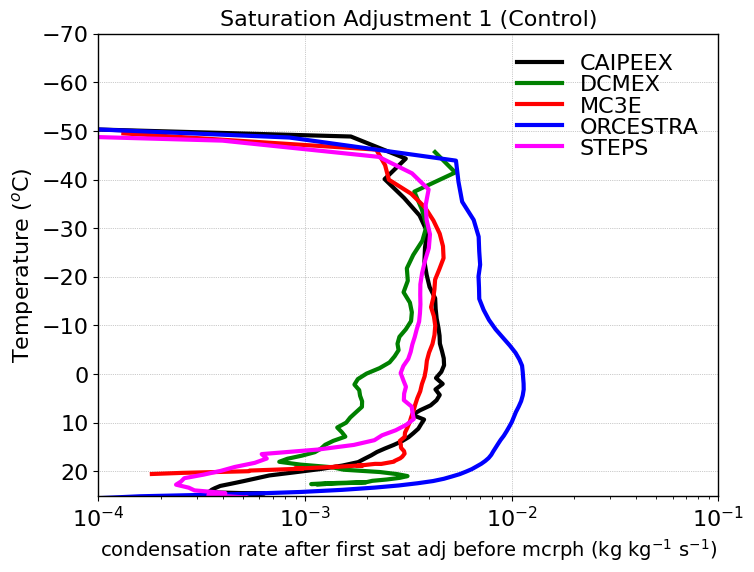

In [19]:

#mean_lhr_kperd_4sip_mc3e[mean_tempc_4sip_mc3e > 18.] = np.nan

fontsize=16;
lnwdth=3;
alpha=0.6;

plt.figure(figsize=(8, 6))
plt.style.use('default')

plt1=plt.gca()
#plt2=plt1.twinx()

fact = 1.
plt1.axvline(x=0, color='grey', linestyle='-', linewidth=2, alpha=0.6)
plt1.plot(mean_dq_satad1_4sip_caipeex*fact, mean_tempc_4sip_caipeex, '-', color='black', linewidth=lnwdth, label='CAIPEEX')
plt1.plot(mean_dq_satad1_4sip_dcmex*fact, mean_tempc_4sip_dcmex, '-', color='green', linewidth=lnwdth, label='DCMEX')
plt1.plot(mean_dq_satad1_4sip_mc3e*fact, mean_tempc_4sip_mc3e, '-', color='red', linewidth=lnwdth, label='MC3E')
plt1.plot(mean_dq_satad1_4sip_orcestra*fact, mean_tempc_4sip_orcestra, '-', color='blue', linewidth=lnwdth, label='ORCESTRA')
plt1.plot(mean_dq_satad1_4sip_steps*fact, mean_tempc_4sip_steps, '-', color='magenta', linewidth=lnwdth, label='STEPS')

#plt2.plot(mean_tot_inc_up_caipeex*fact, mean_ht_4sip_caipeex, '-', color='none', linewidth=lnwdth)#, label='No SB')
#plt2.plot(mean_tot_inc_up_dcmex*fact, mean_ht_4sip_dcmex, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_tot_inc_up_mc3e*fact, mean_ht_4sip_mc3e, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_tot_inc_up_orcestra*fact, mean_ht_4sip_orcestra, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_tot_inc_up_steps*fact, mean_ht_4sip_steps, '-', color='none', linewidth=lnwdth)

plt1.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)
#plt2.grid(True, linestyle='-', linewidth=0., color='grey', alpha=0.8)

plt1.set_xscale('log')
plt1.set_xlim(1.e-4, 1.e-1)
plt1.set_ylim(25, -70)
#plt2.set_ylim(0.5, 20)

#plt1.set_xticks([1.e-4, 1.e-2, 1.e0, 1.e2, 1.e4, 1.e6])
plt1.set_yticks([20, 10, 0, -10, -20, -30, -40, -50, -60, -70])
#plt2.set_yticks([0, 4, 8, 12, 16, 20])

plt1.tick_params(axis='x', labelsize=fontsize)
plt1.tick_params(axis='y', labelsize=fontsize)
#plt2.tick_params(axis='y', labelsize=fontsize)

plt1.set_xlabel('condensation rate after first sat adj before mcrph (kg kg$^{-1}$ s$^{-1}$)', fontsize=fontsize-2)
plt1.set_ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
#plt2.set_ylabel('Altitude (km)', fontsize=fontsize)

plt1.tick_params(axis='x', labelsize=fontsize)
plt1.tick_params(axis='y', labelsize=fontsize)
#plt2.tick_params(axis='y', labelsize=fontsize)


plt1.legend()
plt1.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='best')

plt.title('Saturation Adjustment 1 (Control)', fontsize=fontsize)

for spine in ['top', 'bottom', 'left', 'right']:
    plt.gca().spines[spine].set_visible(True)
    plt.gca().spines[spine].set_linewidth(1)
    plt.gca().spines[spine].set_color('black')

plt.show()

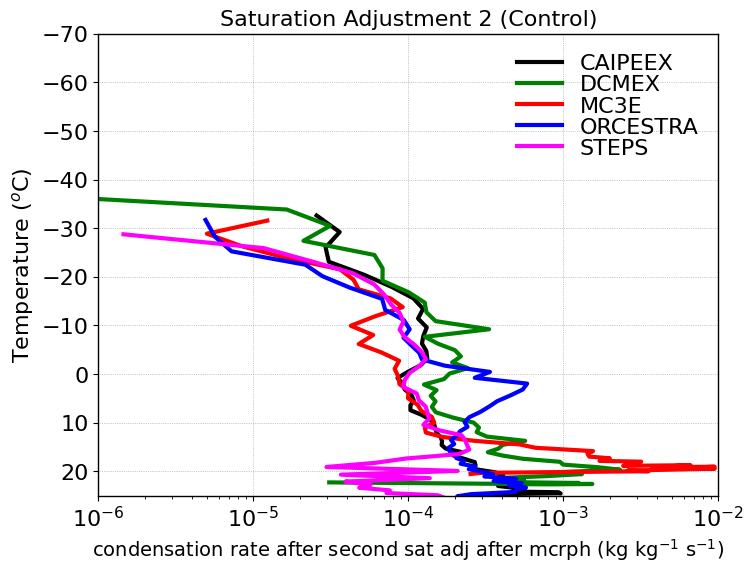

In [21]:

#mean_lhr_kperd_4sip_mc3e[mean_tempc_4sip_mc3e > 18.] = np.nan

fontsize=16;
lnwdth=3;
alpha=0.6;

plt.figure(figsize=(8, 6))
plt.style.use('default')

plt1=plt.gca()
#plt2=plt1.twinx()

fact = 1.
plt1.axvline(x=0, color='grey', linestyle='-', linewidth=2, alpha=0.6)
plt1.plot(mean_dq_satad2_4sip_caipeex*fact, mean_tempc_4sip_caipeex, '-', color='black', linewidth=lnwdth, label='CAIPEEX')
plt1.plot(mean_dq_satad2_4sip_dcmex*fact, mean_tempc_4sip_dcmex, '-', color='green', linewidth=lnwdth, label='DCMEX')
plt1.plot(mean_dq_satad2_4sip_mc3e*fact, mean_tempc_4sip_mc3e, '-', color='red', linewidth=lnwdth, label='MC3E')
plt1.plot(mean_dq_satad2_4sip_orcestra*fact, mean_tempc_4sip_orcestra, '-', color='blue', linewidth=lnwdth, label='ORCESTRA')
plt1.plot(mean_dq_satad2_4sip_steps*fact, mean_tempc_4sip_steps, '-', color='magenta', linewidth=lnwdth, label='STEPS')

#plt2.plot(mean_tot_inc_up_caipeex*fact, mean_ht_4sip_caipeex, '-', color='none', linewidth=lnwdth)#, label='No SB')
#plt2.plot(mean_tot_inc_up_dcmex*fact, mean_ht_4sip_dcmex, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_tot_inc_up_mc3e*fact, mean_ht_4sip_mc3e, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_tot_inc_up_orcestra*fact, mean_ht_4sip_orcestra, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_tot_inc_up_steps*fact, mean_ht_4sip_steps, '-', color='none', linewidth=lnwdth)

plt1.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)
#plt2.grid(True, linestyle='-', linewidth=0., color='grey', alpha=0.8)

plt1.set_xscale('log')
plt1.set_xlim(1.e-6, 1.e-2)
plt1.set_ylim(25, -70)
#plt2.set_ylim(0.5, 20)

#plt1.set_xticks([1.e-4, 1.e-2, 1.e0, 1.e2, 1.e4, 1.e6])
plt1.set_yticks([20, 10, 0, -10, -20, -30, -40, -50, -60, -70])
#plt2.set_yticks([0, 4, 8, 12, 16, 20])

plt1.tick_params(axis='x', labelsize=fontsize)
plt1.tick_params(axis='y', labelsize=fontsize)
#plt2.tick_params(axis='y', labelsize=fontsize)

plt1.set_xlabel('condensation rate after second sat adj after mcrph (kg kg$^{-1}$ s$^{-1}$)', fontsize=fontsize-2)
plt1.set_ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
#plt2.set_ylabel('Altitude (km)', fontsize=fontsize)

plt1.tick_params(axis='x', labelsize=fontsize)
plt1.tick_params(axis='y', labelsize=fontsize)
#plt2.tick_params(axis='y', labelsize=fontsize)


plt1.legend()
plt1.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='best')

plt.title('Saturation Adjustment 2 (Control)', fontsize=fontsize)

for spine in ['top', 'bottom', 'left', 'right']:
    plt.gca().spines[spine].set_visible(True)
    plt.gca().spines[spine].set_linewidth(1)
    plt.gca().spines[spine].set_color('black')

plt.show()

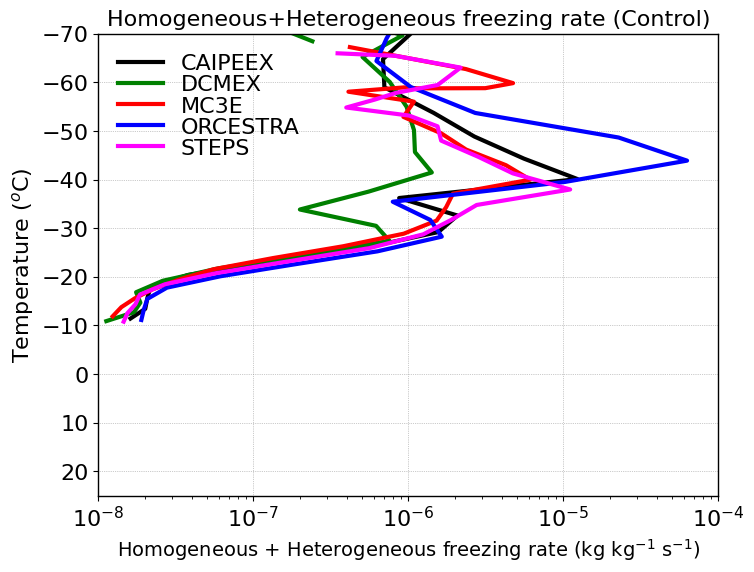

In [24]:

#mean_lhr_kperd_4sip_mc3e[mean_tempc_4sip_mc3e > 18.] = np.nan

fontsize=16;
lnwdth=3;
alpha=0.6;

plt.figure(figsize=(8, 6))
plt.style.use('default')

plt1=plt.gca()
#plt2=plt1.twinx()

fact = 1.
plt1.axvline(x=0, color='grey', linestyle='-', linewidth=2, alpha=0.6)
plt1.plot(mean_dq_homhet_4sip_caipeex*fact, mean_tempc_4sip_caipeex, '-', color='black', linewidth=lnwdth, label='CAIPEEX')
plt1.plot(mean_dq_homhet_4sip_dcmex*fact, mean_tempc_4sip_dcmex, '-', color='green', linewidth=lnwdth, label='DCMEX')
plt1.plot(mean_dq_homhet_4sip_mc3e*fact, mean_tempc_4sip_mc3e, '-', color='red', linewidth=lnwdth, label='MC3E')
plt1.plot(mean_dq_homhet_4sip_orcestra*fact, mean_tempc_4sip_orcestra, '-', color='blue', linewidth=lnwdth, label='ORCESTRA')
plt1.plot(mean_dq_homhet_4sip_steps*fact, mean_tempc_4sip_steps, '-', color='magenta', linewidth=lnwdth, label='STEPS')

#plt2.plot(mean_tot_inc_up_caipeex*fact, mean_ht_4sip_caipeex, '-', color='none', linewidth=lnwdth)#, label='No SB')
#plt2.plot(mean_tot_inc_up_dcmex*fact, mean_ht_4sip_dcmex, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_tot_inc_up_mc3e*fact, mean_ht_4sip_mc3e, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_tot_inc_up_orcestra*fact, mean_ht_4sip_orcestra, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_tot_inc_up_steps*fact, mean_ht_4sip_steps, '-', color='none', linewidth=lnwdth)

plt1.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)
#plt2.grid(True, linestyle='-', linewidth=0., color='grey', alpha=0.8)

plt1.set_xscale('log')
plt1.set_xlim(1.e-8, 1.e-4)
plt1.set_ylim(25, -70)
#plt2.set_ylim(0.5, 20)

#plt1.set_xticks([1.e-4, 1.e-2, 1.e0, 1.e2, 1.e4, 1.e6])
plt1.set_yticks([20, 10, 0, -10, -20, -30, -40, -50, -60, -70])
#plt2.set_yticks([0, 4, 8, 12, 16, 20])

plt1.tick_params(axis='x', labelsize=fontsize)
plt1.tick_params(axis='y', labelsize=fontsize)
#plt2.tick_params(axis='y', labelsize=fontsize)

plt1.set_xlabel('Homogeneous + Heterogeneous freezing rate (kg kg$^{-1}$ s$^{-1}$)', fontsize=fontsize-2)
plt1.set_ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
#plt2.set_ylabel('Altitude (km)', fontsize=fontsize)

plt1.tick_params(axis='x', labelsize=fontsize)
plt1.tick_params(axis='y', labelsize=fontsize)
#plt2.tick_params(axis='y', labelsize=fontsize)


plt1.legend()
plt1.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='best')

plt.title('Homogeneous+Heterogeneous freezing rate (Control)', fontsize=fontsize)

for spine in ['top', 'bottom', 'left', 'right']:
    plt.gca().spines[spine].set_visible(True)
    plt.gca().spines[spine].set_linewidth(1)
    plt.gca().spines[spine].set_color('black')

plt.show()

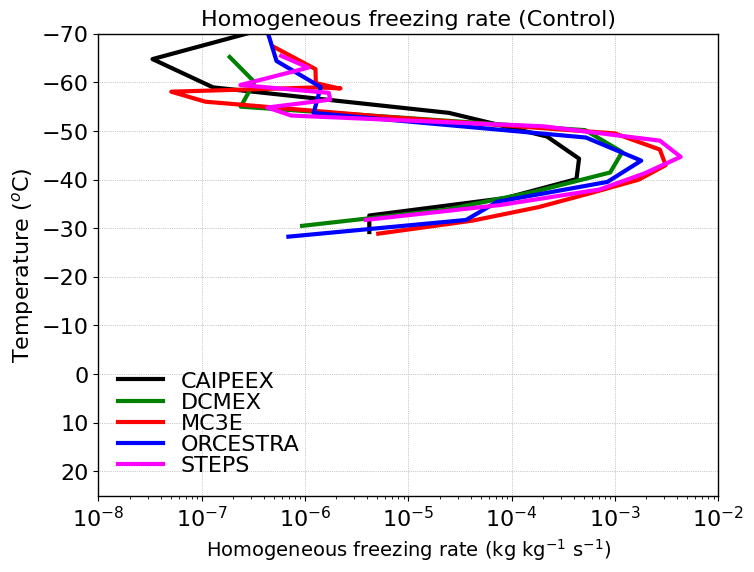

In [26]:

#mean_lhr_kperd_4sip_mc3e[mean_tempc_4sip_mc3e > 18.] = np.nan

fontsize=16;
lnwdth=3;
alpha=0.6;

plt.figure(figsize=(8, 6))
plt.style.use('default')

plt1=plt.gca()
#plt2=plt1.twinx()

fact = 1.
plt1.axvline(x=0, color='grey', linestyle='-', linewidth=2, alpha=0.6)
plt1.plot(mean_dq_hom_4sip_caipeex*fact, mean_tempc_4sip_caipeex, '-', color='black', linewidth=lnwdth, label='CAIPEEX')
plt1.plot(mean_dq_hom_4sip_dcmex*fact, mean_tempc_4sip_dcmex, '-', color='green', linewidth=lnwdth, label='DCMEX')
plt1.plot(mean_dq_hom_4sip_mc3e*fact, mean_tempc_4sip_mc3e, '-', color='red', linewidth=lnwdth, label='MC3E')
plt1.plot(mean_dq_hom_4sip_orcestra*fact, mean_tempc_4sip_orcestra, '-', color='blue', linewidth=lnwdth, label='ORCESTRA')
plt1.plot(mean_dq_hom_4sip_steps*fact, mean_tempc_4sip_steps, '-', color='magenta', linewidth=lnwdth, label='STEPS')

#plt2.plot(mean_tot_inc_up_caipeex*fact, mean_ht_4sip_caipeex, '-', color='none', linewidth=lnwdth)#, label='No SB')
#plt2.plot(mean_tot_inc_up_dcmex*fact, mean_ht_4sip_dcmex, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_tot_inc_up_mc3e*fact, mean_ht_4sip_mc3e, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_tot_inc_up_orcestra*fact, mean_ht_4sip_orcestra, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_tot_inc_up_steps*fact, mean_ht_4sip_steps, '-', color='none', linewidth=lnwdth)

plt1.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)
#plt2.grid(True, linestyle='-', linewidth=0., color='grey', alpha=0.8)

plt1.set_xscale('log')
plt1.set_xlim(1.e-8, 1.e-2)
plt1.set_ylim(25, -70)
#plt2.set_ylim(0.5, 20)

#plt1.set_xticks([1.e-4, 1.e-2, 1.e0, 1.e2, 1.e4, 1.e6])
plt1.set_yticks([20, 10, 0, -10, -20, -30, -40, -50, -60, -70])
#plt2.set_yticks([0, 4, 8, 12, 16, 20])

plt1.tick_params(axis='x', labelsize=fontsize)
plt1.tick_params(axis='y', labelsize=fontsize)
#plt2.tick_params(axis='y', labelsize=fontsize)

plt1.set_xlabel('Homogeneous freezing rate (kg kg$^{-1}$ s$^{-1}$)', fontsize=fontsize-2)
plt1.set_ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
#plt2.set_ylabel('Altitude (km)', fontsize=fontsize)

plt1.tick_params(axis='x', labelsize=fontsize)
plt1.tick_params(axis='y', labelsize=fontsize)
#plt2.tick_params(axis='y', labelsize=fontsize)


plt1.legend()
plt1.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='best')

plt.title('Homogeneous freezing rate (Control)', fontsize=fontsize)

for spine in ['top', 'bottom', 'left', 'right']:
    plt.gca().spines[spine].set_visible(True)
    plt.gca().spines[spine].set_linewidth(1)
    plt.gca().spines[spine].set_color('black')

plt.show()

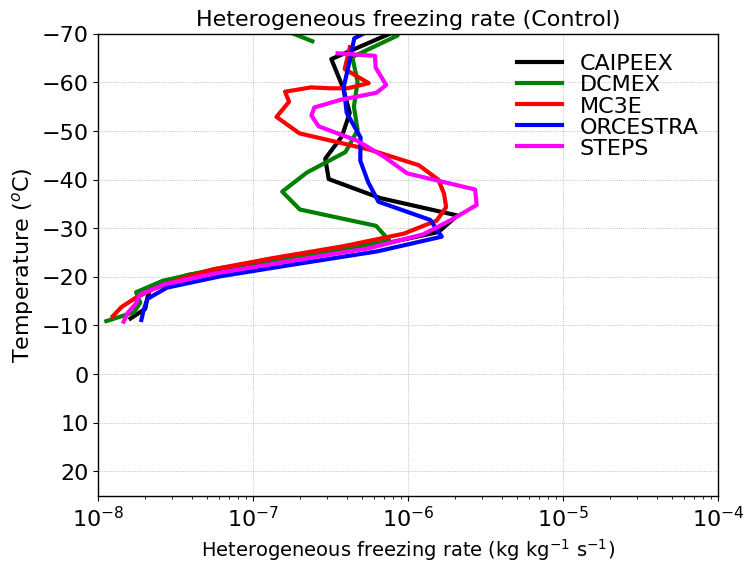

In [27]:

#mean_lhr_kperd_4sip_mc3e[mean_tempc_4sip_mc3e > 18.] = np.nan

fontsize=16;
lnwdth=3;
alpha=0.6;

plt.figure(figsize=(8, 6))
plt.style.use('default')

plt1=plt.gca()
#plt2=plt1.twinx()

fact = 1.
plt1.axvline(x=0, color='grey', linestyle='-', linewidth=2, alpha=0.6)
plt1.plot(mean_dq_het_4sip_caipeex*fact, mean_tempc_4sip_caipeex, '-', color='black', linewidth=lnwdth, label='CAIPEEX')
plt1.plot(mean_dq_het_4sip_dcmex*fact, mean_tempc_4sip_dcmex, '-', color='green', linewidth=lnwdth, label='DCMEX')
plt1.plot(mean_dq_het_4sip_mc3e*fact, mean_tempc_4sip_mc3e, '-', color='red', linewidth=lnwdth, label='MC3E')
plt1.plot(mean_dq_het_4sip_orcestra*fact, mean_tempc_4sip_orcestra, '-', color='blue', linewidth=lnwdth, label='ORCESTRA')
plt1.plot(mean_dq_het_4sip_steps*fact, mean_tempc_4sip_steps, '-', color='magenta', linewidth=lnwdth, label='STEPS')

#plt2.plot(mean_tot_inc_up_caipeex*fact, mean_ht_4sip_caipeex, '-', color='none', linewidth=lnwdth)#, label='No SB')
#plt2.plot(mean_tot_inc_up_dcmex*fact, mean_ht_4sip_dcmex, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_tot_inc_up_mc3e*fact, mean_ht_4sip_mc3e, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_tot_inc_up_orcestra*fact, mean_ht_4sip_orcestra, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_tot_inc_up_steps*fact, mean_ht_4sip_steps, '-', color='none', linewidth=lnwdth)

plt1.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)
#plt2.grid(True, linestyle='-', linewidth=0., color='grey', alpha=0.8)

plt1.set_xscale('log')
plt1.set_xlim(1.e-8, 1.e-4)
plt1.set_ylim(25, -70)
#plt2.set_ylim(0.5, 20)

#plt1.set_xticks([1.e-4, 1.e-2, 1.e0, 1.e2, 1.e4, 1.e6])
plt1.set_yticks([20, 10, 0, -10, -20, -30, -40, -50, -60, -70])
#plt2.set_yticks([0, 4, 8, 12, 16, 20])

plt1.tick_params(axis='x', labelsize=fontsize)
plt1.tick_params(axis='y', labelsize=fontsize)
#plt2.tick_params(axis='y', labelsize=fontsize)

plt1.set_xlabel('Heterogeneous freezing rate (kg kg$^{-1}$ s$^{-1}$)', fontsize=fontsize-2)
plt1.set_ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
#plt2.set_ylabel('Altitude (km)', fontsize=fontsize)

plt1.tick_params(axis='x', labelsize=fontsize)
plt1.tick_params(axis='y', labelsize=fontsize)
#plt2.tick_params(axis='y', labelsize=fontsize)


plt1.legend()
plt1.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='best')

plt.title('Heterogeneous freezing rate (Control)', fontsize=fontsize)

for spine in ['top', 'bottom', 'left', 'right']:
    plt.gca().spines[spine].set_visible(True)
    plt.gca().spines[spine].set_linewidth(1)
    plt.gca().spines[spine].set_color('black')

plt.show()

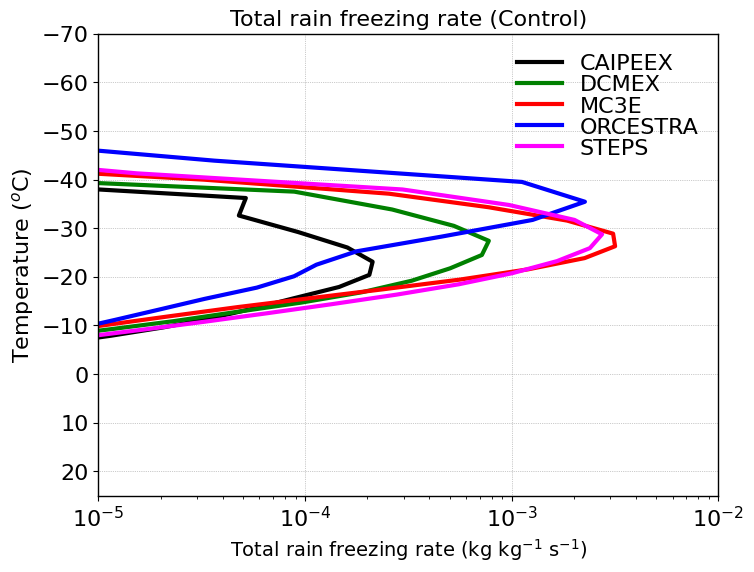

In [47]:

#mean_lhr_kperd_4sip_mc3e[mean_tempc_4sip_mc3e > 18.] = np.nan

fontsize=16;
lnwdth=3;
alpha=0.6;

plt.figure(figsize=(8, 6))
plt.style.use('default')

plt1=plt.gca()
#plt2=plt1.twinx()

fact = 1.
plt1.axvline(x=0, color='grey', linestyle='-', linewidth=2, alpha=0.6)
plt1.plot(mean_dq_rainfreez_4sip_caipeex*fact, mean_tempc_4sip_caipeex, '-', color='black', linewidth=lnwdth, label='CAIPEEX')
plt1.plot(mean_dq_rainfreez_4sip_dcmex*fact, mean_tempc_4sip_dcmex, '-', color='green', linewidth=lnwdth, label='DCMEX')
plt1.plot(mean_dq_rainfreez_4sip_mc3e*fact, mean_tempc_4sip_mc3e, '-', color='red', linewidth=lnwdth, label='MC3E')
plt1.plot(mean_dq_rainfreez_4sip_orcestra*fact, mean_tempc_4sip_orcestra, '-', color='blue', linewidth=lnwdth, label='ORCESTRA')
plt1.plot(mean_dq_rainfreez_4sip_steps*fact, mean_tempc_4sip_steps, '-', color='magenta', linewidth=lnwdth, label='STEPS')

#plt2.plot(mean_tot_inc_up_caipeex*fact, mean_ht_4sip_caipeex, '-', color='none', linewidth=lnwdth)#, label='No SB')
#plt2.plot(mean_tot_inc_up_dcmex*fact, mean_ht_4sip_dcmex, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_tot_inc_up_mc3e*fact, mean_ht_4sip_mc3e, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_tot_inc_up_orcestra*fact, mean_ht_4sip_orcestra, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_tot_inc_up_steps*fact, mean_ht_4sip_steps, '-', color='none', linewidth=lnwdth)

plt1.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)
#plt2.grid(True, linestyle='-', linewidth=0., color='grey', alpha=0.8)

plt1.set_xscale('log')
plt1.set_xlim(1.e-5, 1.e-2)
plt1.set_ylim(25, -70)
#plt2.set_ylim(0.5, 20)

#plt1.set_xticks([1.e-4, 1.e-2, 1.e0, 1.e2, 1.e4, 1.e6])
plt1.set_yticks([20, 10, 0, -10, -20, -30, -40, -50, -60, -70])
#plt2.set_yticks([0, 4, 8, 12, 16, 20])

plt1.tick_params(axis='x', labelsize=fontsize)
plt1.tick_params(axis='y', labelsize=fontsize)
#plt2.tick_params(axis='y', labelsize=fontsize)

plt1.set_xlabel('Total rain freezing rate (kg kg$^{-1}$ s$^{-1}$)', fontsize=fontsize-2)
plt1.set_ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
#plt2.set_ylabel('Altitude (km)', fontsize=fontsize)

plt1.tick_params(axis='x', labelsize=fontsize)
plt1.tick_params(axis='y', labelsize=fontsize)
#plt2.tick_params(axis='y', labelsize=fontsize)


plt1.legend()
plt1.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='best')

plt.title('Total rain freezing rate (Control)', fontsize=fontsize)

for spine in ['top', 'bottom', 'left', 'right']:
    plt.gca().spines[spine].set_visible(True)
    plt.gca().spines[spine].set_linewidth(1)
    plt.gca().spines[spine].set_color('black')

plt.show()

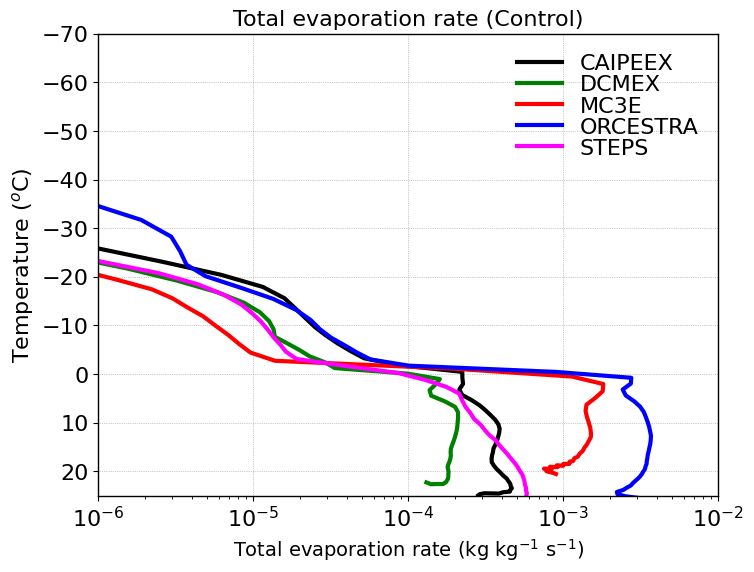

In [29]:

#mean_lhr_kperd_4sip_mc3e[mean_tempc_4sip_mc3e > 18.] = np.nan

fontsize=16;
lnwdth=3;
alpha=0.6;

plt.figure(figsize=(8, 6))
plt.style.use('default')

plt1=plt.gca()
#plt2=plt1.twinx()

fact = 1.
plt1.axvline(x=0, color='grey', linestyle='-', linewidth=2, alpha=0.6)
plt1.plot(mean_dq_evap_4sip_caipeex*fact, mean_tempc_4sip_caipeex, '-', color='black', linewidth=lnwdth, label='CAIPEEX')
plt1.plot(mean_dq_evap_4sip_dcmex*fact, mean_tempc_4sip_dcmex, '-', color='green', linewidth=lnwdth, label='DCMEX')
plt1.plot(mean_dq_evap_4sip_mc3e*fact, mean_tempc_4sip_mc3e, '-', color='red', linewidth=lnwdth, label='MC3E')
plt1.plot(mean_dq_evap_4sip_orcestra*fact, mean_tempc_4sip_orcestra, '-', color='blue', linewidth=lnwdth, label='ORCESTRA')
plt1.plot(mean_dq_evap_4sip_steps*fact, mean_tempc_4sip_steps, '-', color='magenta', linewidth=lnwdth, label='STEPS')

#plt2.plot(mean_tot_inc_up_caipeex*fact, mean_ht_4sip_caipeex, '-', color='none', linewidth=lnwdth)#, label='No SB')
#plt2.plot(mean_tot_inc_up_dcmex*fact, mean_ht_4sip_dcmex, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_tot_inc_up_mc3e*fact, mean_ht_4sip_mc3e, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_tot_inc_up_orcestra*fact, mean_ht_4sip_orcestra, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_tot_inc_up_steps*fact, mean_ht_4sip_steps, '-', color='none', linewidth=lnwdth)

plt1.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)
#plt2.grid(True, linestyle='-', linewidth=0., color='grey', alpha=0.8)

plt1.set_xscale('log')
plt1.set_xlim(1.e-6, 1.e-2)
plt1.set_ylim(25, -70)
#plt2.set_ylim(0.5, 20)

#plt1.set_xticks([1.e-4, 1.e-2, 1.e0, 1.e2, 1.e4, 1.e6])
plt1.set_yticks([20, 10, 0, -10, -20, -30, -40, -50, -60, -70])
#plt2.set_yticks([0, 4, 8, 12, 16, 20])

plt1.tick_params(axis='x', labelsize=fontsize)
plt1.tick_params(axis='y', labelsize=fontsize)
#plt2.tick_params(axis='y', labelsize=fontsize)

plt1.set_xlabel('Total evaporation rate (kg kg$^{-1}$ s$^{-1}$)', fontsize=fontsize-2)
plt1.set_ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
#plt2.set_ylabel('Altitude (km)', fontsize=fontsize)

plt1.tick_params(axis='x', labelsize=fontsize)
plt1.tick_params(axis='y', labelsize=fontsize)
#plt2.tick_params(axis='y', labelsize=fontsize)


plt1.legend()
plt1.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='best')

plt.title('Total evaporation rate (Control)', fontsize=fontsize)

for spine in ['top', 'bottom', 'left', 'right']:
    plt.gca().spines[spine].set_visible(True)
    plt.gca().spines[spine].set_linewidth(1)
    plt.gca().spines[spine].set_color('black')

plt.show()

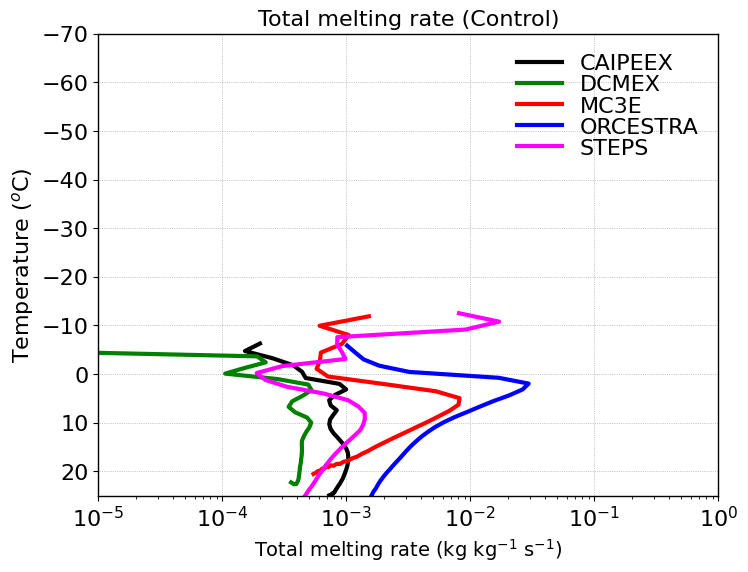

In [31]:

#mean_lhr_kperd_4sip_mc3e[mean_tempc_4sip_mc3e > 18.] = np.nan

fontsize=16;
lnwdth=3;
alpha=0.6;

plt.figure(figsize=(8, 6))
plt.style.use('default')

plt1=plt.gca()
#plt2=plt1.twinx()

fact = 1.
plt1.axvline(x=0, color='grey', linestyle='-', linewidth=2, alpha=0.6)
plt1.plot(mean_dq_melt_4sip_caipeex*fact, mean_tempc_4sip_caipeex, '-', color='black', linewidth=lnwdth, label='CAIPEEX')
plt1.plot(mean_dq_melt_4sip_dcmex*fact, mean_tempc_4sip_dcmex, '-', color='green', linewidth=lnwdth, label='DCMEX')
plt1.plot(mean_dq_melt_4sip_mc3e*fact, mean_tempc_4sip_mc3e, '-', color='red', linewidth=lnwdth, label='MC3E')
plt1.plot(mean_dq_melt_4sip_orcestra*fact, mean_tempc_4sip_orcestra, '-', color='blue', linewidth=lnwdth, label='ORCESTRA')
plt1.plot(mean_dq_melt_4sip_steps*fact, mean_tempc_4sip_steps, '-', color='magenta', linewidth=lnwdth, label='STEPS')

#plt2.plot(mean_tot_inc_up_caipeex*fact, mean_ht_4sip_caipeex, '-', color='none', linewidth=lnwdth)#, label='No SB')
#plt2.plot(mean_tot_inc_up_dcmex*fact, mean_ht_4sip_dcmex, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_tot_inc_up_mc3e*fact, mean_ht_4sip_mc3e, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_tot_inc_up_orcestra*fact, mean_ht_4sip_orcestra, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_tot_inc_up_steps*fact, mean_ht_4sip_steps, '-', color='none', linewidth=lnwdth)

plt1.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)
#plt2.grid(True, linestyle='-', linewidth=0., color='grey', alpha=0.8)

plt1.set_xscale('log')
plt1.set_xlim(1.e-5, 1.e0)
plt1.set_ylim(25, -70)
#plt2.set_ylim(0.5, 20)

#plt1.set_xticks([1.e-4, 1.e-2, 1.e0, 1.e2, 1.e4, 1.e6])
plt1.set_yticks([20, 10, 0, -10, -20, -30, -40, -50, -60, -70])
#plt2.set_yticks([0, 4, 8, 12, 16, 20])

plt1.tick_params(axis='x', labelsize=fontsize)
plt1.tick_params(axis='y', labelsize=fontsize)
#plt2.tick_params(axis='y', labelsize=fontsize)

plt1.set_xlabel('Total melting rate (kg kg$^{-1}$ s$^{-1}$)', fontsize=fontsize-2)
plt1.set_ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
#plt2.set_ylabel('Altitude (km)', fontsize=fontsize)

plt1.tick_params(axis='x', labelsize=fontsize)
plt1.tick_params(axis='y', labelsize=fontsize)
#plt2.tick_params(axis='y', labelsize=fontsize)


plt1.legend()
plt1.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='best')

plt.title('Total melting rate (Control)', fontsize=fontsize)

for spine in ['top', 'bottom', 'left', 'right']:
    plt.gca().spines[spine].set_visible(True)
    plt.gca().spines[spine].set_linewidth(1)
    plt.gca().spines[spine].set_color('black')

plt.show()

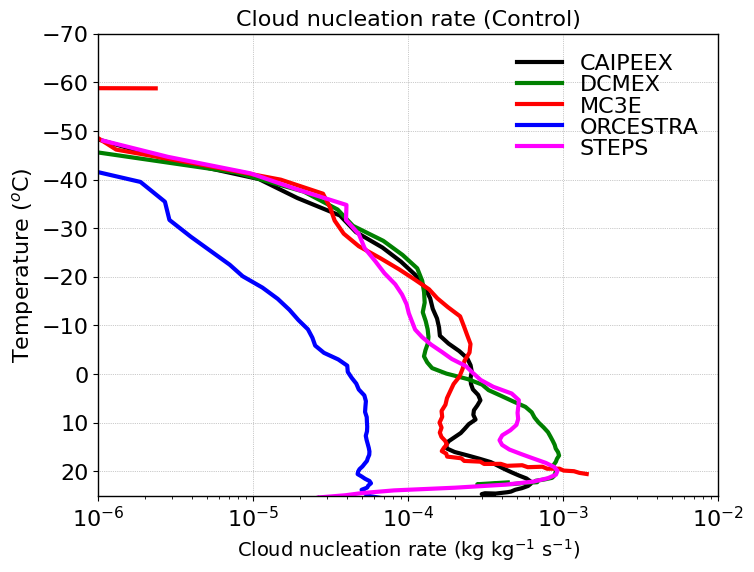

In [36]:

#mean_lhr_kperd_4sip_mc3e[mean_tempc_4sip_mc3e > 18.] = np.nan

fontsize=16;
lnwdth=3;
alpha=0.6;

plt.figure(figsize=(8, 6))
plt.style.use('default')

plt1=plt.gca()
#plt2=plt1.twinx()

fact = 1.
plt1.axvline(x=0, color='grey', linestyle='-', linewidth=2, alpha=0.6)
plt1.plot(mean_dq_nuc_4sip_caipeex*fact, mean_tempc_4sip_caipeex, '-', color='black', linewidth=lnwdth, label='CAIPEEX')
plt1.plot(mean_dq_nuc_4sip_dcmex*fact, mean_tempc_4sip_dcmex, '-', color='green', linewidth=lnwdth, label='DCMEX')
plt1.plot(mean_dq_nuc_4sip_mc3e*fact, mean_tempc_4sip_mc3e, '-', color='red', linewidth=lnwdth, label='MC3E')
plt1.plot(mean_dq_nuc_4sip_orcestra*fact, mean_tempc_4sip_orcestra, '-', color='blue', linewidth=lnwdth, label='ORCESTRA')
plt1.plot(mean_dq_nuc_4sip_steps*fact, mean_tempc_4sip_steps, '-', color='magenta', linewidth=lnwdth, label='STEPS')

#plt2.plot(mean_tot_inc_up_caipeex*fact, mean_ht_4sip_caipeex, '-', color='none', linewidth=lnwdth)#, label='No SB')
#plt2.plot(mean_tot_inc_up_dcmex*fact, mean_ht_4sip_dcmex, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_tot_inc_up_mc3e*fact, mean_ht_4sip_mc3e, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_tot_inc_up_orcestra*fact, mean_ht_4sip_orcestra, '-', color='none', linewidth=lnwdth)
#plt2.plot(mean_tot_inc_up_steps*fact, mean_ht_4sip_steps, '-', color='none', linewidth=lnwdth)

plt1.grid(True, linestyle=':', linewidth=0.5, color='grey', alpha=0.8)
#plt2.grid(True, linestyle='-', linewidth=0., color='grey', alpha=0.8)

plt1.set_xscale('log')
plt1.set_xlim(1.e-6, 1.e-2)
plt1.set_ylim(25, -70)
#plt2.set_ylim(0.5, 20)

#plt1.set_xticks([1.e-4, 1.e-2, 1.e0, 1.e2, 1.e4, 1.e6])
plt1.set_yticks([20, 10, 0, -10, -20, -30, -40, -50, -60, -70])
#plt2.set_yticks([0, 4, 8, 12, 16, 20])

plt1.tick_params(axis='x', labelsize=fontsize)
plt1.tick_params(axis='y', labelsize=fontsize)
#plt2.tick_params(axis='y', labelsize=fontsize)

plt1.set_xlabel('Cloud nucleation rate (kg kg$^{-1}$ s$^{-1}$)', fontsize=fontsize-2)
plt1.set_ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
#plt2.set_ylabel('Altitude (km)', fontsize=fontsize)

plt1.tick_params(axis='x', labelsize=fontsize)
plt1.tick_params(axis='y', labelsize=fontsize)
#plt2.tick_params(axis='y', labelsize=fontsize)


plt1.legend()
plt1.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='best')

plt.title('Cloud nucleation rate (Control)', fontsize=fontsize)

for spine in ['top', 'bottom', 'left', 'right']:
    plt.gca().spines[spine].set_visible(True)
    plt.gca().spines[spine].set_linewidth(1)
    plt.gca().spines[spine].set_color('black')

plt.show()

## Precipitation

In [38]:
del_prec_4sip_caipeex = ds_4sip_caipeex.tot_prec.diff('time')
del_prec_4sip_dcmex = ds_4sip_dcmex.tot_prec.diff('time')
del_prec_4sip_mc3e = ds_4sip_mc3e.tot_prec.diff('time')
del_prec_4sip_orcestra = ds_4sip_orcestra.tot_prec.diff('time')
del_prec_4sip_steps = ds_4sip_steps.tot_prec.diff('time')

precip_rate_4sip_caipeex = del_prec_4sip_caipeex/0.5
precip_rate_4sip_dcmex = del_prec_4sip_dcmex/0.5
precip_rate_4sip_mc3e = del_prec_4sip_mc3e/0.5            # output is over 30 min
precip_rate_4sip_orcestra = del_prec_4sip_orcestra/0.5
precip_rate_4sip_steps = del_prec_4sip_steps/0.5



In [39]:

max_acc_precip_4sip_caipeex = np.nanmax(ds_4sip_caipeex.tot_prec.mean('ncells'))
max_acc_precip_4sip_dcmex = np.nanmax(ds_4sip_dcmex.tot_prec.mean('ncells'))
max_acc_precip_4sip_mc3e = np.nanmax(ds_4sip_mc3e.tot_prec.mean('ncells'))
max_acc_precip_4sip_orcestra = np.nanmax(ds_4sip_orcestra.tot_prec.mean('ncells'))
max_acc_precip_4sip_steps = np.nanmax(ds_4sip_steps.tot_prec.mean('ncells'))


In [42]:
case_labels[0]


'CAIPEEX'

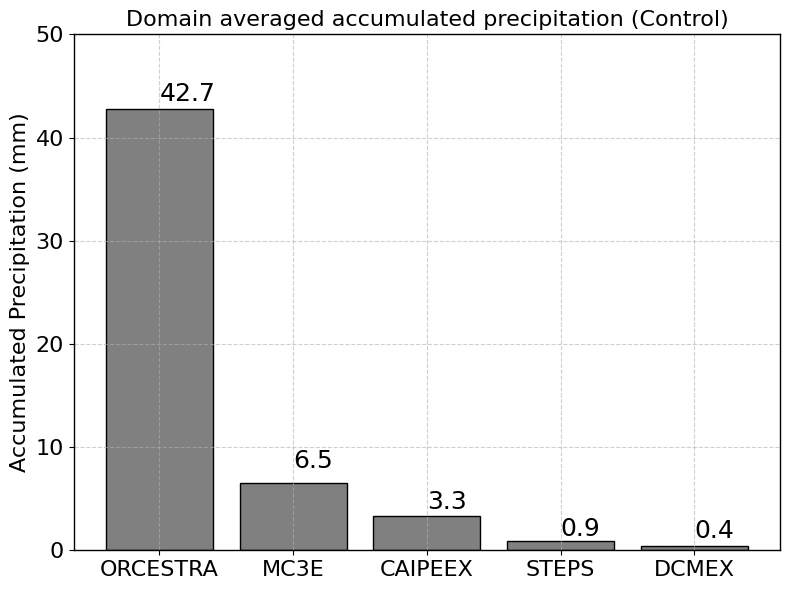

In [66]:


max_acc_precip_4sip = [max_acc_precip_4sip_caipeex, max_acc_precip_4sip_dcmex, 
                       max_acc_precip_4sip_mc3e, max_acc_precip_4sip_orcestra, max_acc_precip_4sip_steps]


case_labels = ['CAIPEEX', 'DCMEX', 'MC3E', 'ORCESTRA', 'STEPS']

fnt=16;
ln=3;
wd=1;
alp=0.8
plt.figure(figsize=(8, 6))
#plt.bar(case_labels, max_acc_precip_4sip, color='grey', edgecolor='black')

plt.bar(case_labels[3], max_acc_precip_4sip[3], color='grey', edgecolor='black')
plt.bar(case_labels[2], max_acc_precip_4sip[2], color='grey', edgecolor='black')
plt.bar(case_labels[0], max_acc_precip_4sip[0], color='grey', edgecolor='black')
plt.bar(case_labels[4], max_acc_precip_4sip[4], color='grey', edgecolor='black')
plt.bar(case_labels[1], max_acc_precip_4sip[1], color='grey', edgecolor='black')

plt.text(case_labels[0],4, f'{max_acc_precip_4sip_caipeex:.1f}', fontsize=fnt+2)
plt.text(case_labels[1],1.2, f'{max_acc_precip_4sip_dcmex:.1f}', fontsize=fnt+2)
plt.text(case_labels[2],8, f'{max_acc_precip_4sip_mc3e:.1f}', fontsize=fnt+2)
plt.text(case_labels[3],43.5, f'{max_acc_precip_4sip_orcestra:.1f}', fontsize=fnt+2)
plt.text(case_labels[4],1.4, f'{max_acc_precip_4sip_steps:.1f}', fontsize=fnt+2)

plt.xticks(fontsize=fnt)
#plt.yscale('log')
plt.ylim(0,50)
plt.yticks(fontsize=fnt) 
plt.ylabel('Accumulated Precipitation (mm)', fontsize=fnt)
plt.title('Domain averaged accumulated precipitation (Control)', fontsize=fnt)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.grid(axis='y', linestyle='--', alpha=0.6)

for spine in ['top', 'bottom', 'left', 'right']:
    plt.gca().spines[spine].set_visible(True)
    plt.gca().spines[spine].set_linewidth(1)
    plt.gca().spines[spine].set_color('black')
    
plt.tight_layout()
plt.show()

In [14]:

mean_qc_4sip_caipeex = ds_4sip_caipeex.qc.where(ds_4sip_caipeex.qc > thres_q).mean(dim=('time','ncells'))
mean_qc_4sip_dcmex = ds_4sip_dcmex.qc.where(ds_4sip_dcmex.qc > thres_q).mean(dim=('time','ncells'))
mean_qc_4sip_mc3e = ds_4sip_mc3e.qc.where(ds_4sip_mc3e.qc > thres_q).mean(dim=('time','ncells'))
mean_qc_4sip_orcestra = ds_4sip_orcestra.qc.where(ds_4sip_orcestra.qc > thres_q).mean(dim=('time','ncells'))
mean_qc_4sip_steps = ds_4sip_steps.qc.where(ds_4sip_steps.qc > thres_q).mean(dim=('time','ncells'))

mean_qr_4sip_caipeex = ds_4sip_caipeex.qr.where(ds_4sip_caipeex.qr > thres_q).mean(dim=('time','ncells'))
mean_qr_4sip_dcmex = ds_4sip_dcmex.qr.where(ds_4sip_dcmex.qr > thres_q).mean(dim=('time','ncells'))
mean_qr_4sip_mc3e = ds_4sip_mc3e.qr.where(ds_4sip_mc3e.qr > thres_q).mean(dim=('time','ncells'))
mean_qr_4sip_orcestra = ds_4sip_orcestra.qr.where(ds_4sip_orcestra.qr > thres_q).mean(dim=('time','ncells'))
mean_qr_4sip_steps = ds_4sip_steps.qr.where(ds_4sip_steps.qr > thres_q).mean(dim=('time','ncells'))

mean_qi_4sip_caipeex = ds_4sip_caipeex.qi.where(ds_4sip_caipeex.qi > thres_q).mean(dim=('time','ncells'))
mean_qi_4sip_dcmex = ds_4sip_dcmex.qi.where(ds_4sip_dcmex.qi > thres_q).mean(dim=('time','ncells'))
mean_qi_4sip_mc3e = ds_4sip_mc3e.qi.where(ds_4sip_mc3e.qi > thres_q).mean(dim=('time','ncells'))
mean_qi_4sip_orcestra = ds_4sip_orcestra.qi.where(ds_4sip_orcestra.qi > thres_q).mean(dim=('time','ncells'))
mean_qi_4sip_steps = ds_4sip_steps.qi.where(ds_4sip_steps.qi > thres_q).mean(dim=('time','ncells'))

mean_qs_4sip_caipeex = ds_4sip_caipeex.qs.where(ds_4sip_caipeex.qs > thres_q).mean(dim=('time','ncells'))
mean_qs_4sip_dcmex = ds_4sip_dcmex.qs.where(ds_4sip_dcmex.qs > thres_q).mean(dim=('time','ncells'))
mean_qs_4sip_mc3e = ds_4sip_mc3e.qs.where(ds_4sip_mc3e.qs > thres_q).mean(dim=('time','ncells'))
mean_qs_4sip_orcestra = ds_4sip_orcestra.qs.where(ds_4sip_orcestra.qs > thres_q).mean(dim=('time','ncells'))
mean_qs_4sip_steps = ds_4sip_steps.qs.where(ds_4sip_steps.qs > thres_q).mean(dim=('time','ncells'))

mean_qg_4sip_caipeex = ds_4sip_caipeex.qg.where(ds_4sip_caipeex.qg > thres_q).mean(dim=('time','ncells'))
mean_qg_4sip_dcmex = ds_4sip_dcmex.qg.where(ds_4sip_dcmex.qg > thres_q).mean(dim=('time','ncells'))
mean_qg_4sip_mc3e = ds_4sip_mc3e.qg.where(ds_4sip_mc3e.qg > thres_q).mean(dim=('time','ncells'))
mean_qg_4sip_orcestra = ds_4sip_orcestra.qg.where(ds_4sip_orcestra.qg > thres_q).mean(dim=('time','ncells'))
mean_qg_4sip_steps = ds_4sip_steps.qg.where(ds_4sip_steps.qg > thres_q).mean(dim=('time','ncells'))

mean_qh_4sip_caipeex = ds_4sip_caipeex.qh.where(ds_4sip_caipeex.qh > thres_q).mean(dim=('time','ncells'))
mean_qh_4sip_dcmex = ds_4sip_dcmex.qh.where(ds_4sip_dcmex.qh > thres_q).mean(dim=('time','ncells'))
mean_qh_4sip_mc3e = ds_4sip_mc3e.qh.where(ds_4sip_mc3e.qh > thres_q).mean(dim=('time','ncells'))
mean_qh_4sip_orcestra = ds_4sip_orcestra.qh.where(ds_4sip_orcestra.qh > thres_q).mean(dim=('time','ncells'))
mean_qh_4sip_steps = ds_4sip_steps.qh.where(ds_4sip_steps.qh > thres_q).mean(dim=('time','ncells'))


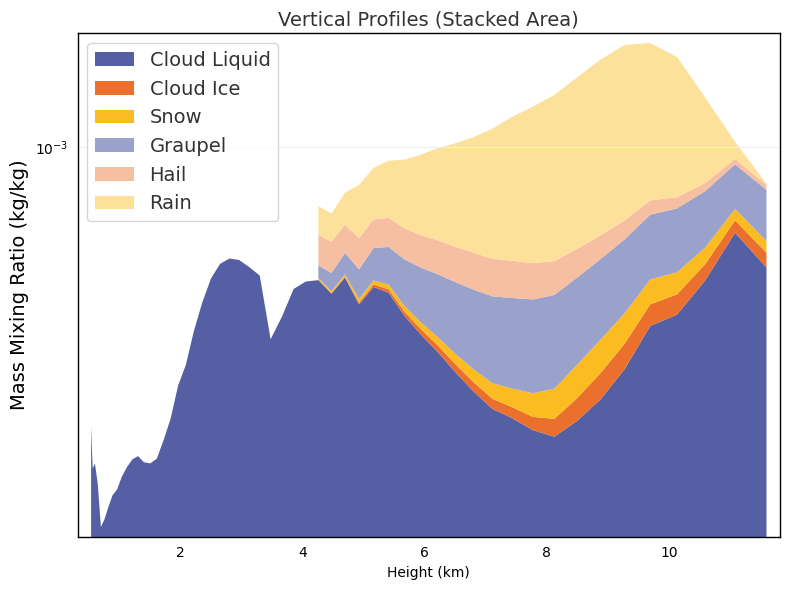

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Example: for one case
ht = mean_ht_4sip_caipeex  # height array
profiles = [
    mean_qc_4sip_caipeex,
    mean_qi_4sip_caipeex,
    mean_qs_4sip_caipeex,
    mean_qg_4sip_caipeex,
    mean_qh_4sip_caipeex,
    mean_qr_4sip_caipeex,
]
labels = ['Cloud Liquid', 'Cloud Ice', 'Snow', 'Graupel', 'Hail', 'Rain']

fnt=14;
ln=3;
alp=0.6;
plt.figure(figsize=(8,6))
plt.stackplot(ht, profiles, labels=labels)
plt.xlabel('Height (km)')
plt.yscale('log')
plt.ylabel('Mass Mixing Ratio (kg/kg)', fontsize=fnt)
plt.legend(loc='best', fontsize=fnt)
plt.title('Vertical Profiles (Stacked Area)', fontsize=fnt)

for spine in ['top', 'bottom', 'left', 'right']:
    plt.gca().spines[spine].set_visible(True)
    plt.gca().spines[spine].set_linewidth(1)
    plt.gca().spines[spine].set_color('black')
    
plt.tight_layout()
plt.show()


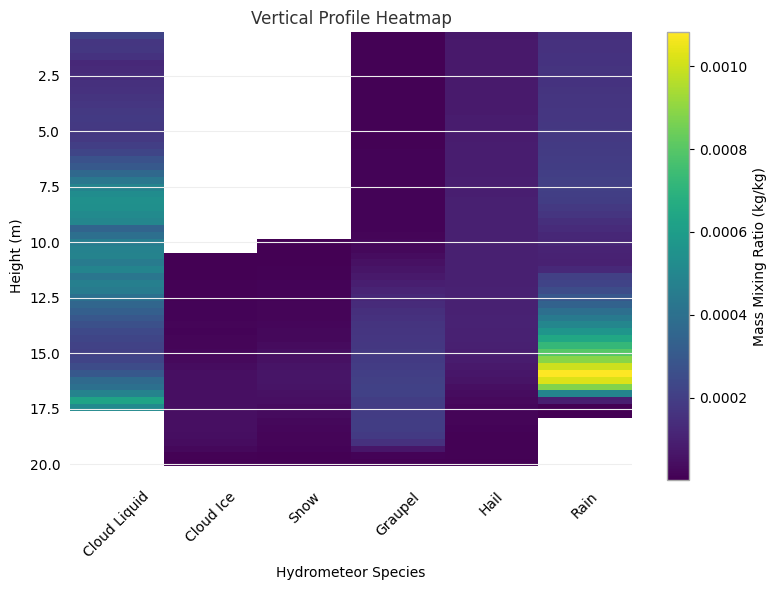

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Stack species as columns, rows are heights
data = np.vstack([
    mean_qc_4sip_caipeex,
    mean_qi_4sip_caipeex,
    mean_qs_4sip_caipeex,
    mean_qg_4sip_caipeex,
    mean_qh_4sip_caipeex,
    mean_qr_4sip_caipeex,
]).T  # shape: (height, species)

plt.figure(figsize=(8, 6))
plt.imshow(data, aspect='auto', origin='lower', 
           extent=[0, 6, ht[0], ht[-1]], cmap='viridis')
plt.colorbar(label='Mass Mixing Ratio (kg/kg)')
plt.xticks(np.arange(6) + 0.5, labels, rotation=45)
plt.xlabel('Hydrometeor Species')
plt.ylabel('Height (m)')
plt.title('Vertical Profile Heatmap')
plt.tight_layout()
plt.show()


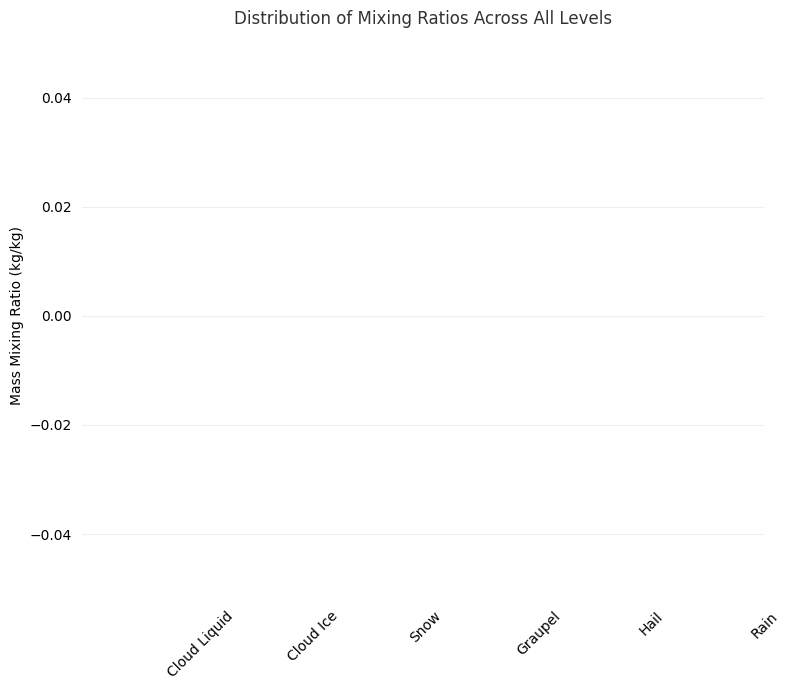

In [32]:
import matplotlib.pyplot as plt

profiles = [
    mean_qc_4sip_caipeex,
    mean_qi_4sip_caipeex,
    mean_qs_4sip_caipeex,
    mean_qg_4sip_caipeex,
    mean_qh_4sip_caipeex,
    mean_qr_4sip_caipeex,
]
labels = ['Cloud Liquid', 'Cloud Ice', 'Snow', 'Graupel', 'Hail', 'Rain']

plt.violinplot(profiles, showmeans=True)
plt.xticks(np.arange(1, 7), labels, rotation=45)
plt.ylabel('Mass Mixing Ratio (kg/kg)')
plt.title('Distribution of Mixing Ratios Across All Levels')
plt.tight_layout()
plt.show()
